# Complete re-run 06/20/2024, 30% CV luminex, 50% CV functionals (rpm4, w Xin updates); QC index error corrected

# Get decay parameters

In [1]:
library(nlme)
library(performance)
library(dplyr)
library(ggplot2)
# library(plyr)
source('decay.functions.r')
# set colors 
col = c('Pfizer'='#2933A3','CoronaVac'='#9DA3E7',
        'Hosp'='#8B182A','Out'='#E791BD')


Attaching package: 'dplyr'


The following object is masked from 'package:nlme':

    collapse


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
data_m = read.csv('../data-final/DS2-annotated_luminex.lum_func.melted.csv',stringsAsFactors = F)
data_r = read.csv('../data-final/DS2-annotated_luminex.lum_func.melted.raw.csv',stringsAsFactors = F)
# data_m = read.csv('../data-final/DS2-annotated_luminex.no_norm.melted.csv',stringsAsFactors = F)

In [3]:
with(data_m, table( virus , antigen))
with(data_m, length(unique(Lab.ID)))

with(data_m, quantile(DPFD,na.rm=T))
# plot(with(data_m, hist(DPFD,na.rm=T)))



           antigen
virus       Antigen   HA    N  NTD  RBD   S1   S2 Spike
  Alpha           0    0    0    0 5742    0    0  5742
  Beta            0    0    0    0 5742    0    0  5742
  Delta           0    0    0    0 5742    0    0  5742
  EBOV         5742    0    0    0    0    0    0     0
  Gamma           0    0    0    0 5742    0    0  5742
  HCMVgB       5742    0    0    0    0    0    0     0
  HKU1            0    0    0    0    0    0    0  5742
  Influenza       0 5742    0    0    0    0    0     0
  OC43            0    0    0    0    0    0    0  5742
  Omicron         0    0    0    0 5742    0    0  6786
  WT              0    0 5742 5742 5742 5742 5742  7308

[1] 126

0%  25%  50%  75% 100% 
   1   28  104  231  525

In [4]:

# data_m$group = factor(as.character(data_m$group),levels = c('o','p','C'))
data_m$virus = factor(as.character(data_m$virus) , levels=c('WT' ,'Alpha','Beta','Delta','Gamma','Omicron','HKU1','OC43'))
data_r$virus = factor(as.character(data_r$virus) , levels=c('WT' ,'Alpha','Beta','Delta','Gamma','Omicron','HKU1','OC43'))
#data_m$virus = relevel( factor(as.character(data_m$virus)) , ref = 'WT' )

data_m = merge(data_m,data_r,suffixes = c('','_raw'),by=colnames(data_m)[colnames(data_m)!='value'])
head(data_m)
# head(data_r)
str(data_m)

PlateNum SampleNum PlateID PlateCoord ID    vaccine group BOX Lab.ID     
1 1        1         1       A1         Naive Naive   C     1   C64 2020 G4
2 1        1         1       A1         Naive Naive   C     1   C64 2020 G4
3 1        1         1       A1         Naive Naive   C     1   C64 2020 G4
4 1        1         1       A1         Naive Naive   C     1   C64 2020 G4
5 1        1         1       A1         Naive Naive   C     1   C64 2020 G4
6 1        1         1       A1         Naive Naive   C     1   C64 2020 G4
  Vaccine ... DPFD DPSD DPTD order variable       antigen virus affinity
1 Naive   ... NA   NA   NA   1.5   Alpha.RBD.C1q  RBD     Alpha C1q     
2 Naive   ... NA   NA   NA   1.5   Alpha.RBD.IgA1 RBD     Alpha IgA1    
3 Naive   ... NA   NA   NA   1.5   Alpha.RBD.IgG1 RBD     Alpha IgG1    
4 Naive   ... NA   NA   NA   1.5   Alpha.RBD.IgG2 RBD     Alpha IgG2    
5 Naive   ... NA   NA   NA   1.5   Alpha.RBD.IgG3 RBD     Alpha IgG3    
6 Naive   ... NA   NA   NA   1.5   Alpha.RBD.IgG4 RBD     Alpha IgG4    
  value     value_raw
1 1.2205047  2497.00 
2 0.6345194  4574.25 
3 0.6033457 10216.00 
4 0.2067241  3182.00 
5 0.6672060  2886.50 
6 0.9876875  2667.25

'data.frame':	123192 obs. of  22 variables:
 $ PlateNum   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ SampleNum  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ PlateID    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ PlateCoord : chr  "A1" "A1" "A1" "A1" ...
 $ ID         : chr  "Naive" "Naive" "Naive" "Naive" ...
 $ vaccine    : chr  "Naive" "Naive" "Naive" "Naive" ...
 $ group      : chr  "C" "C" "C" "C" ...
 $ BOX        : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Lab.ID     : chr  "C64 2020 G4" "C64 2020 G4" "C64 2020 G4" "C64 2020 G4" ...
 $ Vaccine    : chr  "Naive" "Naive" "Naive" "Naive" ...
 $ Tube.Label : chr  "S_PUC_C_064_(1)_G4" "S_PUC_C_064_(1)_G4" "S_PUC_C_064_(1)_G4" "S_PUC_C_064_(1)_G4" ...
 $ Time.sample: chr  "PRE" "PRE" "PRE" "PRE" ...
 $ DPFD       : int  NA NA NA NA NA NA NA NA NA NA ...
 $ DPSD       : int  NA NA NA NA NA NA NA NA NA NA ...
 $ DPTD       : int  NA NA NA NA NA NA NA NA NA NA ...
 $ order      : num  1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 ...
 $ variable   : chr  "Alpha.RBD.C1q" "Alpha.RBD.Ig

In [5]:
unique(gsub('\\..*','',data_m$variable))
unique(data_m$antigen)

[1] "Alpha"     "Beta"      "Delta"     "EBOV"      "Gamma"     "HCMVgB"   
 [7] "HKU1"      "Influenza" "OC43"      "Omicron"   "WT"

[1] "RBD"     "Spike"   "Antigen" "HA"      "N"       "NTD"     "S1"     
[8] "S2"

# Get decay parameters

# Filter 2: broad

In [6]:
 # data prep

data_i = data_m
data_i$DPFI = with(data_i,
                   ifelse(group%in%c('o','p'),DPFD,DPSD))

data_decay = data_i %>%
    # filter( #vaccine %in% c('CoronaVac','Pfizer','Out','Hosp','Naive')) %>%
    filter( (vaccine%in%c('CoronaVac','Pfizer') & DPSD>15 & DPSD<350 & is.na(DPTD)) | #  
               (vaccine=='Naive') |
             (vaccine%in%c('Out','Hosp') & DPFD>25 & DPFD<350 & is.na(DPSD) )) %>% # DPFD>25 & DPFD<350
    # filter( antigen==antigen_i ) %>%
    filter( virus %in% c('Alpha','Beta','Delta','WT','Omicron','Gamma','HKU1','OC43') ) %>%
    mutate(
        strat = paste(vaccine,Lab.ID)
    )

In [7]:
with( data_decay %>% select(Lab.ID,vaccine) %>% unique(),
     table(vaccine))

vaccine
CoronaVac      Hosp     Naive       Out    Pfizer 
       33        31        33        40        15 

In [8]:
tmp=data_decay %>%
     reshape2::dcast( as.formula(paste(paste(colnames(data_decay)[c(1:16,23:24)],collapse='+'), '~ variable')),value.var='value')
write.csv(tmp,'../data-final/DS2-USED-annotated_luminex.lum_func.normalized_filtered.no_boost.csv')

tmp=data_decay %>%
     reshape2::dcast( as.formula(paste(paste(colnames(data_decay)[c(1:16,23:24)],collapse='+'), '~ variable')),value.var='value_raw')
write.csv(tmp,'../data-final/DS2-USED-annotated_luminex.lum_func.raw_filtered.no_boost.csv')

In [9]:
data_decay %>% select(Lab.ID , vaccine) %>% unique() %>% group_by(vaccine) %>% summarize(Subj=length(Lab.ID))
data_decay %>% select(Tube.Label , vaccine) %>% unique() %>% group_by(vaccine) %>% summarize(Subj=length(Tube.Label))

vaccine   Subj
1 CoronaVac 33  
2 Hosp      31  
3 Naive     33  
4 Out       40  
5 Pfizer    15

vaccine   Subj
1 CoronaVac 67  
2 Hosp      51  
3 Naive     33  
4 Out       78  
5 Pfizer    30

In [10]:
table(table(unique(data_decay[,c('DPFD','Lab.ID')])[,2]))


 1  2  3  4 
28 51 36  5 

In [11]:

# head(tmp2)

# data_decay_i=tmp2

#     dim(data_decay_i)
#     data_decay_i = data_decay_i[order(data_decay_i$DPFI),] # sort by time variable
#     dim(data_decay_i)

#     removed_n=c(0,0)
#     for(subj in unique(data_decay_i$Lab.ID)){
#         print(subj)
#         print(sum(data_decay_i$Lab.ID==subj,na.rm=T))
#         idx_subj = which(data_decay_i$Lab.ID==subj)
#         v_si = data_decay_i$value[idx_subj] # subj-specific values
#         t_si = data_decay_i$DPFI[idx_subj] # subj-specific values
#         is_inc = ifelse(t_si>30, 
#                         c(FALSE,diff(v_si) > .1), # after month 1, value should not increase
#                         c(diff(v_si) > .1,FALSE) # before month 1, remove value if it not peak 
#                         # FALSE
#                         )
#         is_inc[which(t_si>30)[1]]=FALSE # first datapoint post month 1 is not increasing
#         # is_inc[1]=FALSE
#         is_inc[is.na(is_inc)]=FALSE
#         print(cbind(t_si,v_si,is_inc))
#         data_decay_i$value[idx_subj[is_inc]] = NA
#         removed_n[1]=removed_n[1]+sum(is_inc,na.rm=T)
#         removed_n[2]=removed_n[2]+length(idx_subj)
#     }

In [12]:
options(repr.plot.width=15,repr.plot.height=14)

# params = with(data_decay,
#      expand.grid(
#          virus = unique(data_decay$virus),
#          antigen = unique(data_decay$antigen),
#          affinity = unique(data_decay$affinity),
#          # Ig = c('IgG1','IgG2','IgG3','IgG4'),
#          # FcR = c("R2a","R2b","R3av","R3b"),
#                   vaccine=c('CoronaVac','Pfizer','Out','Hosp')
#     ))

# options(warn=-1)
# igfcrcr=do.call(plyr::rbind.fill,tmp<-apply( params, 1 , function(x){
#   vir=x[1]; antigen_i=x[2]; affinity_i=x[3]; dcy=x[4]

stop_count=0

data_decay = do.call(plyr::rbind.fill,
                     lapply(unique(c('CoronaVac','Pfizer','Hosp','Out')),function(dcy){
                         
do.call(plyr::rbind.fill,lapply(unique(data_decay$antigen),function(antigen_i){
do.call(plyr::rbind.fill,lapply(unique(data_decay$affinity),function(affinity_i){
                         # antigen_i='Spike'
                         # affinity_i='IgG1'
                         
                do.call(plyr::rbind.fill,
                         lapply(unique(data_decay$virus),function(vir){
                             print(dcy); print(vir);print(antigen_i);print(affinity_i)
    # filter
    data_decay_i = data_decay %>% filter(vaccine==dcy & virus==vir & antigen==antigen_i & affinity==affinity_i) %>% droplevels()
    data_decay_N = data_decay %>% filter(vaccine=='Naive' & antigen==antigen_i & affinity==affinity_i & virus==vir) %>% droplevels()
    N_quantiles = quantile(data_decay_N$value,na.rm = T,probs = c(0.025,.5,.975))
    N_quantiles_raw = quantile(data_decay_N$value_raw,na.rm = T,probs = c(0.025,.5,.975))
    
    # if(nrow(data_decay_i)<5){return(data.frame(NA))}
                             # tmp2<<-data_decay_i
    ### Drop increasing values
    data_decay_i = data_decay_i[order(data_decay_i$DPFI),] # sort by time variable

    tmp2<<-data_decay_i


    # Filter 3

    removed_n=c(0,0)
    for(subj in unique(data_decay_i$Lab.ID)){
        idx_subj = which(data_decay_i$Lab.ID==subj)
        v_si = data_decay_i$value[idx_subj] # subj-specific values
        t_si = data_decay_i$DPFI[idx_subj] # subj-specific values
        is_inc = ifelse(t_si>30, 
                        c(FALSE,diff(v_si) > .1), # after month 1, value should not increase
                        c(diff(v_si) > .1,FALSE) # before month 1, value should not decrease
                        # FALSE
                        )
        is_inc[which(t_si>30)[1]]=FALSE # first datapoint post month 1 is not increasing
        # is_inc[1]=FALSE
        is_inc[is.na(is_inc)]=FALSE
        data_decay_i$value[idx_subj[is_inc]] = NA
        removed_n[1]=removed_n[1]+sum(is_inc,na.rm=T)
        removed_n[2]=removed_n[2]+length(idx_subj)
    }
    print(paste('Removed',removed_n[1],'of',removed_n[2],'samples'))

    # stop_count=stop_count+1
    # if(removed_n[1]>10){ stop() }
                             
    # adjust DPFI
    data_decay_i = data_decay_i %>% 
                             mutate( 
                                 DPFI = DPFI - min(DPFI,na.rm=T)
                                 # value = log(value)
                             )
                         
    # fit model
   # amod <- lme4::lmer(log(value) ~ DPFI + (1|Lab.ID), data=data_decay_i)
    amod=NULL
    amod1=NULL
    data_decay_i = data_decay_i[!is.na(data_decay_i$value) & !is.na(data_decay_i$DPFI) & !is.na(data_decay_i$Lab.ID),]                   
    dat_i=na.omit(data_decay_i[,c('value','DPFI','Lab.ID')])
    try(amod <- lm(log(value) ~ DPFI, data=dat_i))
    try(amod1 <<- nlme::lme(log(value) ~ DPFI, 
                           random = ~ 1|Lab.ID, # random = ~ DPFI|Lab.ID,
                       # correlation = corAR1(),
                       method='ML',control = lmeControl(msMaxIter = 1000, msMaxEval = 1000,opt = 'optim'), 
                       data = dat_i))
    
    if(!is.null(amod1)){
        amod=amod1
        data_decay_i$ngrps = summary(amod)$ngrp
        data_decay_i$model_type='lme'
    }else if(is.null(amod)){
        return(data.frame())
    }else{
        data_decay_i$ngrps = NA
        data_decay_i$model_type='lm'
    }
                                                          
    # model dx
    # print(check_autocorrelation(amod))
    # print('\n')
    # print(check_heteroscedasticity(amod))  
    # print(check_model(amod))
    # print('\n')

    # model stats

    cf = as.data.frame(coef( summary(amod) ))
    if("DF"%in%colnames(cf)){
        cf=cf%>%select(-DF)
    }

    data_decay_i$n=nrow(dat_i)
    data_decay_i$hl = cf[2,1]
    data_decay_i$hl_se = cf[2,2]
    data_decay_i$hl_t = cf[2,3]
    data_decay_i$I = cf[1,1]
    data_decay_i$I_se = cf[1,2]
    data_decay_i$I_t = cf[1,3]
    data_decay_i$Pr_t_I = cf[1,4] # 2*pt(-abs(data_decay_i$I_t),df = data_decay_i$ngrps,lower.tail = TRUE)
    data_decay_i$Pr_t_hl = cf[2,4] # 2*pt(-abs(data_decay_i$hl_t),df = data_decay_i$ngrps,lower.tail = TRUE)
    data_decay_i$naive_2.5 = N_quantiles[1]
    data_decay_i$naive_50 = N_quantiles[2]
    data_decay_i$naive_97.5 = N_quantiles[3]
    data_decay_i$naive_50_raw = N_quantiles_raw[2]
    data_decay_i$naive_97.5_raw = N_quantiles_raw[3]
    data_decay_i$naive_se = sd(data_decay_N$value_raw,na.rm=T)
    # interclass correlation coefficient
#     idVariance <- VarCorr(amod)[['Lab.ID']]['(Intercept)', '(Intercept)']
    # idVariance = as.numeric(VarCorr(amod)['(Intercept)','Variance'])
    # residVar <- sigma(amod)^2 #square the SD to get variance
    # data_decay_i$ICC <- idVariance/(idVariance+residVar)
    # model projection
    cf = coef(summary(amod))[,1]
    data_decay_i$fit = log(get_projection_uni(cf,data_decay_i$DPFI))
    data_decay_i     = constructCIRibbon(amod,data_decay_i,z=0.95,formula=~DPFI)
    data_decay_i$fit =    (get_projection_uni(cf,data_decay_i$DPFI))
    # data_decay_i$p_cplx = anova(amod0,amod)[['p-value']][2]
    data_decay_i$residuals = residuals(amod)
                   
    data_decay_i
        })) }))
    # stop()
    }))
}))


head(data_decay)
   



[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "C1q"
[1] "Removed 5 of 67 samples"
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "C1q"
[1] "Removed 2 of 67 samples"
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "C1q"
[1] "Removed 6 of 67 samples"
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "C1q"
[1] "Removed 3 of 67 samples"
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "C1q"
[1] "Removed 4 of 67 samples"
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "C1q"
[1] "Removed 7 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgA1"
[1] "Removed 8 of 67 samples"
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgA1"
[1] "Removed 9 of 67 samples"
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgA1"
[1] "Removed 8 of 67 samples"
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgA1"
[1] "Removed 6 of 67 sample

Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgA1"
[1] "Removed 8 of 67 samples"
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgA1"
[1] "Removed 9 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG1"
[1] "Removed 7 of 67 samples"
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG1"
[1] "Removed 6 of 67 samples"
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG1"
[1] "Removed 5 of 67 samples"
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG1"
[1] "Removed 6 of 67 samp

Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG1"
[1] "Removed 7 of 67 samples"
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG1"
[1] "Removed 3 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG2"
[1] "Removed 11 of 67 samples"
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG2"
[1] "Removed 11 of 67 samples"
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG2"
[1] "Removed 7 of 67 samples"
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG2"
[1] "Removed 9 of 67 sa

Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG2"
[1] "Removed 9 of 67 samples"
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG2"
[1] "Removed 13 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG3"
[1] "Removed 4 of 67 samples"
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG3"
[1] "Removed 5 of 67 samples"
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG3"
[1] "Removed 4 of 67 samples"
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG3"
[1] "Removed 6 of 67 sam

Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG3"
[1] "Removed 10 of 67 samples"
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG3"
[1] "Removed 7 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG4"
[1] "Removed 6 of 67 samples"
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG4"
[1] "Removed 6 of 67 samples"
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG4"
[1] "Removed 3 of 67 samples"
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG4"
[1] "Removed 8 of 67 sam

Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG4"
[1] "Removed 6 of 67 samples"
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG4"
[1] "Removed 9 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgM"
[1] "Removed 6 of 67 samples"
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgM"
[1] "Removed 6 of 67 samples"
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgM"
[1] "Removed 6 of 67 samples"
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgM"
[1] "Removed 7 of 67 samples"

Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgM"
[1] "Removed 8 of 67 samples"
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgM"
[1] "Removed 10 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2a"
[1] "Removed 5 of 67 samples"
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2a"
[1] "Removed 3 of 67 samples"
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2a"
[1] "Removed 2 of 67 samples"
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2a"
[1] "Removed 3 of 67 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2a"
[1] "Removed 8 of 67 samples"
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2a"
[1] "Removed 3 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2b"
[1] "Removed 7 of 67 samples"
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2b"
[1] "Removed 8 of 67 samples"
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2b"
[1] "Removed 10 of 67 samples"
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2b"
[1] "Removed 8 of 67 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2b"
[1] "Removed 9 of 67 samples"
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2b"
[1] "Removed 3 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3av"
[1] "Removed 5 of 67 samples"
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3av"
[1] "Removed 5 of 67 samples"
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3av"
[1] "Removed 5 of 67 samples"
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3av"
[1] "Removed 3 of 67 sample

Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3av"
[1] "Removed 4 of 67 samples"
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3av"
[1] "Removed 3 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3b"
[1] "Removed 4 of 67 samples"
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3b"
[1] "Removed 4 of 67 samples"
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3b"
[1] "Removed 4 of 67 samples"
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3b"
[1] "Removed 3 of 67 samples"

Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3b"
[1] "Removed 8 of 67 samples"
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3b"
[1] "Removed 3 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "C1q"
[1] "Removed 9 of 67 samples"
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "C1q"
[1] "Removed 5 of 67 samples"
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "C1q"
[1] "Removed 7 of 67 samples"
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "C1q"
[1] "Removed 10 of 67 samples"
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "C1q"
[1] "Removed 4 of 67 samples"
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "C1q"
[1] "Removed 7 of 6

Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADCPBL3"
[1] "Removed 11 of 67 samples"
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADCPBL3"
[1] "Removed 4 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADNP"
[1] "Removed 17 of 67 samples"
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADNP"
[1] "Removed 6 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "NeutIC50"
[1] "Removed 3 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "C1q"
[1] "Removed 9 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgA1"
[1] "Removed 11 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG1"
[1] "Removed 2 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG2"
[1] "Removed 4 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG3"
[1] "Removed 3 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG4"
[1] "Removed 2 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgM"
[1] "Removed 11 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2a"
[1] "Removed 2 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2b"
[1] "Removed 7 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3av"
[1] "Removed 4 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3b"
[1] "Removed 6 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "C1q"
[1] "Removed 2 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgA1"
[1] "Removed 4 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG1"
[1] "Removed 8 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG2"
[1] "Removed 8 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG3"
[1] "Removed 11 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG4"
[1] "Removed 2 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgM"
[1] "Removed 11 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2a"
[1] "Removed 6 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2b"
[1] "Removed 3 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3av"
[1] "Removed 3 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3b"
[1] "Removed 0 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "C1q"
[1] "Removed 4 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgA1"
[1] "Removed 4 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG1"
[1] "Removed 4 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG2"
[1] "Removed 6 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG3"
[1] "Removed 5 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG4"
[1] "Removed 2 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgM"
[1] "Removed 7 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2a"
[1] "Removed 2 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2b"
[1] "Removed 2 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3av"
[1] "Removed 2 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3b"
[1] "Removed 3 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "C1q"
[1] "Removed 6 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgA1"
[1] "Removed 5 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG1"
[1] "Removed 5 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG2"
[1] "Removed 8 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG3"
[1] "Removed 4 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG4"
[1] "Removed 2 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgM"
[1] "Removed 10 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2a"
[1] "Removed 5 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2b"
[1] "Removed 5 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3av"
[1] "Removed 5 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3b"
[1] "Removed 5 of 67 samples"
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "CoronaVac"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "C1q"
[1] "Removed 5 of 30 samples"
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "C1q"
[1] "Removed 2 of 30 samples"
Error in MEestimate(lmeSt, grps) : 
  Singularity in backsolve at level 0, block 1
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "C1q"
[1] "Removed 2 of 30 samples"
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "C1q"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "C1q"
[1] "Removed 3 of 30 samples"
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "C1q"
[1] "Removed 4 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgA1"
[1] "Removed 2 of 30 samples"
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgA1"
[1] "Removed 2 of 30 samples"
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgA1"
[1] "Removed 1 of 30 samples"
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgA1"
[1] "Removed 1 of 30 samples"
[1] "Pfizer"
[1

Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgA1"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgA1"
[1] "Removed 2 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG1"
[1] "Removed 1 of 30 samples"
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG1"
[1] "Removed 1 of 30 samples"
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG1"
[1] "Removed 1 of 30 samples"
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG1"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG1"
[1] "Removed 2 of 30 samples"
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG1"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG2"
[1] "Removed 6 of 30 samples"
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG2"
[1] "Removed 3 of 30 samples"
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG2"
[1] "Removed 6 of 30 samples"
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG2"
[1] "Removed 5 of 30 samples"
[1] "Pfizer"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG2"
[1] "Removed 4 of 30 samples"
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG2"
[1] "Removed 5 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG3"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG3"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG3"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG3"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG3"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG3"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG4"
[1] "Removed 14 of 30 samples"
Error in MEestimate(lmeSt, grps) : 
  Singularity in backsolve at level 0, block 1
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG4"
[1] "Removed 14 of 30 samples"
Error in MEestimate(lmeSt, grps) : 
  Singularity in backsolve at level 0, block 1
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG4"
[

Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG4"
[1] "Removed 10 of 30 samples"
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG4"
[1] "Removed 13 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgM"
[1] "Removed 1 of 30 samples"
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgM"
[1] "Removed 3 of 30 samples"
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgM"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgM"
[1] "Removed 1 of 30 samples"
[1] "Pfizer"
[1

Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgM"
[1] "Removed 3 of 30 samples"
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgM"
[1] "Removed 4 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2a"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2a"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2a"
[1] "Removed 1 of 30 samples"
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2a"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] HK

Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2a"
[1] "Removed 3 of 30 samples"
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2a"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2b"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2b"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2b"
[1] "Removed 2 of 30 samples"
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2b"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] HK

Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2b"
[1] "Removed 2 of 30 samples"
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2b"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3av"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3av"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3av"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3av"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1

Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3av"
[1] "Removed 1 of 30 samples"
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3av"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3b"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3b"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3b"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3b"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] 

Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3b"
[1] "Removed 1 of 30 samples"
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3b"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "C1q"
[1] "Removed 4 of 30 samples"
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "C1q"
[1] "Removed 1 of 30 samples"
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "C1q"
[1] "Removed 2 of 30 samples"
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "C1q"
[1] "Removed 5 of 30 samples"
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "C1q"
[1] "Removed 4 of 30 samples"
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "C1q"
[1] "Removed 3 of 30 samples"
[1] "Pfi

Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADCPBL3"
[1] "Removed 2 of 30 samples"
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADCPBL3"
[1] "Removed 6 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADNP"
[1] "Removed 1 of 30 samples"
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADNP"
[1] "Removed 1 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "NeutIC50"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "C1q"
[1] "Removed 4 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgA1"
[1] "Removed 6 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG1"
[1] "Removed 4 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG2"
[1] "Removed 1 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG3"
[1] "Removed 1 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG4"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgM"
[1] "Removed 2 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2a"
[1] "Removed 3 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2b"
[1] "Removed 2 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3av"
[1] "Removed 2 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3b"
[1] "Removed 4 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "C1q"
[1] "Removed 2 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgA1"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG1"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG2"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG3"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG4"
[1] "Removed 8 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgM"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2a"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2b"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3av"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3b"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "C1q"
[1] "Removed 2 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgA1"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG1"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG2"
[1] "Removed 3 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG3"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG4"
[1] "Removed 13 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgM"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2a"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2b"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3av"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3b"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "C1q"
[1] "Removed 2 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgA1"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG1"
[1] "Removed 2 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG2"
[1] "Removed 6 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG3"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG4"
[1] "Removed 12 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgM"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2a"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2b"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3av"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3b"
[1] "Removed 0 of 30 samples"
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Pfizer"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "C1q"
[1] "Removed 2 of 51 samples"
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "C1q"
[1] "Removed 2 of 51 samples"
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "C1q"
[1] "Removed 2 of 51 samples"
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "C1q"
[1] "Removed 3 of 51 samples"
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "C1q"
[1] "Removed 0 of 51 samples"
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "C1q"
[1] "Removed 3 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgA1"
[1] "Removed 2 of 51 samples"
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgA1"
[1] "Removed 1 of 51 samples"
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgA1"
[1] "Removed 1 of 51 samples"
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgA1"
[1] "Removed 3 of 51 samples"
[1] "Hosp"
[1] HKU1
Levels:

Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgA1"
[1] "Removed 2 of 51 samples"
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgA1"
[1] "Removed 1 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG1"
[1] "Removed 4 of 51 samples"
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG1"
[1] "Removed 4 of 51 samples"
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG1"
[1] "Removed 6 of 51 samples"
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG1"
[1] "Removed 1 of 51 samples"
[1] "Hosp"
[1] HKU1
Level

Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG1"
[1] "Removed 3 of 51 samples"
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG1"
[1] "Removed 3 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG2"
[1] "Removed 6 of 51 samples"
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG2"
[1] "Removed 6 of 51 samples"
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG2"
[1] "Removed 2 of 51 samples"
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG2"
[1] "Removed 8 of 51 samples"
[1] "Hosp"
[1] HKU1
Level

Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG2"
[1] "Removed 0 of 51 samples"
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG2"
[1] "Removed 6 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG3"
[1] "Removed 3 of 51 samples"
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG3"
[1] "Removed 2 of 51 samples"
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG3"
[1] "Removed 1 of 51 samples"
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG3"
[1] "Removed 1 of 51 samples"
[1] "Hosp"
[1] HKU1
Level

Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG3"
[1] "Removed 0 of 51 samples"
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG3"
[1] "Removed 2 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG4"
[1] "Removed 1 of 51 samples"
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG4"
[1] "Removed 1 of 51 samples"
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG4"
[1] "Removed 2 of 51 samples"
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG4"
[1] "Removed 4 of 51 samples"
[1] "Hosp"
[1] HKU1
Level

Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG4"
[1] "Removed 0 of 51 samples"
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG4"
[1] "Removed 3 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgM"
[1] "Removed 1 of 51 samples"
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgM"
[1] "Removed 1 of 51 samples"
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgM"
[1] "Removed 1 of 51 samples"
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgM"
[1] "Removed 1 of 51 samples"
[1] "Hosp"
[1] HKU1
Levels: W

Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgM"
[1] "Removed 1 of 51 samples"
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgM"
[1] "Removed 1 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2a"
[1] "Removed 4 of 51 samples"
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2a"
[1] "Removed 2 of 51 samples"
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2a"
[1] "Removed 5 of 51 samples"
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2a"
[1] "Removed 4 of 51 samples"
[1] "Hosp"
[1] HKU1
Levels: WT 

Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2a"
[1] "Removed 2 of 51 samples"
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2a"
[1] "Removed 4 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2b"
[1] "Removed 3 of 51 samples"
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2b"
[1] "Removed 2 of 51 samples"
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2b"
[1] "Removed 3 of 51 samples"
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2b"
[1] "Removed 4 of 51 samples"
[1] "Hosp"
[1] HKU1
Levels: WT 

Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2b"
[1] "Removed 1 of 51 samples"
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2b"
[1] "Removed 3 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3av"
[1] "Removed 3 of 51 samples"
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3av"
[1] "Removed 4 of 51 samples"
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3av"
[1] "Removed 3 of 51 samples"
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3av"
[1] "Removed 2 of 51 samples"
[1] "Hosp"
[1] HKU1
Levels:

Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3av"
[1] "Removed 3 of 51 samples"
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3av"
[1] "Removed 5 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3b"
[1] "Removed 1 of 51 samples"
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3b"
[1] "Removed 1 of 51 samples"
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3b"
[1] "Removed 0 of 51 samples"
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3b"
[1] "Removed 1 of 51 samples"
[1] "Hosp"
[1] HKU1
Levels: W

Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3b"
[1] "Removed 0 of 51 samples"
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3b"
[1] "Removed 0 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "C1q"
[1] "Removed 4 of 51 samples"
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "C1q"
[1] "Removed 1 of 51 samples"
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "C1q"
[1] "Removed 2 of 51 samples"
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "C1q"
[1] "Removed 2 of 51 samples"
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "C1q"
[1] "Removed 2 of 51 samples"
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "C1q"
[1] "Removed 1 of 51 samples"
[1] "Hosp"
[1] Omicr

Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADCPBL3"
[1] "Removed 6 of 51 samples"
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADCPBL3"
[1] "Removed 7 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADNP"
[1] "Removed 9 of 51 samples"
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADNP"
[1] "Removed 7 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "NeutIC50"
[1] "Removed 6 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "C1q"
[1] "Removed 3 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgA1"
[1] "Removed 3 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG1"
[1] "Removed 2 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG2"
[1] "Removed 4 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG3"
[1] "Removed 1 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG4"
[1] "Removed 9 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgM"
[1] "Removed 3 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2a"
[1] "Removed 2 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2b"
[1] "Removed 1 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3av"
[1] "Removed 1 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3b"
[1] "Removed 1 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "C1q"
[1] "Removed 0 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgA1"
[1] "Removed 1 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG1"
[1] "Removed 4 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG2"
[1] "Removed 3 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG3"
[1] "Removed 1 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG4"
[1] "Removed 3 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgM"
[1] "Removed 3 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2a"
[1] "Removed 3 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2b"
[1] "Removed 1 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3av"
[1] "Removed 1 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3b"
[1] "Removed 0 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "C1q"
[1] "Removed 2 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgA1"
[1] "Removed 1 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG1"
[1] "Removed 4 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG2"
[1] "Removed 3 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG3"
[1] "Removed 1 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG4"
[1] "Removed 2 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgM"
[1] "Removed 1 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2a"
[1] "Removed 3 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2b"
[1] "Removed 1 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3av"
[1] "Removed 5 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3b"
[1] "Removed 0 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "C1q"
[1] "Removed 2 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgA1"
[1] "Removed 4 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG1"
[1] "Removed 5 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG2"
[1] "Removed 6 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG3"
[1] "Removed 3 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG4"
[1] "Removed 6 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgM"
[1] "Removed 2 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2a"
[1] "Removed 5 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2b"
[1] "Removed 3 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3av"
[1] "Removed 5 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3b"
[1] "Removed 3 of 51 samples"
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Hosp"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "C1q"
[1] "Removed 8 of 78 samples"
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "C1q"
[1] "Removed 4 of 78 samples"
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "C1q"
[1] "Removed 9 of 78 samples"
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "C1q"
[1] "Removed 9 of 78 samples"
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "C1q"
[1] "Removed 2 of 78 samples"
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "C1q"
[1] "Removed 5 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgA1"
[1] "Removed 5 of 78 samples"
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgA1"
[1] "Removed 2 of 78 samples"
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgA1"
[1] "Removed 4 of 78 samples"
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgA1"
[1] "Removed 7 of 78 samples"
[1] "Out"
[1] HKU1
Levels: WT Alp

Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgA1"
[1] "Removed 6 of 78 samples"
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgA1"
[1] "Removed 5 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG1"
[1] "Removed 7 of 78 samples"
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG1"
[1] "Removed 8 of 78 samples"
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG1"
[1] "Removed 8 of 78 samples"
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG1"
[1] "Removed 11 of 78 samples"
[1] "Out"
[1] HKU1
Levels: WT 

Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG1"
[1] "Removed 6 of 78 samples"
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG1"
[1] "Removed 6 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG2"
[1] "Removed 7 of 78 samples"
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG2"
[1] "Removed 4 of 78 samples"
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG2"
[1] "Removed 8 of 78 samples"
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG2"
[1] "Removed 11 of 78 samples"
[1] "Out"
[1] HKU1
Levels: WT 

Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG2"
[1] "Removed 1 of 78 samples"
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG2"
[1] "Removed 11 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG3"
[1] "Removed 2 of 78 samples"
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG3"
[1] "Removed 2 of 78 samples"
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG3"
[1] "Removed 2 of 78 samples"
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG3"
[1] "Removed 3 of 78 samples"
[1] "Out"
[1] HKU1
Levels: WT 

Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG3"
[1] "Removed 0 of 78 samples"
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG3"
[1] "Removed 3 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG4"
[1] "Removed 3 of 78 samples"
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG4"
[1] "Removed 3 of 78 samples"
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG4"
[1] "Removed 3 of 78 samples"
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG4"
[1] "Removed 5 of 78 samples"
[1] "Out"
[1] HKU1
Levels: WT A

Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG4"
[1] "Removed 1 of 78 samples"
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgG4"
[1] "Removed 6 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgM"
[1] "Removed 5 of 78 samples"
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgM"
[1] "Removed 7 of 78 samples"
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgM"
[1] "Removed 1 of 78 samples"
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgM"
[1] "Removed 7 of 78 samples"
[1] "Out"
[1] HKU1
Levels: WT Alpha

Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgM"
[1] "Removed 4 of 78 samples"
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "IgM"
[1] "Removed 4 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2a"
[1] "Removed 3 of 78 samples"
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2a"
[1] "Removed 4 of 78 samples"
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2a"
[1] "Removed 3 of 78 samples"
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2a"
[1] "Removed 2 of 78 samples"
[1] "Out"
[1] HKU1
Levels: WT Alpha B

Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2a"
[1] "Removed 6 of 78 samples"
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2a"
[1] "Removed 2 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2b"
[1] "Removed 1 of 78 samples"
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2b"
[1] "Removed 0 of 78 samples"
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2b"
[1] "Removed 1 of 78 samples"
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2b"
[1] "Removed 5 of 78 samples"
[1] "Out"
[1] HKU1
Levels: WT Alpha B

Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2b"
[1] "Removed 0 of 78 samples"
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R2b"
[1] "Removed 0 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3av"
[1] "Removed 2 of 78 samples"
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3av"
[1] "Removed 1 of 78 samples"
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3av"
[1] "Removed 2 of 78 samples"
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3av"
[1] "Removed 3 of 78 samples"
[1] "Out"
[1] HKU1
Levels: WT Alp

Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3av"
[1] "Removed 0 of 78 samples"
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3av"
[1] "Removed 1 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3b"
[1] "Removed 0 of 78 samples"
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3b"
[1] "Removed 0 of 78 samples"
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3b"
[1] "Removed 1 of 78 samples"
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3b"
[1] "Removed 2 of 78 samples"
[1] "Out"
[1] HKU1
Levels: WT Alpha

Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3b"
[1] "Removed 0 of 78 samples"
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "R3b"
[1] "Removed 0 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "RBD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "C1q"
[1] "Removed 6 of 78 samples"
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "C1q"
[1] "Removed 5 of 78 samples"
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "C1q"
[1] "Removed 5 of 78 samples"
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "C1q"
[1] "Removed 4 of 78 samples"
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "C1q"
[1] "Removed 4 of 78 samples"
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "C1q"
[1] "Removed 1 of 78 samples"
[1] "Out"
[1] Omicron
Leve

Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADCPBL3"
[1] "Removed 16 of 78 samples"
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADCPBL3"
[1] "Removed 7 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADNP"
[1] "Removed 13 of 78 samples"
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "ADNP"
[1] "Removed 13 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "Spike"
[1] "NeutIC50"
[1] "Removed 6 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "C1q"
[1] "Removed 5 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgA1"
[1] "Removed 9 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG1"
[1] "Removed 5 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG2"
[1] "Removed 6 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG3"
[1] "Removed 1 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgG4"
[1] "Removed 5 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "IgM"
[1] "Removed 10 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2a"
[1] "Removed 5 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R2b"
[1] "Removed 2 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3av"
[1] "Removed 4 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "R3b"
[1] "Removed 2 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "N"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "C1q"
[1] "Removed 1 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgA1"
[1] "Removed 2 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG1"
[1] "Removed 9 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG2"
[1] "Removed 3 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG3"
[1] "Removed 4 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgG4"
[1] "Removed 2 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "IgM"
[1] "Removed 3 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2a"
[1] "Removed 1 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R2b"
[1] "Removed 0 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3av"
[1] "Removed 0 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "R3b"
[1] "Removed 0 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "NTD"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "C1q"
[1] "Removed 1 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgA1"
[1] "Removed 2 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG1"
[1] "Removed 6 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG2"
[1] "Removed 2 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG3"
[1] "Removed 2 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgG4"
[1] "Removed 3 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "IgM"
[1] "Removed 2 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2a"
[1] "Removed 1 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R2b"
[1] "Removed 0 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3av"
[1] "Removed 1 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "R3b"
[1] "Removed 0 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S1"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "C1q"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "C1q"
[1] "Removed 6 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgA1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgA1"
[1] "Removed 8 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG1"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG1"
[1] "Removed 9 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG2"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG2"
[1] "Removed 6 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG3"
[1] "Removed 2 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG4"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgG4"
[1] "Removed 5 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgM"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "IgM"
[1] "Removed 2 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2a"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2a"
[1] "Removed 8 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R2b"
[1] "Removed 3 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3av"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3av"
[1] "Removed 6 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3b"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "R3b"
[1] "Removed 2 of 78 samples"
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADCPBL3"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "ADNP"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Alpha
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Beta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Delta
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Gamma
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] HKU1
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] OC43
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] Omicron
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent
[1] "Out"
[1] WT
Levels: WT Alpha Beta Delta Gamma Omicron HKU1 OC43
[1] "S2"
[1] "NeutIC50"
[1] "Removed 0 of 0 samples"


Warning message:
"There was 1 warning in `mutate()`.
i In argument: `DPFI = DPFI - min(DPFI, na.rm = T)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf"


Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases
Error in matrix(unlist(value), nrow = nrow(data), dimnames = list(row.names(data),  : 
  length of 'dimnames' [2] not equal to array extent


PlateNum SampleNum PlateID PlateCoord ID         vaccine   group BOX
1 64        64       1       F4         CoronaVac2 CoronaVac C     1  
2 13       181       3       B1         CoronaVac  CoronaVac C     3  
3  9        93       2       A9         CoronaVac2 CoronaVac C     2  
4  2       170       3       A2         CoronaVac  CoronaVac C     3  
5  4       172       3       A4         CoronaVac  CoronaVac C     3  
6 16       184       3       B4         CoronaVac  CoronaVac C     3  
  Lab.ID       Vaccine   ... naive_2.5 naive_50 naive_97.5 naive_50_raw
1 C89 2021 G4  CoronaVac ... 0.8514664 1        1.26671    2045.875    
2 C119 2021 G4 CoronaVac ... 0.8514664 1        1.26671    2045.875    
3 C96 2021 G4  CoronaVac ... 0.8514664 1        1.26671    2045.875    
4 C115 2021 G4 CoronaVac ... 0.8514664 1        1.26671    2045.875    
5 C116 2021 G4 CoronaVac ... 0.8514664 1        1.26671    2045.875    
6 C120 2021 G4 CoronaVac ... 0.8514664 1        1.26671    2045.875    
  naive_97.5_raw naive_se fit      fit.lw   fit.hi   residuals  
1 2591.531       231.7655 1.140690 1.079585 1.205255 -0.06218874
2 2591.531       231.7655 1.139290 1.079371 1.202534  0.17514079
3 2591.531       231.7655 1.138590 1.079261 1.201180 -0.07181093
4 2591.531       231.7655 1.137192 1.079033 1.198484  0.11486721
5 2591.531       231.7655 1.136493 1.078915 1.197144  0.27627474
6 2591.531       231.7655 1.135097 1.078671 1.194475  0.06953785

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


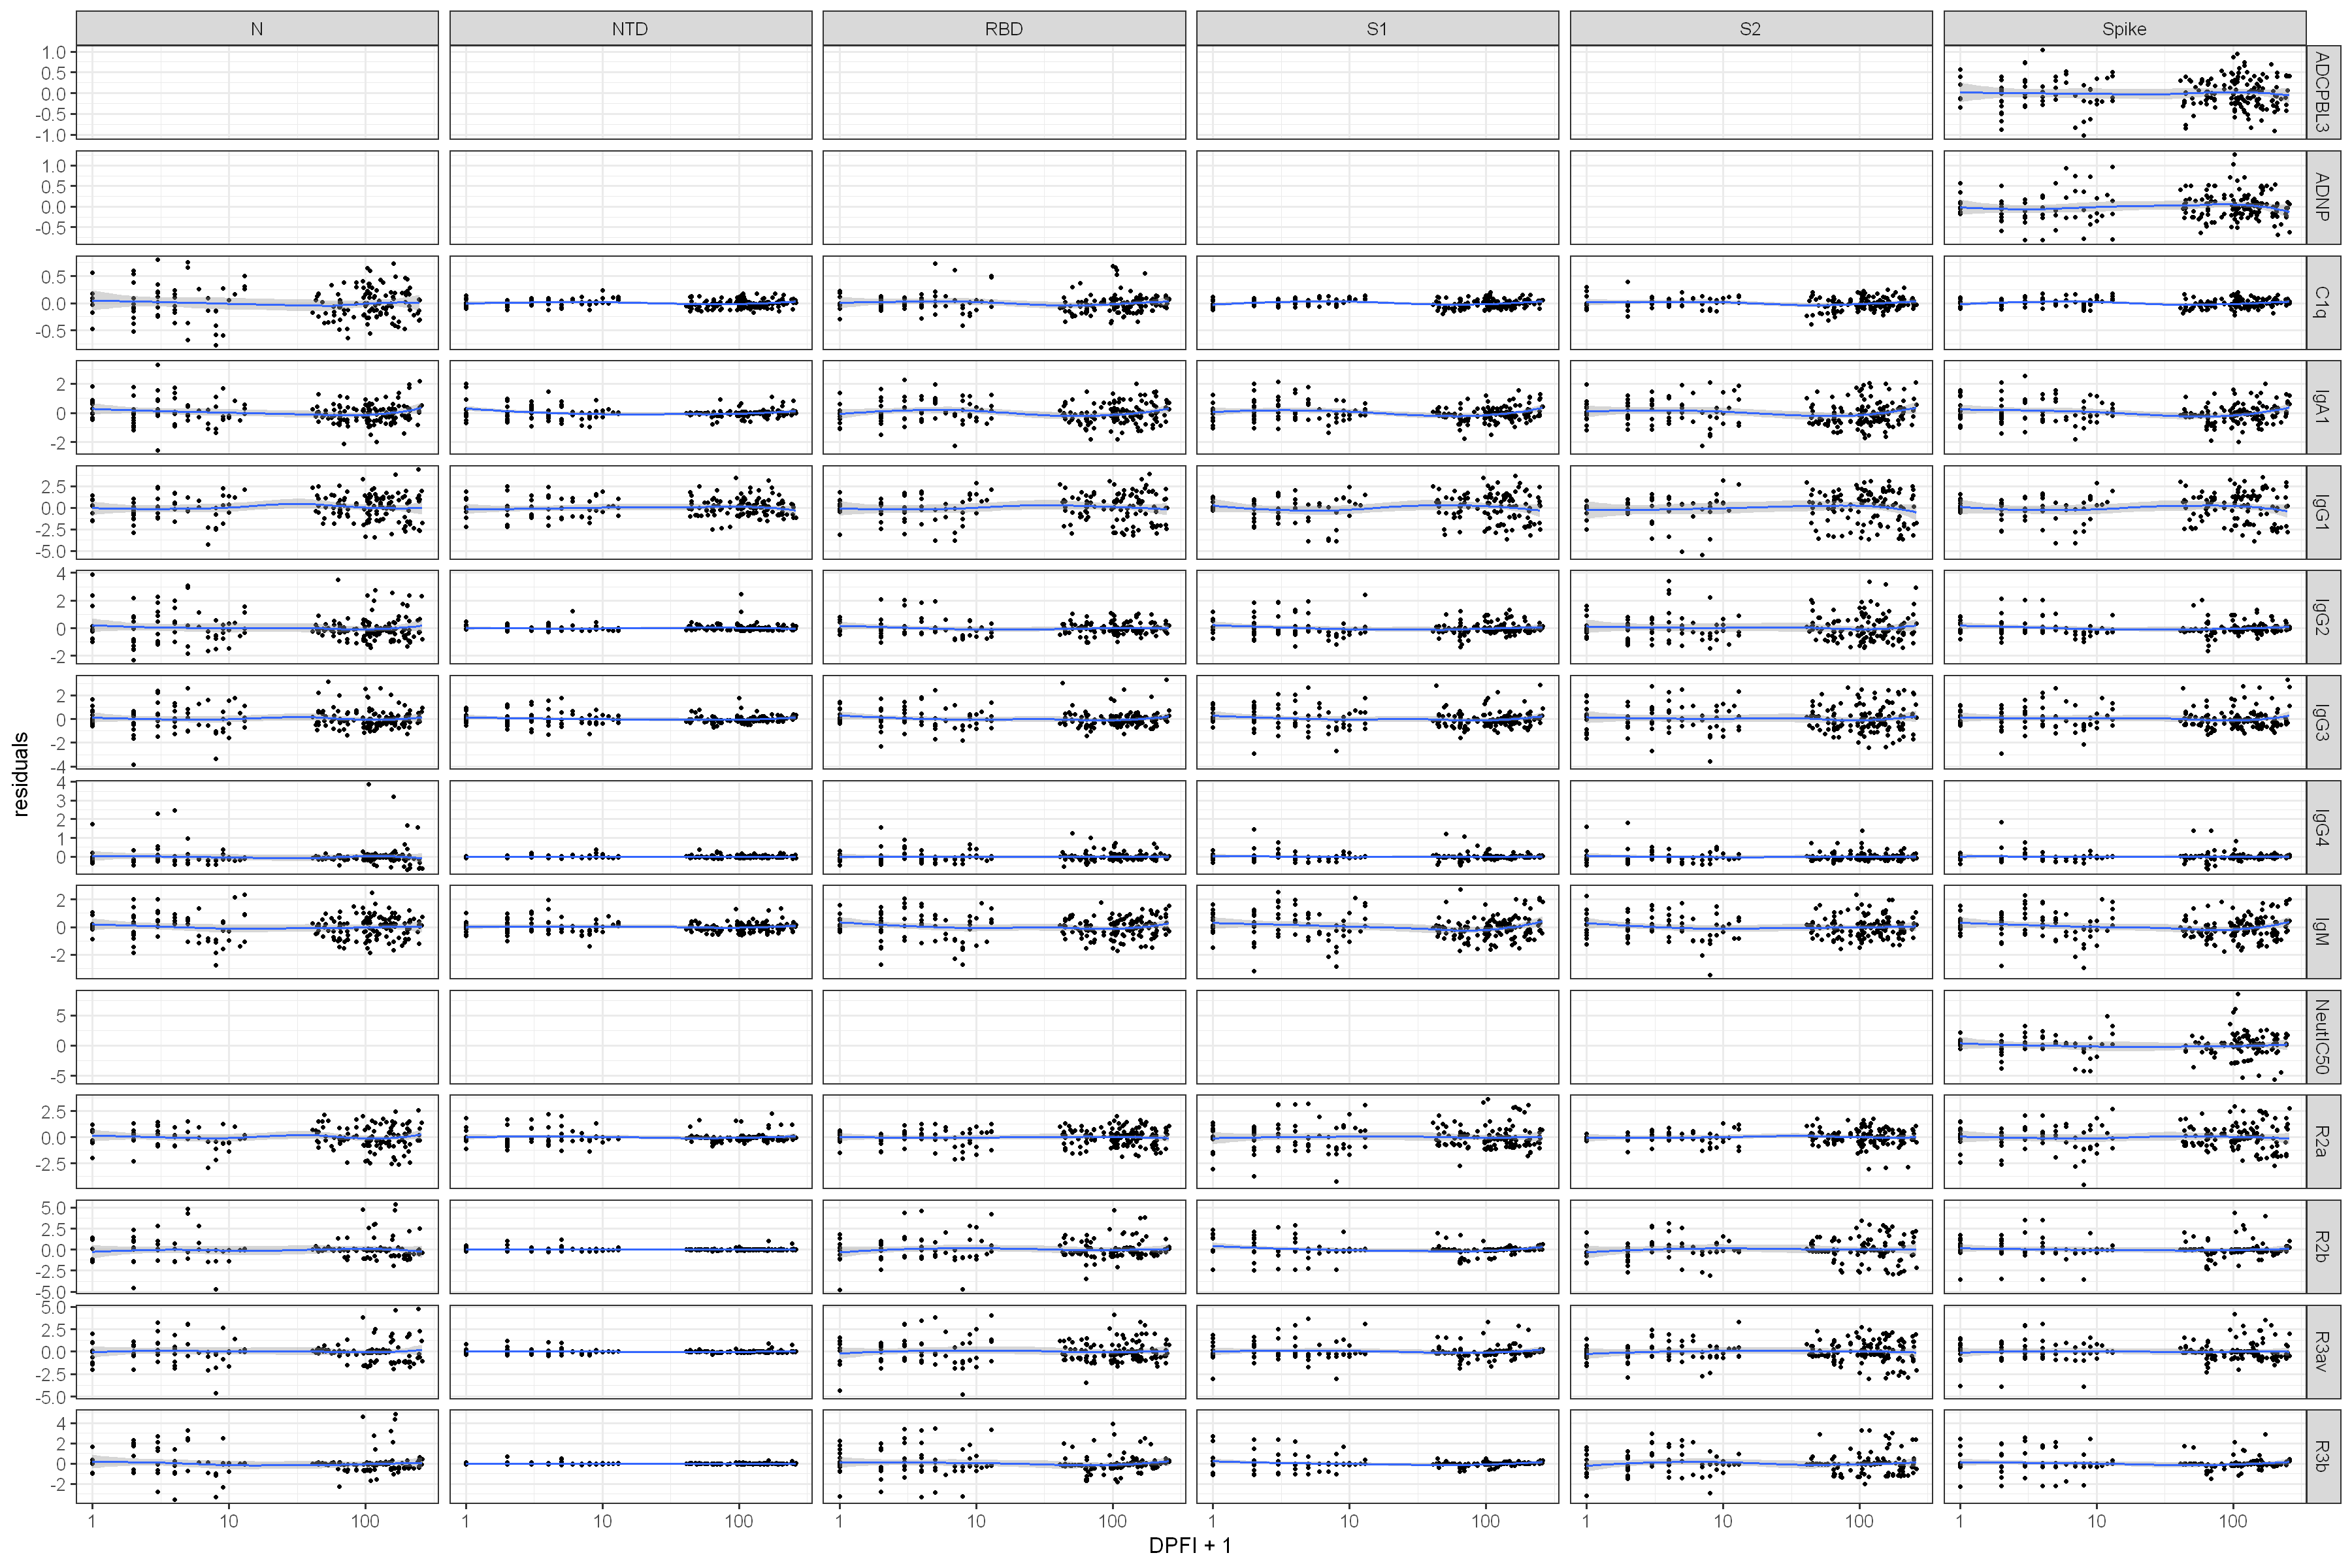

In [13]:
# data_decay$fit[1:10]
# data_decay$Lab.ID[1]
# # reshape2::melt(amod1$coefficients$random$Lab.ID)
# # amod1$coefficients$random$Lab.ID[data_decay$Lab.ID[1:10],1]
# # head(amod1$residuals)
# residuals=amod1$residuals  
# data=(amod1$data)     
# fitted=(amod1$fitted)   
# res=residuals(amod1) 
# m=cbind(residuals, data,fitted,res)
# colnames(m) = c('fixed_res','Lab.ID_res','value','DPFI','Lab.ID','fixed_fitted','Lab.ID_fitted','res')
# head(m)
# data_decay %>% 
#     mutate( Lab.ID = factor(as.character(Lab.ID),levels = unique( as.character(Lab.ID)[order(res)]))) %>%
#         ggplot(aes(x=Lab.ID,y=res))+geom_point()+coord_flip()+theme_bw(base_size=20)

options(repr.plot.width=30,repr.plot.height=20,warn = -1)

# data_decay %>% filter( virus=='WT') %>% 
#         ggplot(aes(x=DPFI+1,y=residuals,color=vaccine,group=Lab.ID))+geom_point()+geom_line()+
#     theme_bw(base_size=20)+scale_x_log10()+theme()+facet_grid(affinity~antigen,scale='free')

data_decay %>% filter( virus=='WT') %>% 
        ggplot(aes(x=DPFI+1,y=residuals))+geom_point()+#geom_line(aes(group=Lab.ID))+
        stat_smooth()+ #(method='glm')+
    theme_bw(base_size=20)+scale_x_log10()+
    theme()+facet_grid(affinity~antigen,scale='free')
options(warn=0)

variable        antigen virus   affinity n 
1   Alpha.RBD.C1q   RBD     Alpha   C1q      56
57  Beta.RBD.C1q    RBD     Beta    C1q      26
83  Delta.RBD.C1q   RBD     Delta   C1q      56
139 Gamma.RBD.C1q   RBD     Gamma   C1q      52
191 Omicron.RBD.C1q RBD     Omicron C1q      47
238 WT.RBD.C1q      RBD     WT      C1q      54

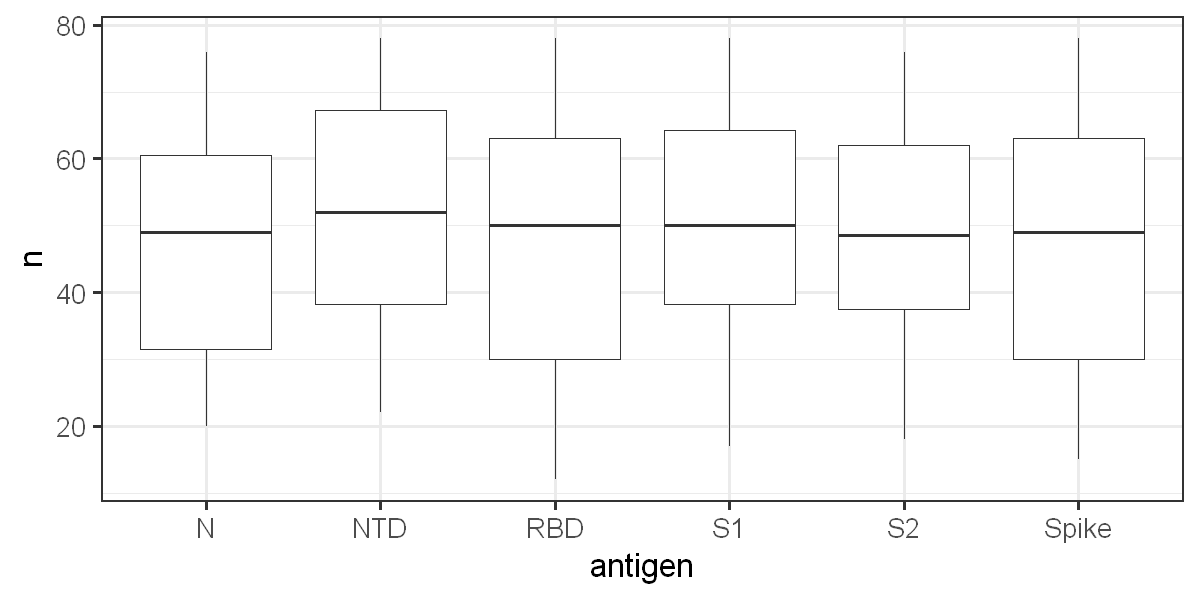

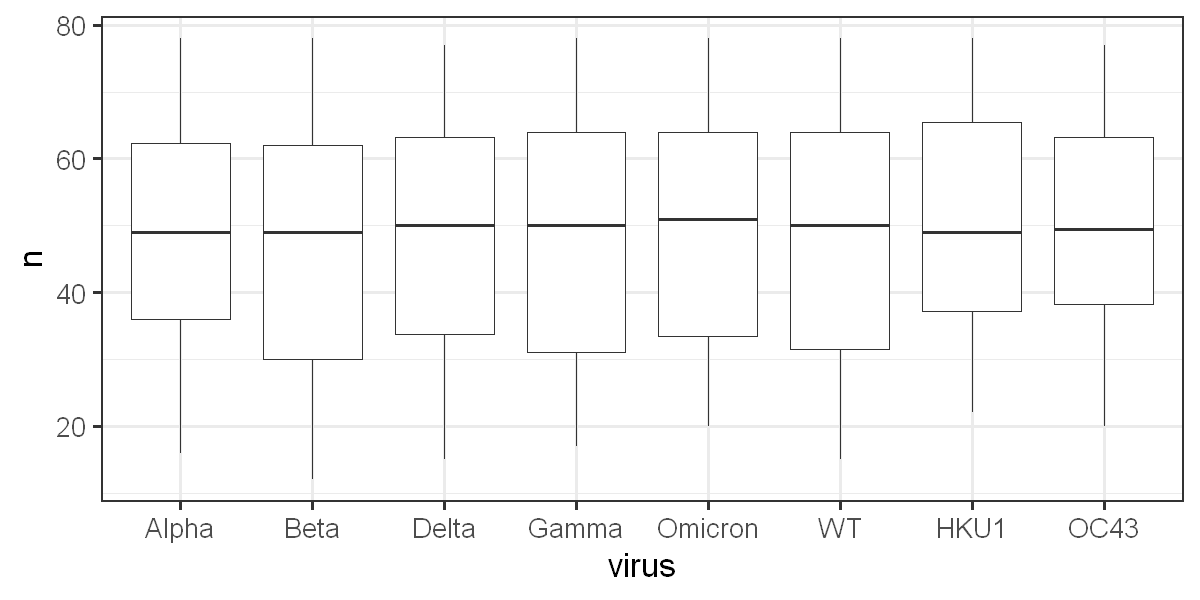

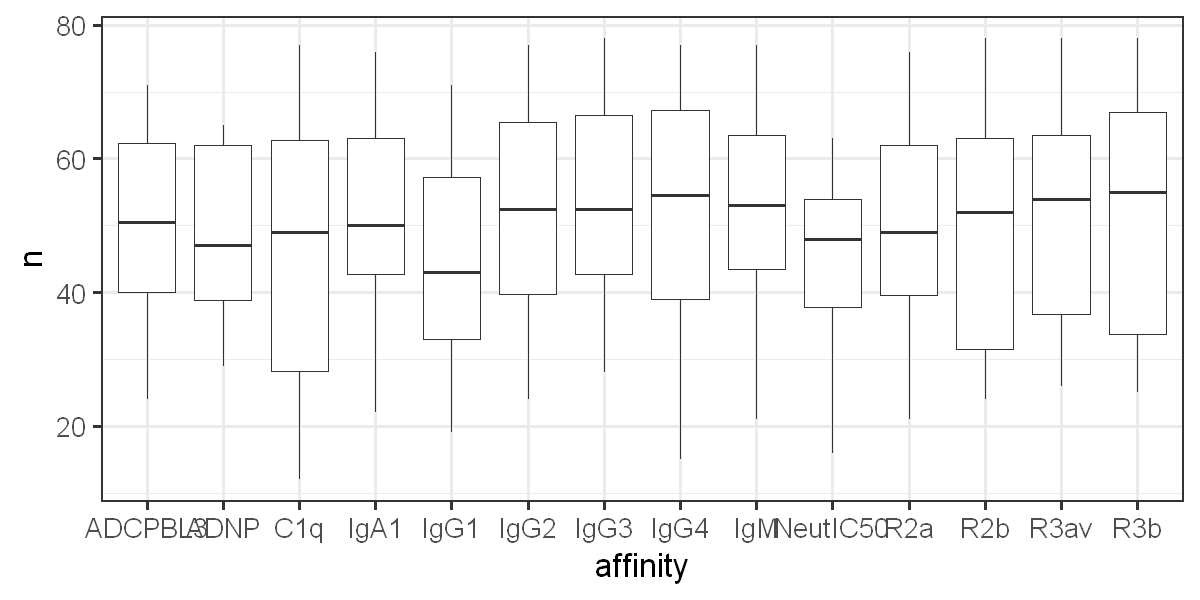

In [14]:
options(repr.plot.width=10,repr.plot.height=5)
head(tmp<-unique(data_decay[,c('variable','antigen','virus','affinity','n')]))
ggplot(tmp,aes(x=antigen,y=n))+geom_boxplot()+theme_bw(base_size=20)
ggplot(tmp,aes(x=virus,y=n))+geom_boxplot()+theme_bw(base_size=20)
ggplot(tmp,aes(x=affinity,y=n))+geom_boxplot()+theme_bw(base_size=20)

In [15]:
data_decay_orig=data_decay

In [16]:
write.csv(data_decay,file='../data-final/DS04-data_decay.rand_intercepts.csv')

In [17]:
data_decay_orig=read.csv('../data-final/DS04-data_decay.rand_intercepts.csv',row.names=1) 


In [18]:
dim(data_decay_orig)
sum(is.na(data_decay_orig$affinity))

[1] 41065    45

[1] 0

In [19]:
unique(data_decay_orig$affinity)

[1] "C1q"      "IgA1"     "IgG1"     "IgG2"     "IgG3"     "IgG4"    
 [7] "IgM"      "R2a"      "R2b"      "R3av"     "R3b"      "ADCPBL3" 
[13] "ADNP"     "NeutIC50"

In [20]:
data_decay=data_decay_orig
data_decay_c=data_decay%>%
    select(
        vaccine,variable,antigen,virus,affinity,model_type,
        n,hl,hl_se,hl_t,I,I_se,I_t,Pr_t_I,Pr_t_hl,
        naive_2.5,naive_50,naive_97.5,
                    naive_50_raw,naive_97.5_raw,
        naive_se,DPFI,value,fit,fit.lw,fit.hi  
    ) %>% unique()
head(data_decay_c)
write.csv(data_decay_c,file='../data-final/DS04-data_decay.rand_intercepts.clean.csv')
data_decay_small=data_decay_c %>% select(-fit,-fit.lw,-fit.hi,-DPFI,-value) %>% unique()
head(data_decay_small)
write.csv(data_decay_small,file='../data-final/DS04-data_decay.rand_intercepts.just_model.csv')

vaccine   variable      antigen virus affinity model_type n  hl           
1 CoronaVac Alpha.RBD.C1q RBD     Alpha C1q      lm         56 -0.0006143962
2 CoronaVac Alpha.RBD.C1q RBD     Alpha C1q      lm         56 -0.0006143962
3 CoronaVac Alpha.RBD.C1q RBD     Alpha C1q      lm         56 -0.0006143962
4 CoronaVac Alpha.RBD.C1q RBD     Alpha C1q      lm         56 -0.0006143962
5 CoronaVac Alpha.RBD.C1q RBD     Alpha C1q      lm         56 -0.0006143962
6 CoronaVac Alpha.RBD.C1q RBD     Alpha C1q      lm         56 -0.0006143962
  hl_se        hl_t      ... naive_50 naive_97.5 naive_50_raw naive_97.5_raw
1 0.0003778246 -1.626141 ... 1        1.26671    2045.875     2591.531      
2 0.0003778246 -1.626141 ... 1        1.26671    2045.875     2591.531      
3 0.0003778246 -1.626141 ... 1        1.26671    2045.875     2591.531      
4 0.0003778246 -1.626141 ... 1        1.26671    2045.875     2591.531      
5 0.0003778246 -1.626141 ... 1        1.26671    2045.875     2591.531      
6 0.0003778246 -1.626141 ... 1        1.26671    2045.875     2591.531      
  naive_se DPFI value    fit      fit.lw   fit.hi  
1 231.7655 0    1.071913 1.140690 1.079585 1.205255
2 231.7655 2    1.357365 1.139290 1.079371 1.202534
3 231.7655 3    1.059693 1.138590 1.079261 1.201180
4 231.7655 5    1.275616 1.137192 1.079033 1.198484
5 231.7655 6    1.498136 1.136493 1.078915 1.197144
6 231.7655 8    1.216839 1.135097 1.078671 1.194475

vaccine   variable        antigen virus   affinity model_type n 
1   CoronaVac Alpha.RBD.C1q   RBD     Alpha   C1q      lm         56
57  CoronaVac Beta.RBD.C1q    RBD     Beta    C1q      lm         26
83  CoronaVac Delta.RBD.C1q   RBD     Delta   C1q      lm         56
139 CoronaVac Gamma.RBD.C1q   RBD     Gamma   C1q      lm         52
191 CoronaVac Omicron.RBD.C1q RBD     Omicron C1q      lm         47
238 CoronaVac WT.RBD.C1q      RBD     WT      C1q      lm         54
    hl            hl_se        hl_t       ... I_se       I_t       Pr_t_I      
1   -0.0006143962 0.0003778246 -1.6261414 ... 0.03347245  3.932596 0.0002415242
57  -0.0021294641 0.0010758594 -1.9793145 ... 0.10114949  1.324682 0.1977525589
83  -0.0005481919 0.0003786758 -1.4476548 ... 0.03343946  3.283467 0.0018025685
139 -0.0005682394 0.0004135541 -1.3740390 ... 0.03743789  1.162840 0.2504142590
191  0.0005809210 0.0007403875  0.7846174 ... 0.06738418 -3.688259 0.0006060414
238 -0.0008508566 0.0008010399 -1.0621900 ... 0.06917320  3.116501 0.0029783152
    Pr_t_hl    naive_2.5 naive_50 naive_97.5 naive_50_raw naive_97.5_raw
1   0.10974203 0.8514664 1        1.266710     2045.875     2591.531    
57  0.05936241 0.5184145 1        2.221973    28432.750    63176.800    
83  0.15349477 0.8664983 1        1.226207     2227.500     2731.375    
139 0.17555816 0.5884511 1        1.376384     3883.500     5345.188    
191 0.43678906 0.5941412 1        1.404198   545335.250   765758.594    
238 0.29305770 0.9023562 1        1.250513     1716.250     2146.194    
    naive_se   
1      231.7655
57   15660.9760
83     235.9695
139    900.5460
191 133732.5325
238    170.5627

In [21]:
print('done')
colnames(data_decay_small)

[1] "done"


[1] "vaccine"        "variable"       "antigen"        "virus"         
 [5] "affinity"       "model_type"     "n"              "hl"            
 [9] "hl_se"          "hl_t"           "I"              "I_se"          
[13] "I_t"            "Pr_t_I"         "Pr_t_hl"        "naive_2.5"     
[17] "naive_50"       "naive_97.5"     "naive_50_raw"   "naive_97.5_raw"
[21] "naive_se"

# Scatter plot Visuals

In [22]:
unique(data_decay_orig$affinity)

data_decay=data_decay_orig %>%
    mutate(
        affinity = factor(affinity,levels=c('IgM','IgG1','IgG2','IgG3','IgG4','IgA1','R2a','R2b','R3av','R3b','C1q','ADCD','ADCPBL2','ADCPBL3','ADNP','NeutIC50')),
        virus = factor(as.character(virus) , levels=c('WT' ,'Alpha','Beta','Delta','Gamma','Omicron','HKU1','OC43'))
    ) %>% filter( !is.na(affinity))


table(as.character(data_decay$affinity))


[1] "C1q"      "IgA1"     "IgG1"     "IgG2"     "IgG3"     "IgG4"    
 [7] "IgM"      "R2a"      "R2b"      "R3av"     "R3b"      "ADCPBL3" 
[13] "ADNP"     "NeutIC50"


 ADCPBL3     ADNP      C1q     IgA1     IgG1     IgG2     IgG3     IgG4 
     393      385     3467     3749     3143     3625     3871     3682 
     IgM NeutIC50      R2a      R2b     R3av      R3b 
    3771      175     3657     3589     3739     3819 

In [23]:
options(repr.plot.width=25,repr.plot.height=30)

options(warn=-1)



out = list()
for(anti in c('Spike','RBD')){
    out[[anti]]=list()
    for(aff_i in c('^I','^R','^A|^N','^N')){

        data_i = data_decay %>% filter(antigen==anti & grepl(aff_i,affinity))

        print(table(as.character(data_i$affinity)))
        
        if(nrow(data_i)==0){next}
        
        glin1=ggplot(data_i,aes(x=DPFI,y=value,fill=vaccine,shape=vaccine))+
                geom_point(color='black',size=.5)+
                geom_line(aes(group=strat,color=strat),alpha=.5)+ # patient-specific lines
                theme_bw(base_size = 20)+
                geom_line(aes(y=fit,lty=vaccine),size=1,color='black')+         # trend lines
                geom_ribbon(aes(ymin=fit.lw,ymax=fit.hi,y=fit,fill=vaccine),alpha=.5) +
                theme(legend.key.width  = unit(2.5,"cm"),legend.position = 'bottom')+
                guides(color = 'none')+
                # geom_hline(aes(yintercept=naive_2.5))+
                # geom_hline(aes(yintercept=naive_50))+
                geom_hline(aes(yintercept=naive_97.5))+
                scale_fill_manual(values = col)+
                ylab('Antigen-specific IgG1 Titer')+xlab('Days Post Innoculation/Infection (2-dose/1-infection)')+
                ggtitle(paste0('Response Decay by VOC:\n','-specific IgG1 titer Decay over time'))+
                facet_grid(affinity~virus,scale='free')
#                facet_grid(antigen~affinity,scale='free')

        gexp1 = glin1 + scale_y_log10()
        gexp2 = glin1 + scale_y_log10(lim=c(1,max(data_decay$value,na.rm=T)*.25))

        aff_i = gsub('\\^|\\|','',aff_i)

        # if(vir%in%c('WT')){
        #     hgt=25; wdt=25
        #     if(aff_i=='A'){hgt=10; wdt=10}
        # }else{
            hgt=20; wdt=20
            if(aff_i=='A'){hgt=10;wdt=12}
#        }
        
        out[[anti]][[aff_i]] = gexp1
        
        print(paste0('../results/04_scatter/exponential_full_range.',anti,'.',aff_i,'.pdf'))
        
        ggsave(gexp1,filename = paste0('../results/04_scatter/exponential_full_range.',anti,'.',aff_i,'.pdf'),  height=hgt,width=wdt,limitsize=F)
        ggsave(gexp2,filename = paste0('../results/04_scatter/exponential_wo_top25perc.',anti,'.',aff_i,'.pdf'),height=hgt,width=wdt,limitsize=F)
        ggsave(glin1,filename = paste0('../results/04_scatter/linear_full_range.',anti,'.',aff_i,'.pdf'),       height=hgt,width=wdt,limitsize=F)

        if(anti=='Spike'&aff_i=='I'){ ggsave(gexp1,filename = paste0('../results/figS2a.pdf'),  height=hgt,width=wdt,limitsize=F) }
        if(anti=='Spike'&aff_i=='R'){ ggsave(gexp1,filename = paste0('../results/figS2b.pdf'),  height=hgt,width=wdt,limitsize=F) }
        if(anti=='RBD'&aff_i=='I'){ ggsave(gexp1,filename = paste0('../results/figS3a.pdf'),  height=hgt,width=wdt,limitsize=F) }
        if(anti=='RBD'&aff_i=='R'){ ggsave(gexp1,filename = paste0('../results/figS3b.pdf'),  height=hgt,width=wdt,limitsize=F) }

        options(warn=0)
    }
    # stop()

}


IgA1 IgG1 IgG2 IgG3 IgG4  IgM 
1657 1382 1607 1717 1647 1667 
[1] "../results/04_scatter/exponential_full_range.Spike.I.pdf"

 R2a  R2b R3av  R3b 
1628 1593 1656 1709 
[1] "../results/04_scatter/exponential_full_range.Spike.R.pdf"


Warning message:
"Removed 1661 rows containing missing values or values outside the scale range (`geom_point()`)."
Warning message:
"Removed 143 rows containing missing values or values outside the scale range (`geom_line()`)."
Warning message:
"Removed 5 rows containing missing values or values outside the scale range (`geom_line()`)."
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning me


 ADCPBL3     ADNP NeutIC50 
     393      385      175 
[1] "../results/04_scatter/exponential_full_range.Spike.AN.pdf"


Warning message:
"Removed 161 rows containing missing values or values outside the scale range (`geom_point()`)."
Warning message:
"Removed 69 rows containing missing values or values outside the scale range (`geom_line()`)."
Warning message:
"Removed 38 rows containing missing values or values outside the scale range (`geom_line()`)."
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"



NeutIC50 
     175 
[1] "../results/04_scatter/exponential_full_range.Spike.N.pdf"


Warning message:
"Removed 47 rows containing missing values or values outside the scale range (`geom_point()`)."
Warning message:
"Removed 47 rows containing missing values or values outside the scale range (`geom_line()`)."
Warning message:
"Removed 38 rows containing missing values or values outside the scale range (`geom_line()`)."
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"



IgA1 IgG1 IgG2 IgG3 IgG4  IgM 
1248 1052 1187 1292 1207 1267 
[1] "../results/04_scatter/exponential_full_range.RBD.I.pdf"


Warning message:
"Removed 2301 rows containing missing values or values outside the scale range (`geom_point()`)."
Warning message:
"Removed 435 rows containing missing values or values outside the scale range (`geom_line()`)."
Warning message:
"Removed 94 rows containing missing values or values outside the scale range (`geom_line()`)."
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning m


 R2a  R2b R3av  R3b 
1240 1209 1263 1282 
[1] "../results/04_scatter/exponential_full_range.RBD.R.pdf"


Warning message:
"Removed 1336 rows containing missing values or values outside the scale range (`geom_point()`)."
Warning message:
"Removed 175 rows containing missing values or values outside the scale range (`geom_line()`)."
Warning message:
"Removed 76 rows containing missing values or values outside the scale range (`geom_line()`)."
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning m

< table of extent 0 >
< table of extent 0 >


In [24]:
options(repr.plot.width=25,repr.plot.height=30)

options(warn=-1)



out = list()
for(vir in unique( data_i$virus )){
    out[[vir]]=list()
    for(aff_i in c('^I','^R','^A|^N','^N')){

        data_i = data_decay %>% filter(virus==vir & grepl(aff_i,affinity))

        print(table(as.character(data_i$affinity)))
        
        if(nrow(data_i)==0){next}
        
        glin1=ggplot(data_i,aes(x=DPFI,y=value,fill=vaccine,shape=vaccine))+
                geom_point(color='black',size=.5)+
                geom_line(aes(group=strat,color=strat),alpha=.5)+ # patient-specific lines
                theme_bw(base_size = 20)+
                geom_line(aes(y=fit,lty=vaccine),size=1,color='black')+         # trend lines
                geom_ribbon(aes(ymin=fit.lw,ymax=fit.hi,y=fit,fill=vaccine),alpha=.5) +
                theme(legend.key.width  = unit(2.5,"cm"),legend.position = 'bottom')+
                guides(color = 'none')+
                # geom_hline(aes(yintercept=naive_2.5))+
                # geom_hline(aes(yintercept=naive_50))+
                geom_hline(aes(yintercept=naive_97.5))+
                scale_fill_manual(values = col)+
                ylab('Virus-specific IgG1 Titer')+xlab('Days Post Innoculation/Infection (2-dose/1-infection)')+
                ggtitle(paste0('Response Decay by VOC:\n','-specific IgG1 titer Decay over time'))+
                facet_grid(affinity~antigen,scale='free')
#                facet_grid(antigen~affinity,scale='free')

        gexp1 = glin1 + scale_y_log10()
        gexp2 = glin1 + scale_y_log10(lim=c(1,max(data_decay$value,na.rm=T)*.25))

        aff_i = gsub('\\^|\\|','',aff_i)

        # if(vir%in%c('WT')){
        #     hgt=25; wdt=25
        #     if(aff_i=='A'){hgt=10; wdt=10}
        # }else{
            hgt=20; wdt=20
            if(aff_i=='A'){hgt=10;wdt=12}
#        }
        
        out[[vir]][[aff_i]] = gexp1
        
        print(paste0('../results/04_scatter/exponential_full_range.',vir,'.',aff_i,'.pdf'))
        
        ggsave(gexp1,filename = paste0('../results/04_scatter/exponential_full_range.',vir,'.',aff_i,'.pdf'),  height=hgt,width=wdt,limitsize=F)
        ggsave(gexp2,filename = paste0('../results/04_scatter/exponential_wo_top25perc.',vir,'.',aff_i,'.pdf'),height=hgt,width=wdt,limitsize=F)
        ggsave(glin1,filename = paste0('../results/04_scatter/linear_full_range.',vir,'.',aff_i,'.pdf'),       height=hgt,width=wdt,limitsize=F)

        if(vir=='WT'&aff_i=='I'){ ggsave(gexp1,filename = paste0('../results/figS1a.pdf'),  height=hgt,width=wdt,limitsize=F) }
        if(vir=='WT'&aff_i=='R'){ ggsave(gexp1,filename = paste0('../results/figS1b.pdf'),  height=hgt,width=wdt,limitsize=F) }

        options(warn=0)
    }
    # stop()

}

In [25]:
# out$Spike$N

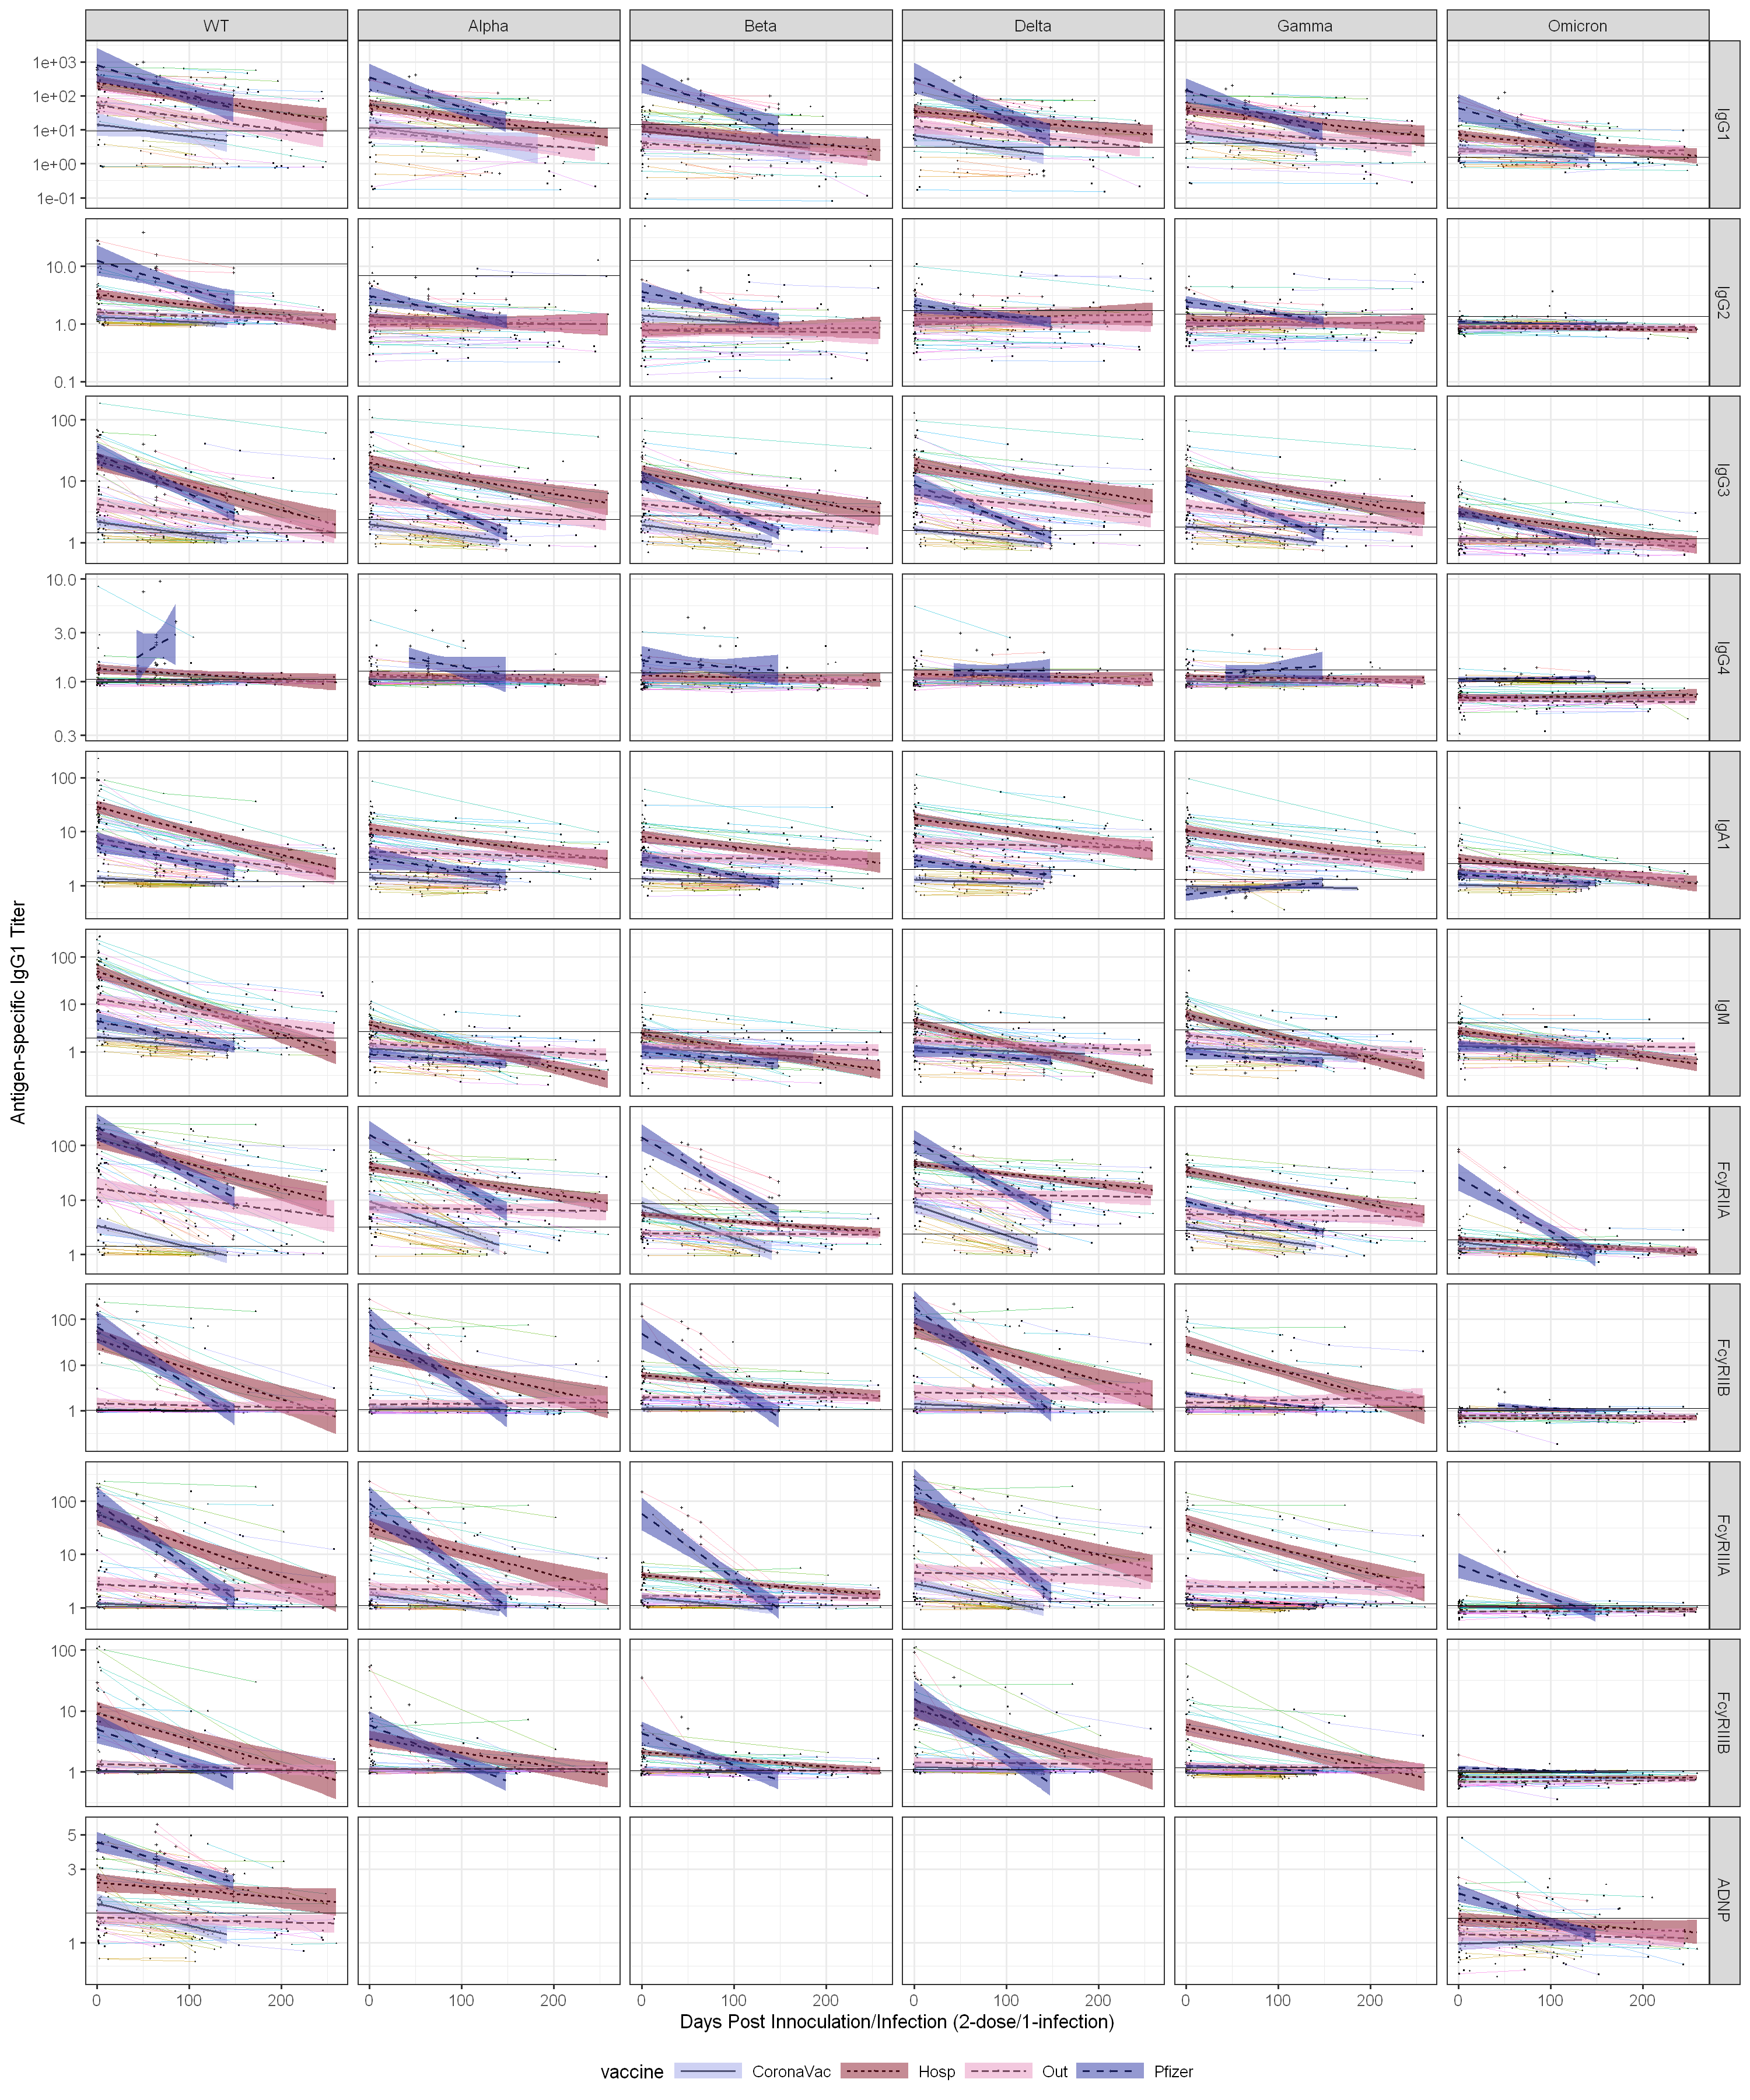

In [26]:
options(repr.plot.width=25,repr.plot.height=30)

options(warn=-1)


data_i = data_decay_orig %>%

        mutate( affinity = gsub('^R','FcyR',gsub('R2','RII',gsub('R3','RIII',gsub('a$|av$','A',gsub('b$','B',gsub('BL$','',affinity))))))) %>%
        mutate(
            affinity = factor(affinity,levels=c('IgG1','IgG2','IgG3','IgG4','IgA1','IgM','FcyRIIA','FcyRIIB','FcyRIIIA','FcyRIIIB','ADCD','ADCP','ADNP')),
            # affinity = factor(affinity,levels=c('IgG1','IgG3','IgA1','IgM','R2a','R2b','R3av','R3b')), #,'C1q','ADCD','ADCPBL2','ADCPBL3','ADNP')),
            virus = factor(as.character(virus) , levels=c('WT' ,'Alpha','Beta','Delta','Gamma','Omicron')) #,'HKU1','OC43'))
        ) %>%
        filter(!is.na(virus) & !is.na(affinity) & antigen=='Spike' )

        # mutate(
        #     affinity = factor(affinity,levels=c('IgM','IgG1','IgG2','IgG3','IgG4','IgA1','R2a','R2b','R3av','R3b')), #,'C1q','ADCD','ADCPBL2','ADCPBL3','ADNP')),
        #     virus = factor(as.character(virus) , levels=c('WT' ,'Alpha','Beta','Delta','Gamma','Omicron')) #,'HKU1','OC43'))
        # ) %>% filter(!is.na(virus)&!is.na(affinity)) %>% filter(antigen=='Spike' & !is.na(affinity))

    # ### Drop increasing values
    # data_i = data_i[order(data_i$DPFI),] # sort by time variable

    # # for(subj in unique(data_i$Lab.ID)){
    # #     idx_subj = which(data_i$Lab.ID==subj)
    # #     v_si = data_i$value[idx_subj] # subj-specific values
    # #     t_si = data_i$DPFI[idx_subj] # subj-specific values
    # #     is_inc = ifelse(t_si>90, # only mark erroneous increase after 3mo
    # #                     c(FALSE,diff(v_si) > .1),
    # #                     # c(diff(v_si) > .1,FALSE)
    # #                     FALSE
    # #                     )
    # #     is_inc[1]=FALSE
    # #     is_inc[is.na(is_inc)]=FALSE
    # #     data_i$value[idx_subj[is_inc]] = NA
    # # }


fig1_full=ggplot(data_i,aes(x=DPFI,y=value,fill=vaccine,shape=vaccine))+
        geom_point(color='black',size=.5)+
        geom_line(aes(group=strat,color=strat),alpha=.5)+ # patient-specific lines
        theme_bw(base_size = 20)+
        geom_line(aes(y=fit,lty=vaccine),size=1,color='black')+         # trend lines
        geom_ribbon(aes(ymin=fit.lw,ymax=fit.hi,y=fit,fill=vaccine),alpha=.5) +
        theme(legend.key.width  = unit(2.5,"cm"),legend.position = 'bottom')+
        guides(color = 'none')+
        # geom_hline(aes(yintercept=naive_2.5))+
        # geom_hline(aes(yintercept=naive_50))+
        geom_hline(aes(yintercept=naive_97.5))+
        scale_fill_manual(values = col)+
        ylab('Antigen-specific IgG1 Titer')+xlab('Days Post Innoculation/Infection (2-dose/1-infection)')+
        # ggtitle(paste0('Response Decay by VOC:\n','-specific IgG1 titer Decay over time'))+
        facet_grid(affinity~virus,scale='free')
#                facet_grid(antigen~affinity,scale='free')

fig1_full = fig1_full + scale_y_log10()

    hgt=30; wdt=20

ggsave(fig1_full,filename = paste0('../results/04_scatter/exponential_full_range.Spike.pdf'),  height=hgt,width=wdt,limitsize=F)

options(warn=0)
fig1_full

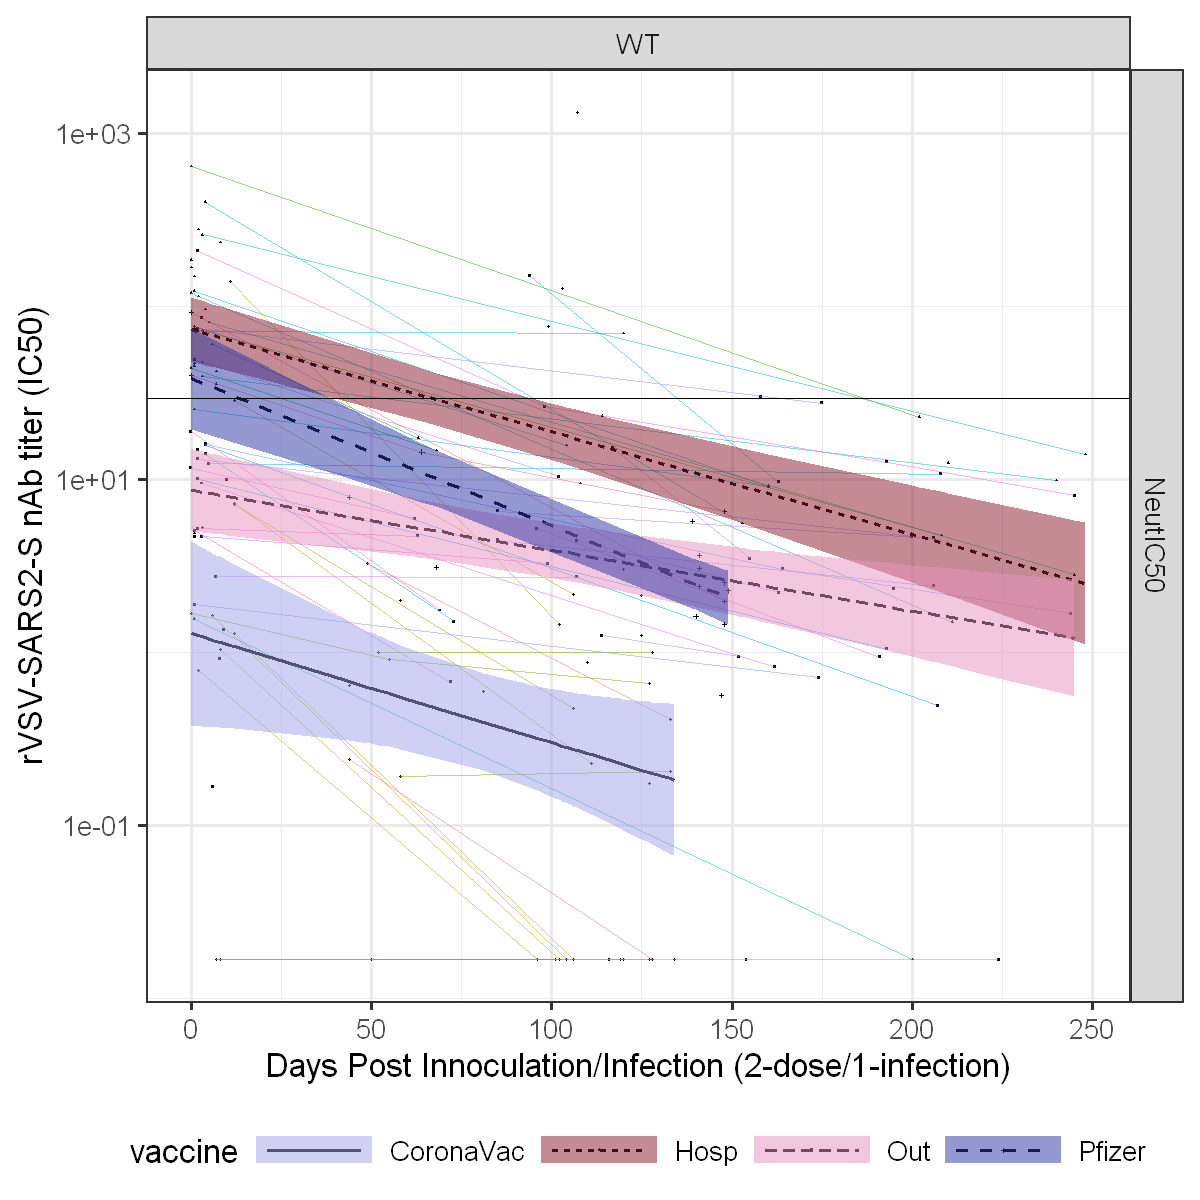

In [27]:
options(repr.plot.width=10,repr.plot.height=10)

options(warn=-1)

data_i = data_decay_orig %>%
        mutate(
            affinity = factor(affinity,levels=c('NeutIC50')), #,'C1q','ADCD','ADCPBL2','ADCPBL3','ADNP')),
            virus = factor(as.character(virus) , levels=c('WT' ,'Alpha','Beta','Delta','Gamma','Omicron')) #,'HKU1','OC43'))
        ) %>% filter(!is.na(virus)&!is.na(affinity)) %>% filter(antigen=='Spike' & !is.na(affinity))

figS_neut=ggplot(data_i,aes(x=DPFI,y=value,fill=vaccine,shape=vaccine))+
        geom_point(color='black',size=.5)+
        geom_line(aes(group=strat,color=strat),alpha=.5)+ # patient-specific lines
        theme_bw(base_size = 20)+
        geom_line(aes(y=fit,lty=vaccine),size=1,color='black')+         # trend lines
        geom_ribbon(aes(ymin=fit.lw,ymax=fit.hi,y=fit,fill=vaccine),alpha=.5) +
        theme(legend.key.width  = unit(2.5,"cm"),legend.position = 'bottom')+
        guides(color = 'none')+
        # geom_hline(aes(yintercept=naive_2.5))+
        # geom_hline(aes(yintercept=naive_50))+
        geom_hline(aes(yintercept=naive_97.5))+
        scale_fill_manual(values = col)+
        ylab('rVSV-SARS2-S nAb titer (IC50)')+
        xlab('Days Post Innoculation/Infection (2-dose/1-infection)')+
        # ggtitle(paste0('Response Decay by VOC:\n','-specific IgG1 titer Decay over time'))+
        facet_grid(affinity~virus,scale='free')
#                facet_grid(antigen~affinity,scale='free')

figS_neut = figS_neut + scale_y_log10()

    hgt=10; wdt=10

ggsave(figS_neut,filename = paste0('../results/04_scatter/exponential_full_range.Spike.neutralize.pdf'),  height=hgt,width=wdt,limitsize=F)
ggsave(figS_neut,filename = paste0('../results/figS7.pdf'),  height=hgt,width=wdt,limitsize=F)

options(warn=0)
figS_neut

# Decay Parameter Visuals

In [28]:
qnorm(.95)
data_decay_small %>% filter(variable=='WT.Spike.IgG1')

[1] 1.644854

vaccine   variable      antigen virus affinity model_type n  hl          
1 CoronaVac WT.Spike.IgG1 Spike   WT    IgG1     lm         50 -0.007933154
2 Pfizer    WT.Spike.IgG1 Spike   WT    IgG1     lm         19 -0.019938965
3 Hosp      WT.Spike.IgG1 Spike   WT    IgG1     lm         41 -0.010269484
4 Out       WT.Spike.IgG1 Spike   WT    IgG1     lm         61 -0.008293728
  hl_se       hl_t      ... I_se      I_t       Pr_t_I       Pr_t_hl     
1 0.005403741 -1.468085 ... 0.4694741  5.679108 7.721577e-07 0.1486039195
2 0.007133662 -2.795053 ... 0.6906596  9.695567 2.431173e-08 0.0124341484
3 0.002455121 -4.182883 ... 0.2890667 19.079763 2.218822e-21 0.0001578919
4 0.002882475 -2.877294 ... 0.3576726 11.077619 4.839087e-16 0.0055758237
  naive_2.5 naive_50 naive_97.5 naive_50_raw naive_97.5_raw naive_se
1 0.7704403 1        9.138638   3361         30714.96       11873.35
2 0.7704403 1        9.138638   3361         30714.96       11873.35
3 0.7704403 1        9.138638   3361         30714.96       11873.35
4 0.7704403 1        9.138638   3361         30714.96       11873.35


0.1   1 
627 185 

Warning message in transformation$transform(x):
"NaNs produced"
Warning message in scale_x_log10():
"log-10 transformation introduced infinite values."
Warning message:
"Removed 2 rows containing missing values or values outside the scale range (`geom_errorbarh()`)."
Warning message in transformation$transform(x):
"NaNs produced"
Warning message in scale_x_log10():
"log-10 transformation introduced infinite values."
Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_errorbarh()`)."
Warning message in transformation$transform(x):
"NaNs produced"
Warning message in scale_x_log10():
"log-10 transformation introduced infinite values."
Warning message:
"Removed 2 rows containing missing values or values outside the scale range (`geom_errorbarh()`)."
Warning message in transformation$transform(x):
"NaNs produced"
Warning message in scale_x_log10():
"log-10 transformation introduced infinite values."
Warning message:
"Removed 1 row containing mi

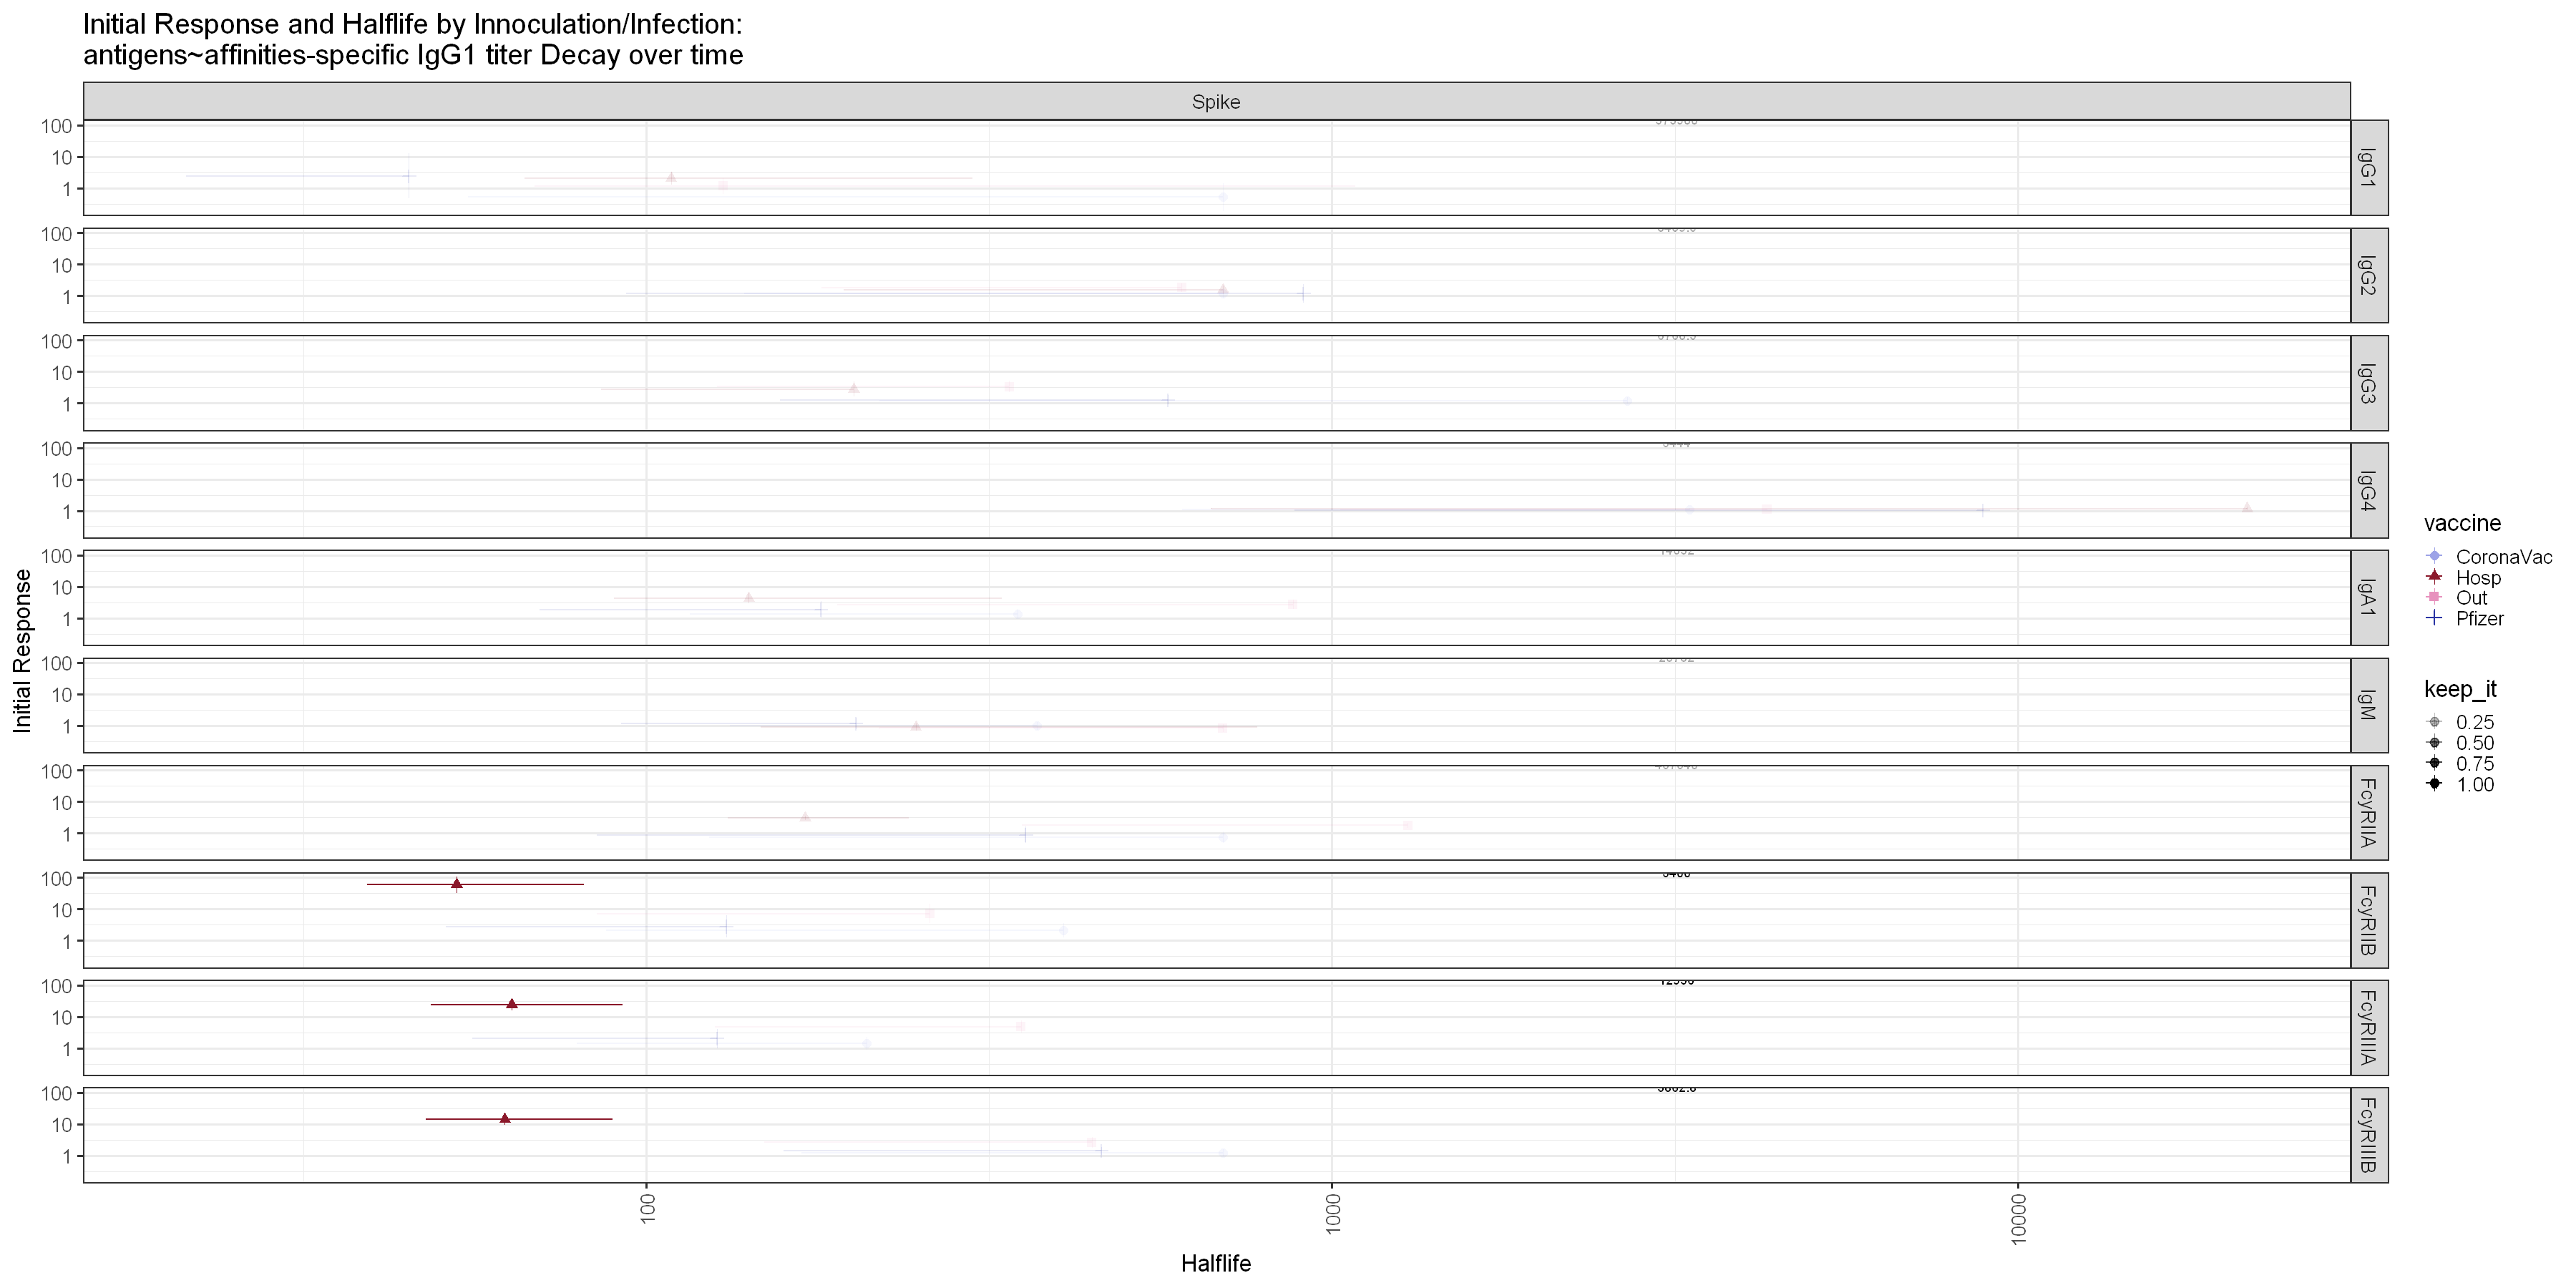

Warning message in transformation$transform(x):
"NaNs produced"
Warning message in scale_x_log10():
"log-10 transformation introduced infinite values."
Warning message:
"Removed 5 rows containing missing values or values outside the scale range (`geom_errorbarh()`)."
Warning message in transformation$transform(x):
"NaNs produced"
Warning message in scale_x_log10():
"log-10 transformation introduced infinite values."
Warning message:
"Removed 5 rows containing missing values or values outside the scale range (`geom_errorbarh()`)."
Warning message in transformation$transform(x):
"NaNs produced"
Warning message in scale_x_log10():
"log-10 transformation introduced infinite values."
Warning message:
"Removed 2 rows containing missing values or values outside the scale range (`geom_errorbarh()`)."
Warning message in transformation$transform(x):
"NaNs produced"
Warning message in scale_x_log10():
"log-10 transformation introduced infinite values."
Warning message:
"Removed 2 rows containing 

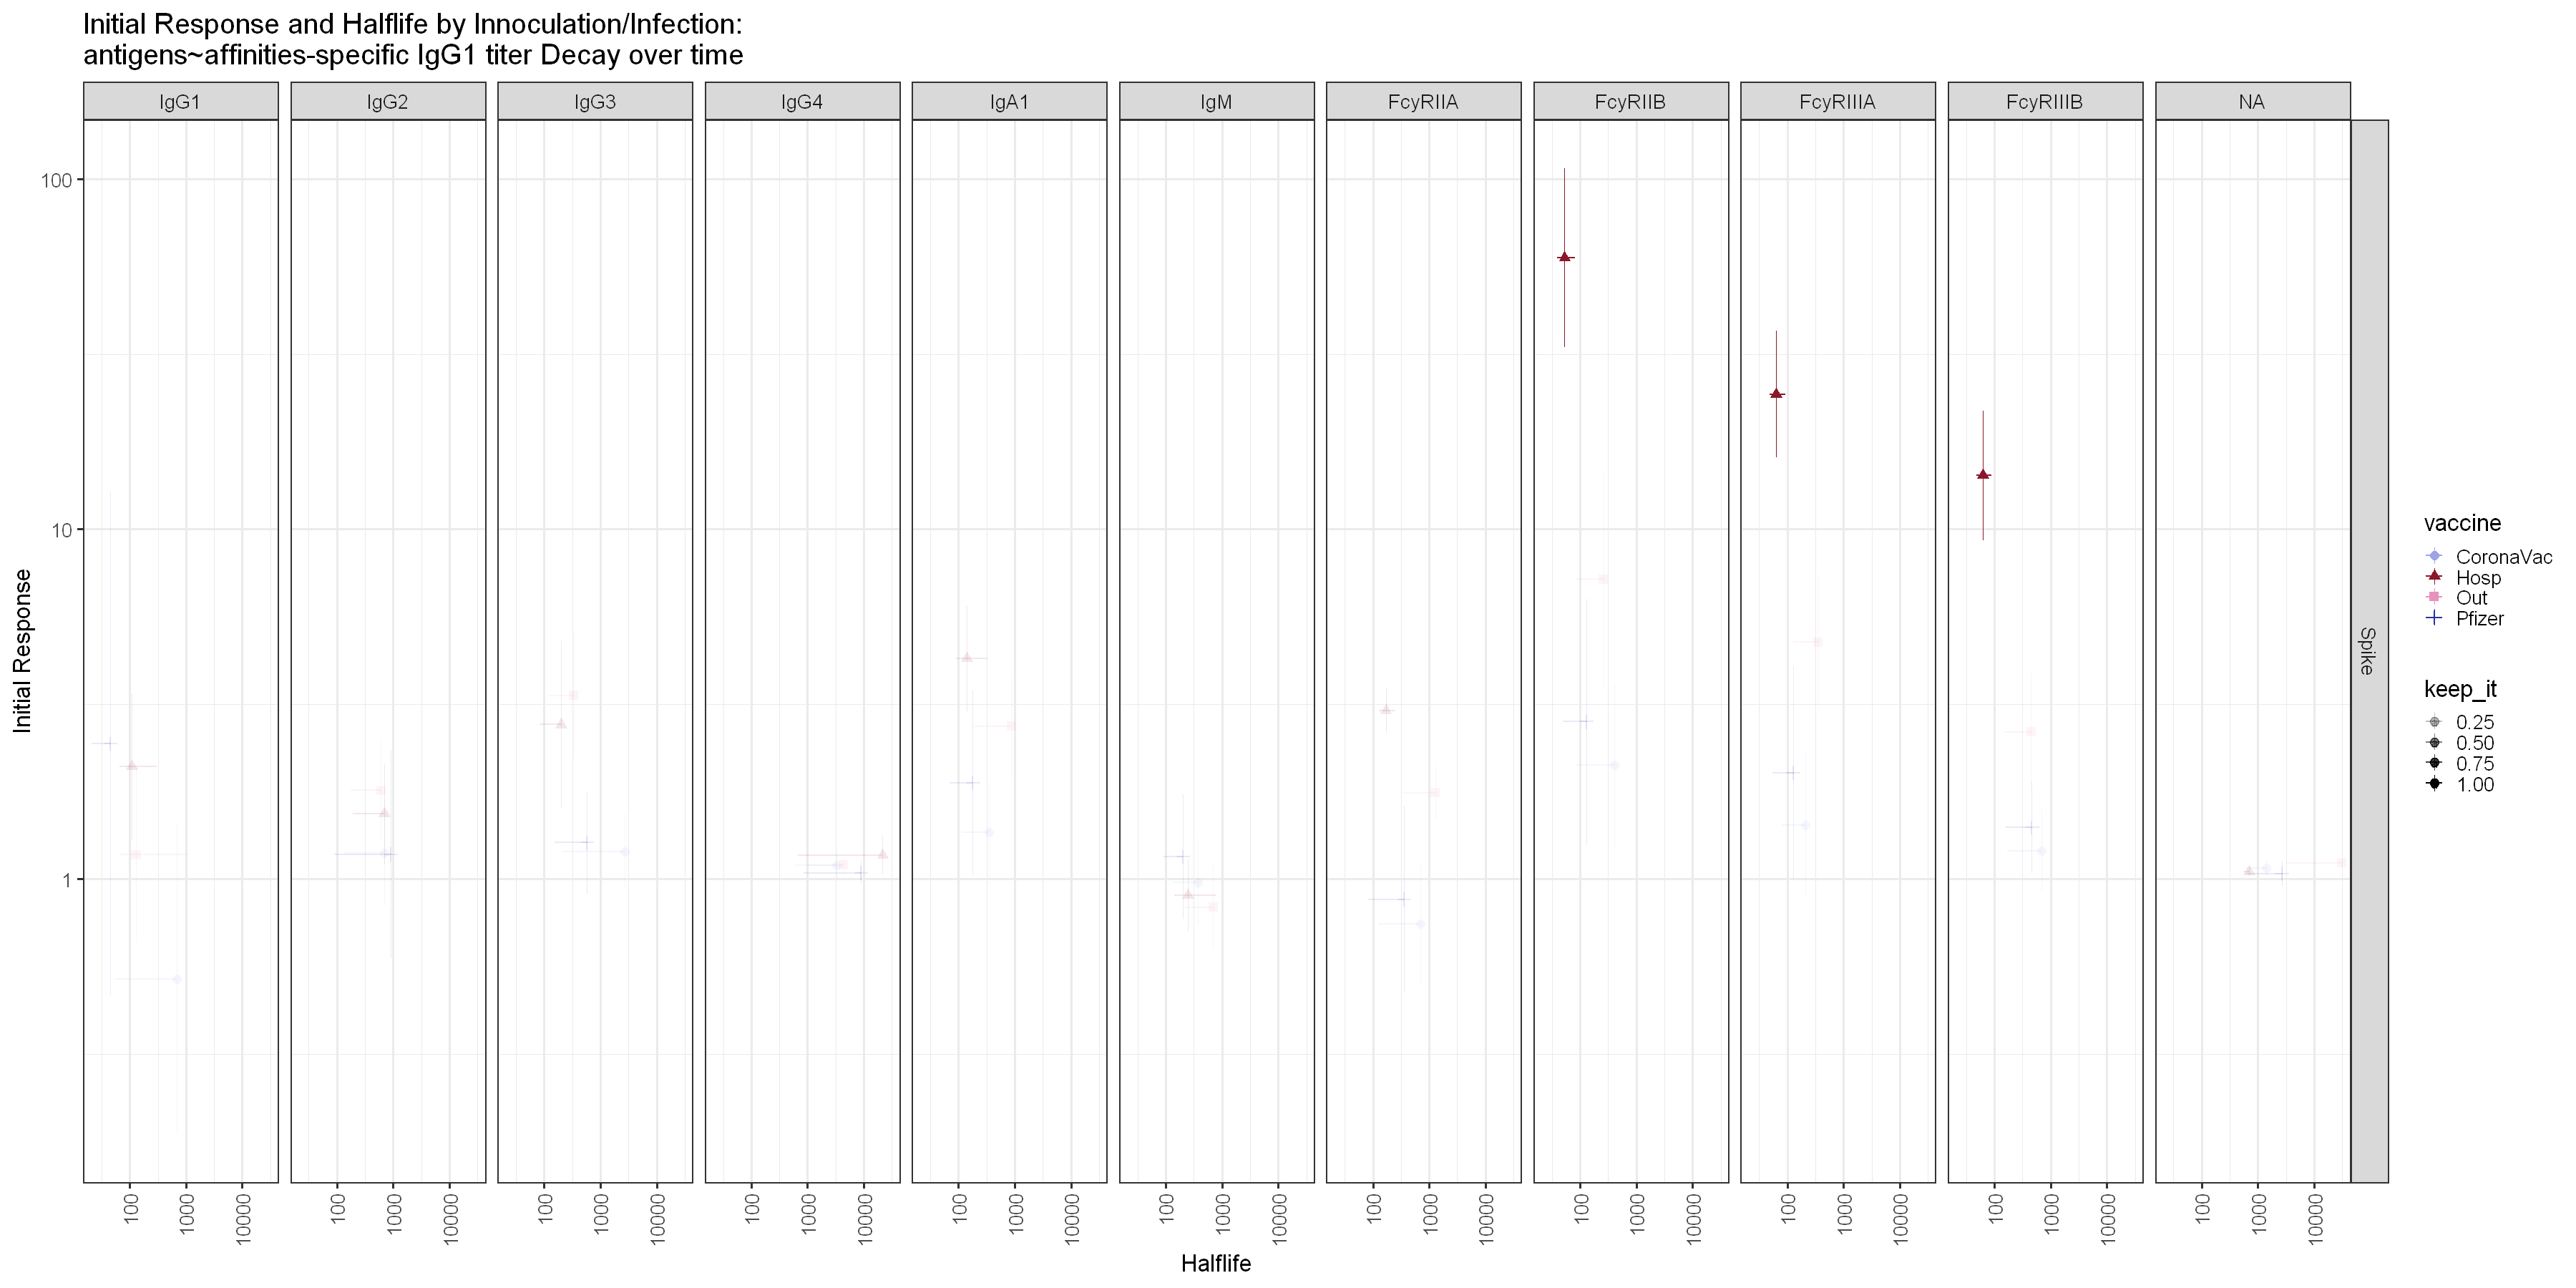

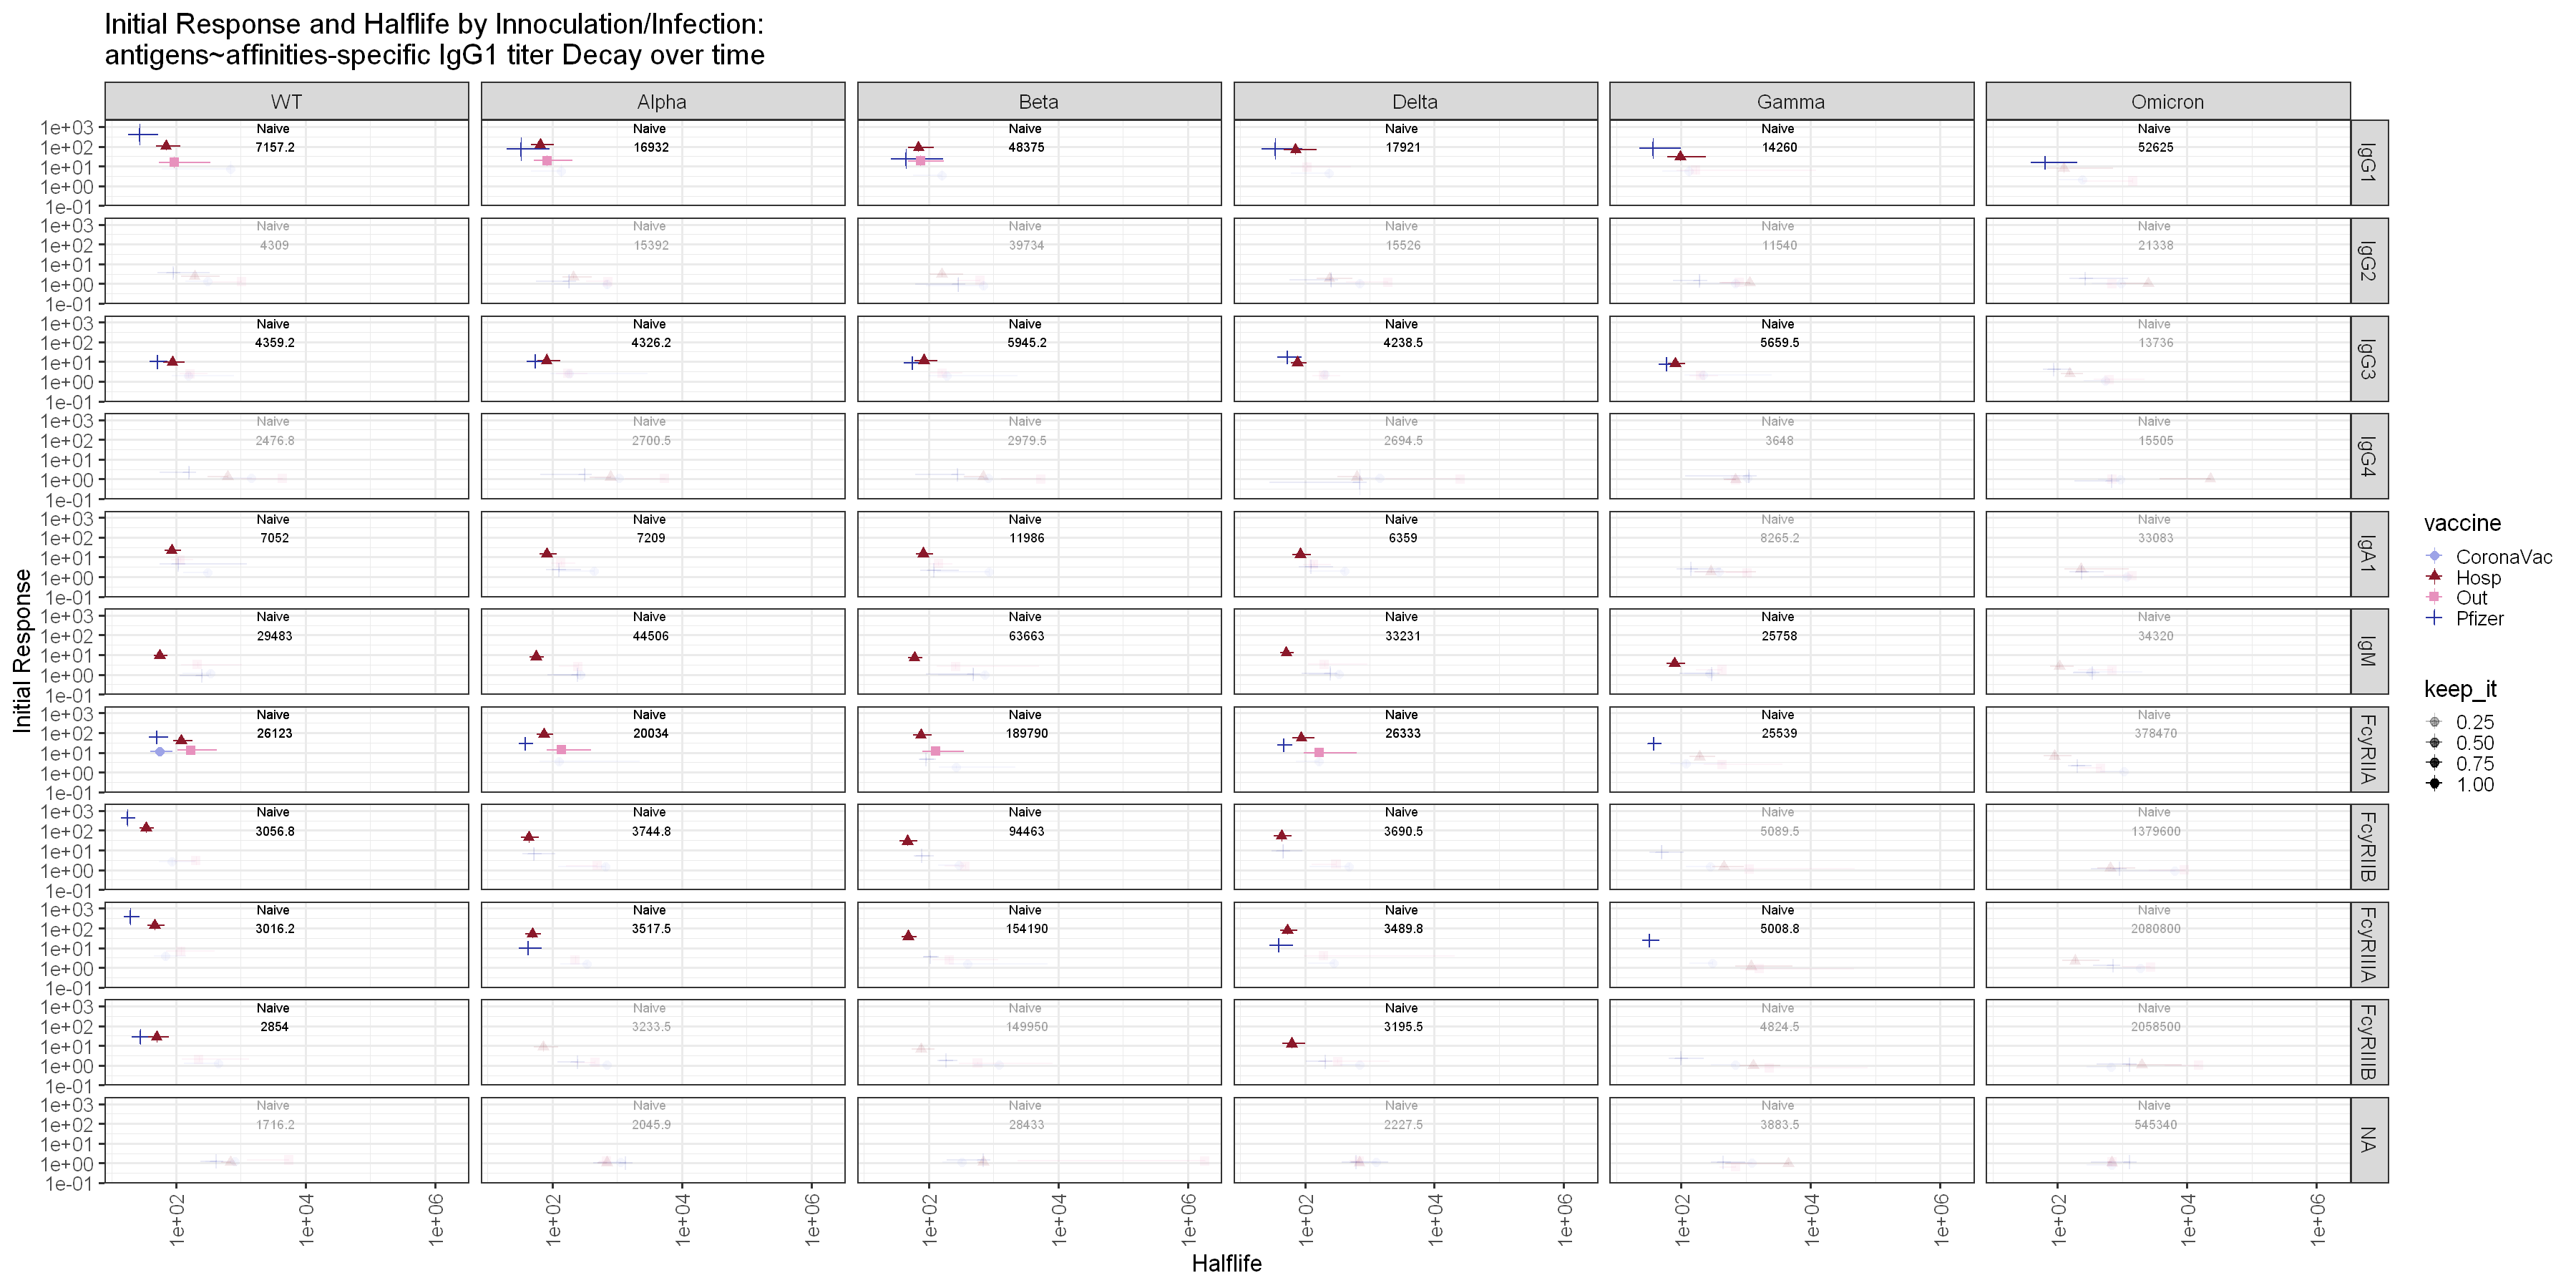

In [43]:
options(repr.plot.width=30,repr.plot.height=15)

z=.975

data_decay_small = data_decay_small %>%
        mutate( affinity = gsub('^R','FcyR',gsub('R2','RII',gsub('R3','RIII',gsub('a$|av$','A',gsub('b$','B',gsub('BL$','',affinity))))))) %>%
        mutate(
            affinity = factor(affinity,levels=c('IgG1','IgG2','IgG3','IgG4','IgA1','IgM','FcyRIIA','FcyRIIB','FcyRIIIA','FcyRIIIB','ADCD','ADCP','ADNP')),
            # affinity = factor(affinity,levels=c('IgG1','IgG3','IgA1','IgM','R2a','R2b','R3av','R3b')), #,'C1q','ADCD','ADCPBL2','ADCPBL3','ADNP')),
            virus = factor(as.character(virus) , levels=c('WT' ,'Alpha','Beta','Delta','Gamma','Omicron','HKU1','OC43'))
        )

    # mutate(
    #     affinity = factor(affinity,levels=c('IgM','IgG1','IgG2','IgG3','IgG4','IgA1','R2a','R2b','R3av','R3b','C1q','ADCD','ADCPBL2','ADCPBL3','ADNP')),
    #     virus = factor(as.character(virus) , levels=c('WT' ,'Alpha','Beta','Delta','Gamma','Omicron','HKU1','OC43'))

    # )

data_decay_params = data_decay_small %>%
    group_by(affinity) %>%
        mutate( # FDR adjust hl & I significance by affinity and by virus
            Q_t_hl = p.adjust(Pr_t_hl,'fdr'),
            Q_t_I  = p.adjust(Pr_t_I ,'fdr')
        ) %>%
        mutate(
            keep_it = ifelse(
                # Q_t_hl<.1|Q_t_I<.1 & # significant halflife 
                (
                    
                    # (exp(I)> 8 & Q_t_I<.1 & !grepl('^A',affinity)) |
                    # (exp(I)> 3 & Q_t_I<.1 & !grepl('WT',virus)) |
                    # (exp(I)> 2 & Q_t_I<.1 &  (grepl('^A',affinity) ))

                    # (((I)> (naive_50_raw+(naive_se*1.96))/naive_50_raw) ) #&  !grepl('^A',affinity)) |
                    # (((I)> (naive_50_raw+(naive_se*1.96))/naive_50_raw) &  (grepl('^A',affinity) | grepl('^Omicron',virus))
                    
                    (exp(I)> (max(3,((naive_50_raw+(naive_se*1.96))/naive_50_raw))) & !grepl('^A',affinity)) |
                    (exp(I)> (max(2,((naive_50_raw+(naive_se*1.96))/naive_50_raw))) &  (grepl('^A',affinity)   )) # | grepl('^Omicron',virus)))
                    
                ) ,  # initial response FC > 8
                # (exp(I)>8 ) &  # initial response FC > 8
                # exp(I)>((naive_50_raw+(naive_se*3))/naive_50_raw), # initial response FC > x standard dev of naive median
                    1,.1)
        ) %>% 
        select(I,hl,vaccine,keep_it,naive_50_raw,hl_se,Q_t_hl,Q_t_I,I_se,antigen,affinity,virus,naive_50_raw,naive_se) %>% unique()

data_decay_params$hl[data_decay_params$hl>=0]=-(1e-3) # add pseudocount for non-significant slopes

table(data_decay_params$keep_it)

options(repr.plot.width=30,repr.plot.height=15)


for(vir in unique(data_decay_params$virus)){
    gi=data_decay_params %>% filter(virus==vir & !is.na(affinity)) %>% select(I,hl,vaccine,keep_it,naive_50_raw,hl_se,I_se,Q_t_hl,affinity,antigen) %>% unique() %>%
        ggplot(aes(y=exp(I),x=-log(2)/hl,color=vaccine,shape=vaccine,alpha=keep_it  ))+
            geom_text(aes(label=paste('Naive\n',signif(naive_50_raw,5))),x=3.5,y=2.5,color='black')+
            geom_errorbarh(aes(xmin=-log(2)/(hl-qnorm(z)*hl_se),xmax=-log(2)/(hl+qnorm(z)*ifelse(Q_t_hl<0.1,hl_se,0))),size=.75)+
            geom_pointrange(aes(ymin=exp(I-qnorm(z)*I_se),ymax=exp(I+qnorm(z)*I_se)),size=.75)+
            scale_y_log10()+scale_x_log10()+scale_color_manual(values = col)+
            theme_bw(base_size = 20)+xlab('Halflife')+ylab('Initial Response')+
            theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
            ggtitle(paste0('Initial Response and Halflife by Innoculation/Infection:\n','antigens~affinities','-specific IgG1 titer Decay over time')) +
            facet_grid(affinity~antigen)
    h=7;w=18
    if(vir=='WT'){h=20}
    ggsave(gi,filename=paste0('../results/04_decay_param/exponential_full_range.',vir,'.pdf'),width=w,height=h)
    if(vir=='WT'){ ggsave(gi,filename = paste0('../results/figS1c.pdf'),  height=hgt,width=wdt,limitsize=F) }

}

gi


####

for(vir in unique(data_decay_params$virus)){
gi=data_decay_params %>% filter(virus==vir & antigen%in%c('Spike','RBD')) %>% 
    select(I,hl,vaccine,keep_it,naive_50_raw,hl_se,I_se,Q_t_hl,affinity,antigen) %>% unique() %>%
    ggplot(aes(y=exp(I),x=-log(2)/hl,color=vaccine,shape=vaccine,alpha=keep_it  ))+
            geom_text(aes(label=paste('Naive\n',signif(naive_50_raw,5))),x=3.5,y=2.5,color='black')+
            geom_errorbarh(aes(xmin=-log(2)/(hl-qnorm(z)*hl_se),xmax=-log(2)/(hl+qnorm(z)*ifelse(Q_t_hl<0.1,hl_se,0))),size=.75)+
            geom_pointrange(aes(ymin=exp(I-qnorm(z)*I_se),ymax=exp(I+qnorm(z)*I_se)),size=.75)+
            scale_y_log10()+scale_x_log10()+scale_color_manual(values = col)+
            theme_bw(base_size = 20)+xlab('Halflife')+ylab('Initial Response')+
        theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
            ggtitle(paste0('Initial Response and Halflife by Innoculation/Infection:\n','antigens~affinities','-specific IgG1 titer Decay over time')) +
            facet_grid(antigen~affinity)
    h=7;w=18
    # if(vir=='WT'){h=20}
        ggsave(gi,filename=paste0('../results/04_decay_param/exponential_full_range.',vir,'.spike.rbd.pdf'),width=w,height=h)
}

gi


####

for(anti in c('Spike','RBD')){
gi=data_decay_params %>% filter(antigen==anti) %>% select(I,hl,vaccine,keep_it,naive_50_raw,hl_se,I_se,Q_t_hl,affinity,antigen,virus) %>% unique() %>%
    ggplot(aes(y=exp(I),x=-log(2)/hl,color=vaccine,shape=vaccine,alpha=keep_it  ))+
            geom_text(aes(label=paste('Naive\n',signif(naive_50_raw,5))),x=3.5,y=2.5,color='black')+
            geom_errorbarh(aes(xmin=-log(2)/(hl-qnorm(z)*hl_se),xmax=-log(2)/(hl+qnorm(z)*ifelse(Q_t_hl<0.1,hl_se,0))),size=.75)+
            geom_pointrange(aes(ymin=exp(I-qnorm(z)*I_se),ymax=exp(I+qnorm(z)*I_se)),size=.75)+
            scale_y_log10()+scale_x_log10()+scale_color_manual(values = col)+
            theme_bw(base_size = 20)+xlab('Halflife')+ylab('Initial Response')+
            theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
            ggtitle(paste0('Initial Response and Halflife by Innoculation/Infection:\n','antigens~affinities','-specific IgG1 titer Decay over time')) +
            facet_grid(affinity~virus)
    w=15;h=20
    if(vir=='WT'){w=30}
        ggsave(gi,filename=paste0('../results/04_decay_param/exponential_full_range.',anti,'.pdf'),width=w,height=h)
            if(anti=='Spike'){ ggsave(gi,filename = paste0('../results/figS2c.pdf'),  height=hgt,width=wdt,limitsize=F) }
            if(anti=='RBD'){ ggsave(gi,filename = paste0('../results/figS3c.pdf'),  height=hgt,width=wdt,limitsize=F) }

}

gi
       

# options(repr.plot.width=30,repr.plot.height=10)

# data_decay_params %>% filter(virus=='Omicron') %>%
#     ggplot(aes(y=exp(I),x=-log(2)/hl,color=vaccine,shape=vaccine,alpha=keep_it  ))+
#             geom_text(aes(label=paste('Naive\n',signif(naive_50_raw,5))),x=3.5,y=1,color='black')+
#             geom_errorbarh(aes(xmin=-log(2)/(hl-qnorm(z)*hl_se),xmax=-log(2)/(hl+qnorm(z)*ifelse(Q_t_hl<0.1,hl_se,0))),size=.75)+
#             geom_pointrange(aes(ymin=exp(I-qnorm(z)*I_se),ymax=exp(I+qnorm(z)*I_se)),size=.75)+
#             scale_y_log10()+scale_x_log10()+scale_color_manual(values = col)+
#             theme_bw(base_size = 20)+xlab('Halflife')+ylab('Initial Response')+
#             ggtitle(paste0('Initial Response and Halflife by Innoculation/Infection:\n','antigens~affinities','-specific IgG1 titer Decay over time')) +
#             facet_grid(antigen~affinity)

In [41]:
(data_decay_params) %>% arrange(affinity)

I           hl            vaccine   keep_it naive_50_raw hl_se       
1    1.7665975  -0.005124460  CoronaVac 0.1      16932.250   0.004958669 
2    1.2151515  -0.004364427  CoronaVac 0.1      48374.625   0.003942923 
3    1.4961719  -0.002982534  CoronaVac 0.1      17920.750   0.004299238 
4    1.7329004  -0.005270520  CoronaVac 0.1      14260.000   0.004227545 
5    0.6947626  -0.002887857  CoronaVac 0.1      52625.000   0.001891257 
6    1.9766012  -0.001000000  CoronaVac 0.1       7157.250   0.005343273 
7    2.5153552  -0.007906247  CoronaVac 1.0       6346.000   0.005118650 
8    2.2126459  -0.006356203  CoronaVac 0.1       9324.500   0.004896325 
9    1.9180444  -0.008946950  CoronaVac 0.1       5679.250   0.004810788 
10   2.1032349  -0.008139788  CoronaVac 0.1      11171.750   0.003198550 
11  -0.1660406  -0.001000000  CoronaVac 0.1      77538.375   0.005084367 
12  -0.6592397  -0.001000000  CoronaVac 0.1     373980.250   0.005925073 
13   1.0524990  -0.005289098  CoronaVac 0.1       7913.000   0.002540437 
14   2.6661942  -0.007933154  CoronaVac 1.0       3361.000   0.005403741 
15   1.4736690  -0.006109490  CoronaVac 0.1       8898.625   0.004064648 
16   0.6979514  -0.003339212  CoronaVac 0.1       4381.500   0.002453983 
17   3.4246444  -0.013516955  CoronaVac 1.0       3941.000   0.005472798 
18   2.7401285  -0.003299735  CoronaVac 1.0       7104.875   0.006531325 
19   4.2915821  -0.021278194  Pfizer    1.0      16932.250   0.007006173 
20   3.1719000  -0.015338644  Pfizer    1.0      48374.625   0.005706459 
21   4.3097990  -0.019999668  Pfizer    1.0      17920.750   0.006308386 
22   4.3653639  -0.018684427  Pfizer    1.0      14260.000   0.005975117 
23   2.7554464  -0.010620681  Pfizer    1.0      52625.000   0.003687096 
24   5.9825179  -0.025547845  Pfizer    1.0       7157.250   0.006291873 
25   5.8564113  -0.020295817  Pfizer    1.0       6346.000   0.005463315 
26   5.7765506  -0.021846003  Pfizer    1.0       9324.500   0.005773247 
27   5.8297651  -0.026265555  Pfizer    1.0       5679.250   0.006168436 
28   4.9925587  -0.019375689  Pfizer    1.0      11171.750   0.004840220 
29   0.8346795  -0.009972095  Pfizer    0.1      77538.375   0.008463085 
30   0.8909853  -0.015377183  Pfizer    0.1     373980.250   0.008731112 
... ...         ...           ...       ...     ...          ...         
783 -0.43017246 -7.282337e-04 Hosp      0.1       2569.250   7.295283e-04
784  0.05450530 -1.000000e-03 Hosp      0.1       2395.000   1.269811e-04
785  0.98291482 -1.512016e-03 Hosp      0.1       2203.524   9.934985e-04
786  1.46158403 -9.002869e-05 Hosp      0.1       1589.645   6.499681e-04
787  4.29688975 -1.361952e-02 Hosp      0.1          1.000   2.426843e-03
788  0.01122236 -4.554313e-04 Hosp      0.1       5976.250   6.045134e-04
789  0.03886774 -1.000000e-03 Hosp      0.1       2667.500   1.054487e-04
790  0.03485339 -1.000000e-03 Hosp      0.1       2587.125   1.070303e-04
791  0.11576069 -9.637620e-05 Hosp      0.1       1782.500   2.306881e-04
792  0.21840371 -1.000000e-03 Out       0.1       2045.875   1.706032e-04
793  0.25137291 -3.736065e-07 Out       0.1      28432.750   1.479602e-04
794  0.26287604 -1.000000e-03 Out       0.1       2227.500   2.170927e-04
795 -0.43354020 -1.000000e-03 Out       0.1       3883.500   4.004988e-04
796  0.11892012 -1.000000e-03 Out       0.1     545335.250   6.848099e-05
797  0.36340391 -1.259592e-04 Out       0.1       1716.250   2.173568e-04
798  0.20296880 -1.141459e-04 Out       0.1       2421.750   1.318035e-04
799 -0.18889000 -1.000000e-03 Out       0.1       3071.750   1.167278e-03
800  0.14417098 -2.818502e-05 Out       0.1       1862.125   1.212528e-04
801  0.08036912 -1.128355e-06 Out       0.1     700345.250   1.494672e-04
802  0.11914817 -1.000000e-03 Out       0.1       3485.625   1.054365e-04
803  0.10493519 -2.272533e-05 Out       0.1       2823.500   9.814560e-05
804 -1.05175997 -1.000000e-03 Out       0.1       2569.250   1.178603e-03
805  0.0

## Fig1

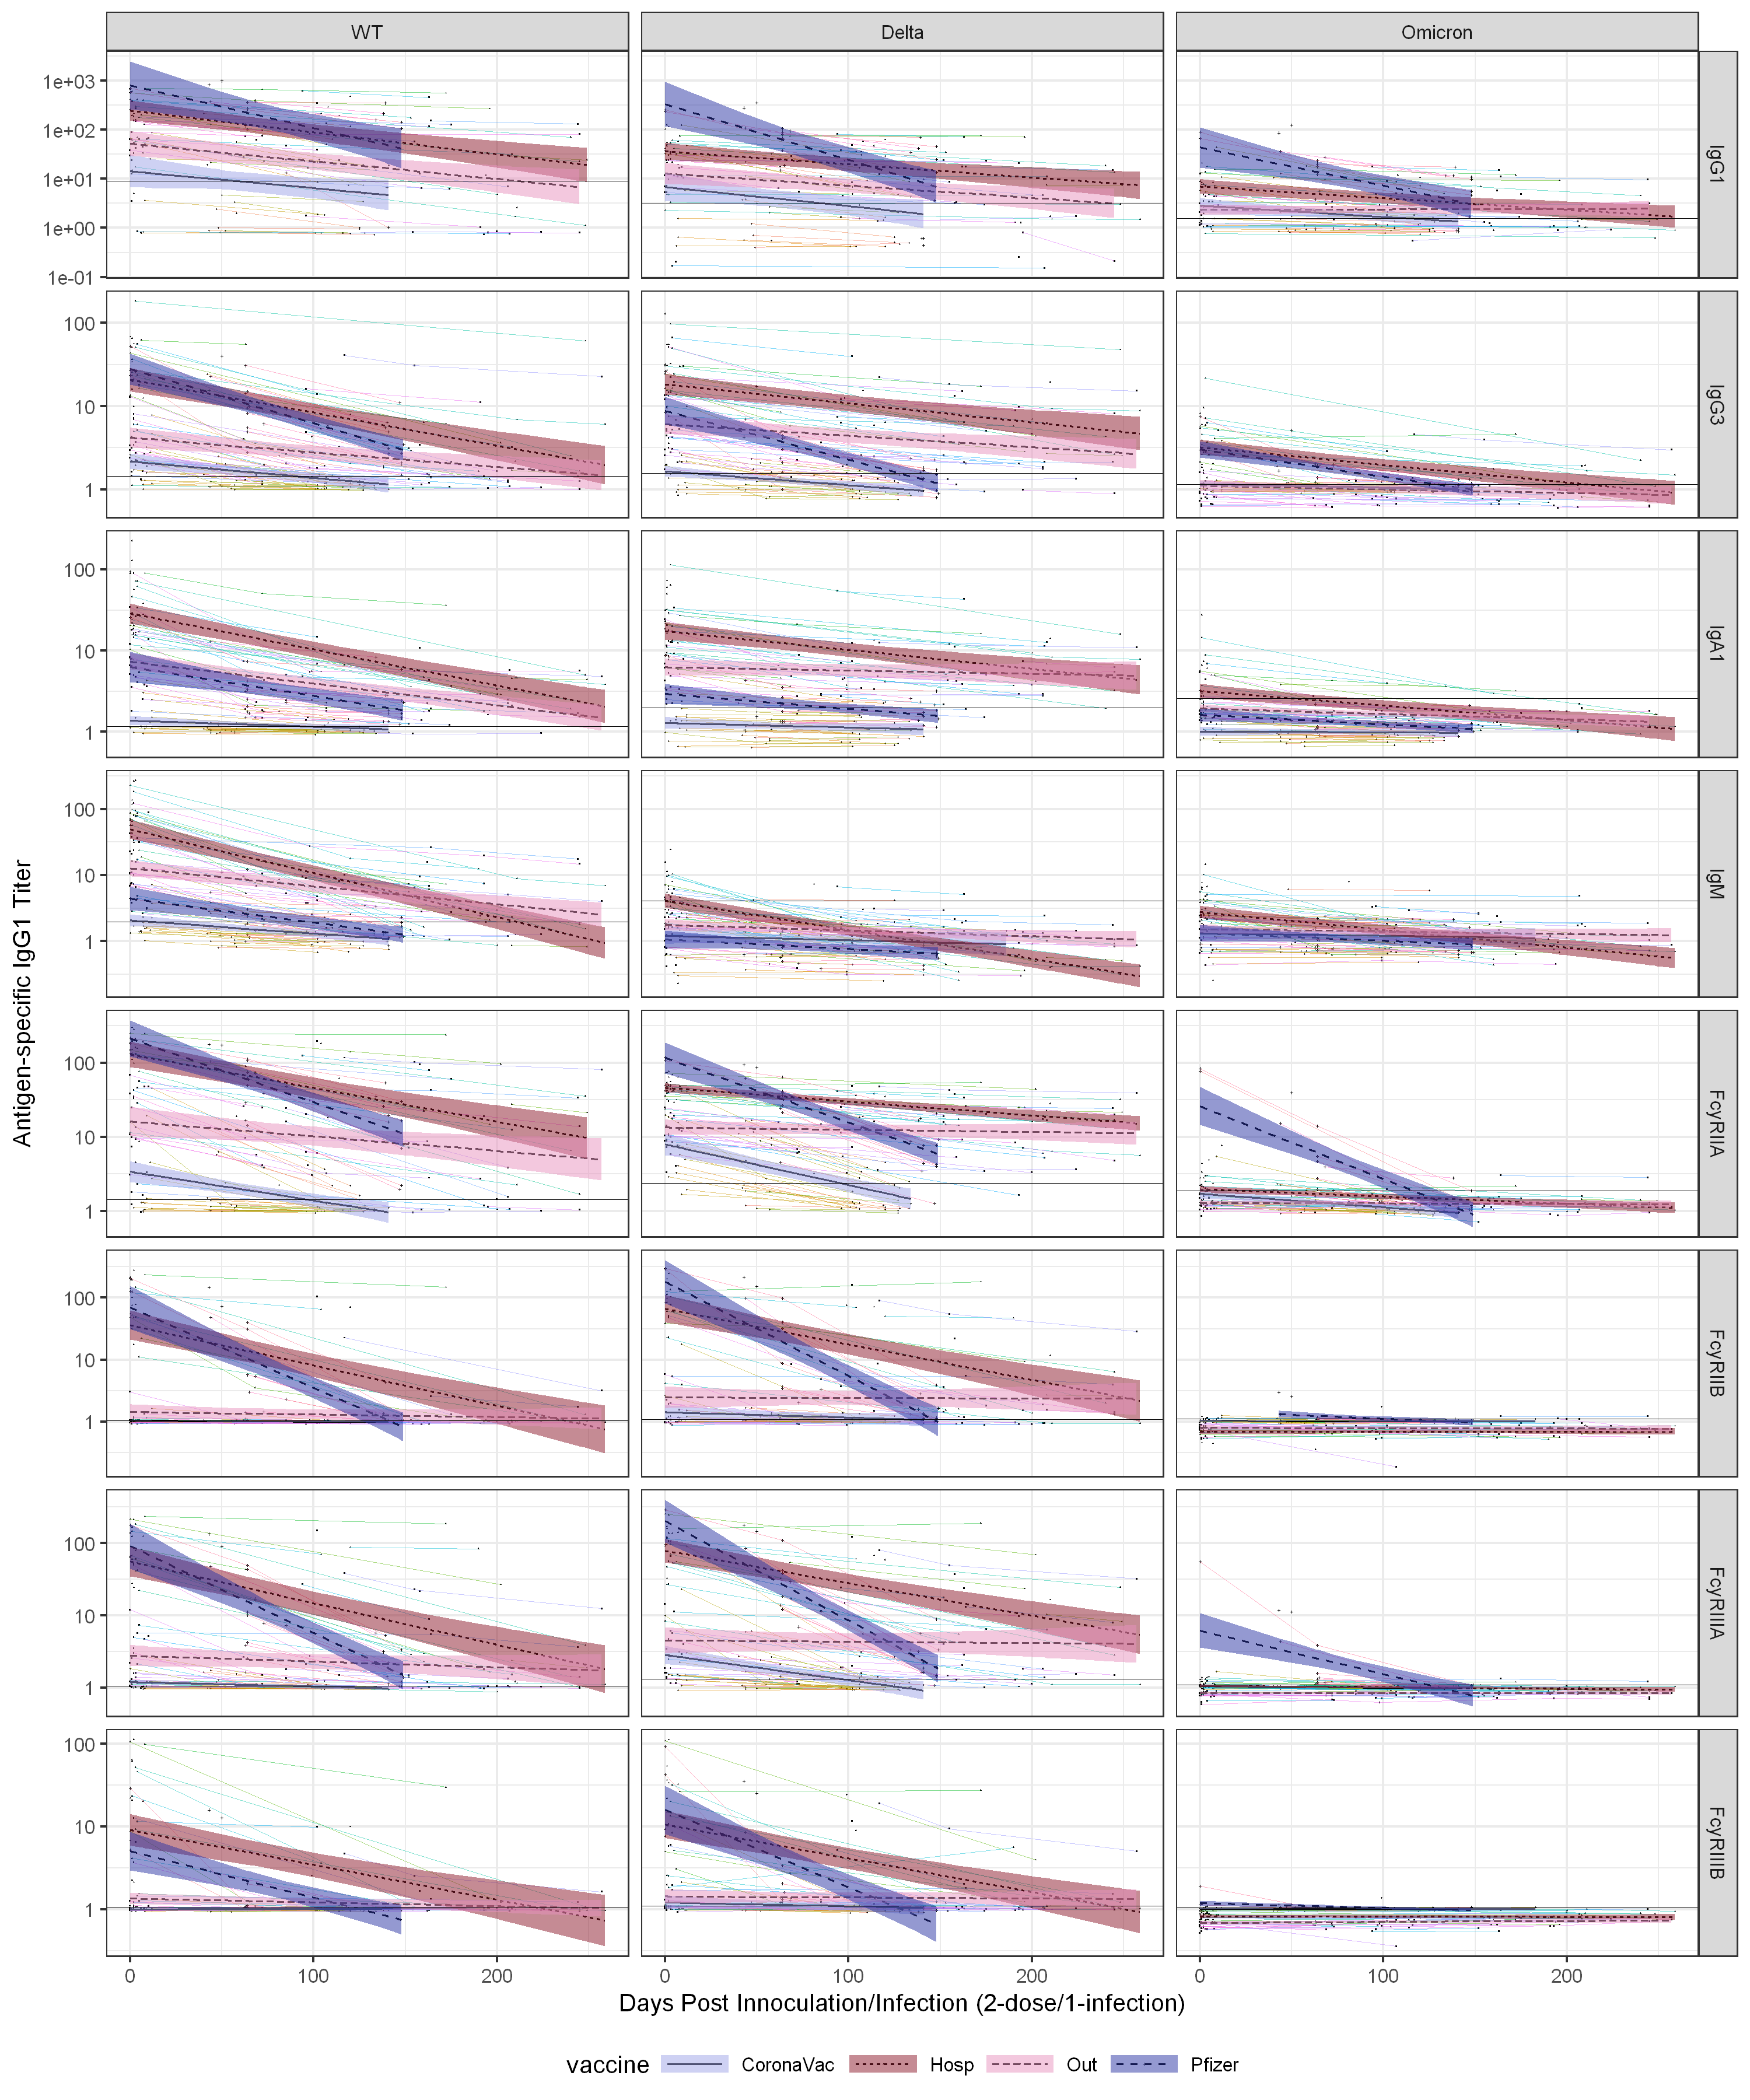

In [31]:
options(repr.plot.width=25,repr.plot.height=30)

options(warn=-1)

data_i = data_decay_orig %>%
        mutate( affinity = gsub('^R','FcyR',gsub('R2','RII',gsub('R3','RIII',gsub('a$|av$','A',gsub('b$','B',affinity)))))) %>%
        mutate(
            affinity = factor(affinity,levels=c('IgG1','IgG3','IgA1','IgM','FcyRIIA','FcyRIIB','FcyRIIIA','FcyRIIIB')), #,'C1q','ADCD','ADCPBL2','ADCPBL3','ADNP')),
            # affinity = factor(affinity,levels=c('IgG1','IgG3','IgA1','IgM','R2a','R2b','R3av','R3b')), #,'C1q','ADCD','ADCPBL2','ADCPBL3','ADNP')),
            virus = factor(as.character(virus) , levels=c('WT','Delta','Omicron')) # levels=c('WT' ,'Alpha','Beta','Delta','Gamma','Omicron')) #,'HKU1','OC43'))
        ) %>%
        filter(!is.na(virus) & !is.na(affinity) & antigen=='Spike' )

    # ### Drop increasing values
    # data_i = data_i[order(data_i$DPFI),] # sort by time variable

    # for(subj in unique(data_i$Lab.ID)){
    #     idx_subj = which(data_i$Lab.ID==subj)
    #     v_si = data_i$value[idx_subj] # subj-specific values
    #     t_si = data_i$DPFI[idx_subj] # subj-specific values
    #     is_inc = ifelse(t_si>90, # only mark erroneous increase after 3mo
    #                     c(FALSE,diff(v_si) > .1),
    #                     # c(diff(v_si) > .1,FALSE)
    #                     FALSE
    #                     )
    #     is_inc[1]=FALSE
    #     is_inc[is.na(is_inc)]=FALSE
    #     data_i$value[idx_subj[is_inc]] = NA
    # }


fig1=ggplot(data_i,aes(x=DPFI,y=value,fill=vaccine,shape=vaccine))+
        geom_point(color='black',size=.5)+
        geom_line(aes(group=strat,color=strat),alpha=.5)+ # patient-specific lines
        theme_bw(base_size = 25)+
        geom_line(aes(y=fit,lty=vaccine),size=1,color='black')+         # trend lines
        geom_ribbon(aes(ymin=fit.lw,ymax=fit.hi,y=fit,fill=vaccine),alpha=.5) +
        theme(legend.key.width  = unit(2.5,"cm"),legend.position = 'bottom')+
        guides(color = 'none')+
        geom_hline(aes(yintercept=naive_97.5))+
        scale_fill_manual(values = col)+
        ylab('Antigen-specific IgG1 Titer')+xlab('Days Post Innoculation/Infection (2-dose/1-infection)')+
        facet_grid(affinity~virus,scale='free')

fig1 = fig1 + scale_y_log10()

    hgt=30; wdt=20

# ggsave(fig1,filename = paste0('../results/04_scatter/exponential_full_range.Spike.pdf'),  height=hgt,width=wdt,limitsize=F)

options(warn=0)
fig1

Warning message:
"Removed 12 rows containing missing values or values outside the scale range (`geom_point()`)."
Warning message:
"Removed 12 rows containing missing values or values outside the scale range (`geom_text_repel()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_path()`)."
Warning message:
"ggrepel: 8 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 10 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 10 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 10 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 10 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 3 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"g

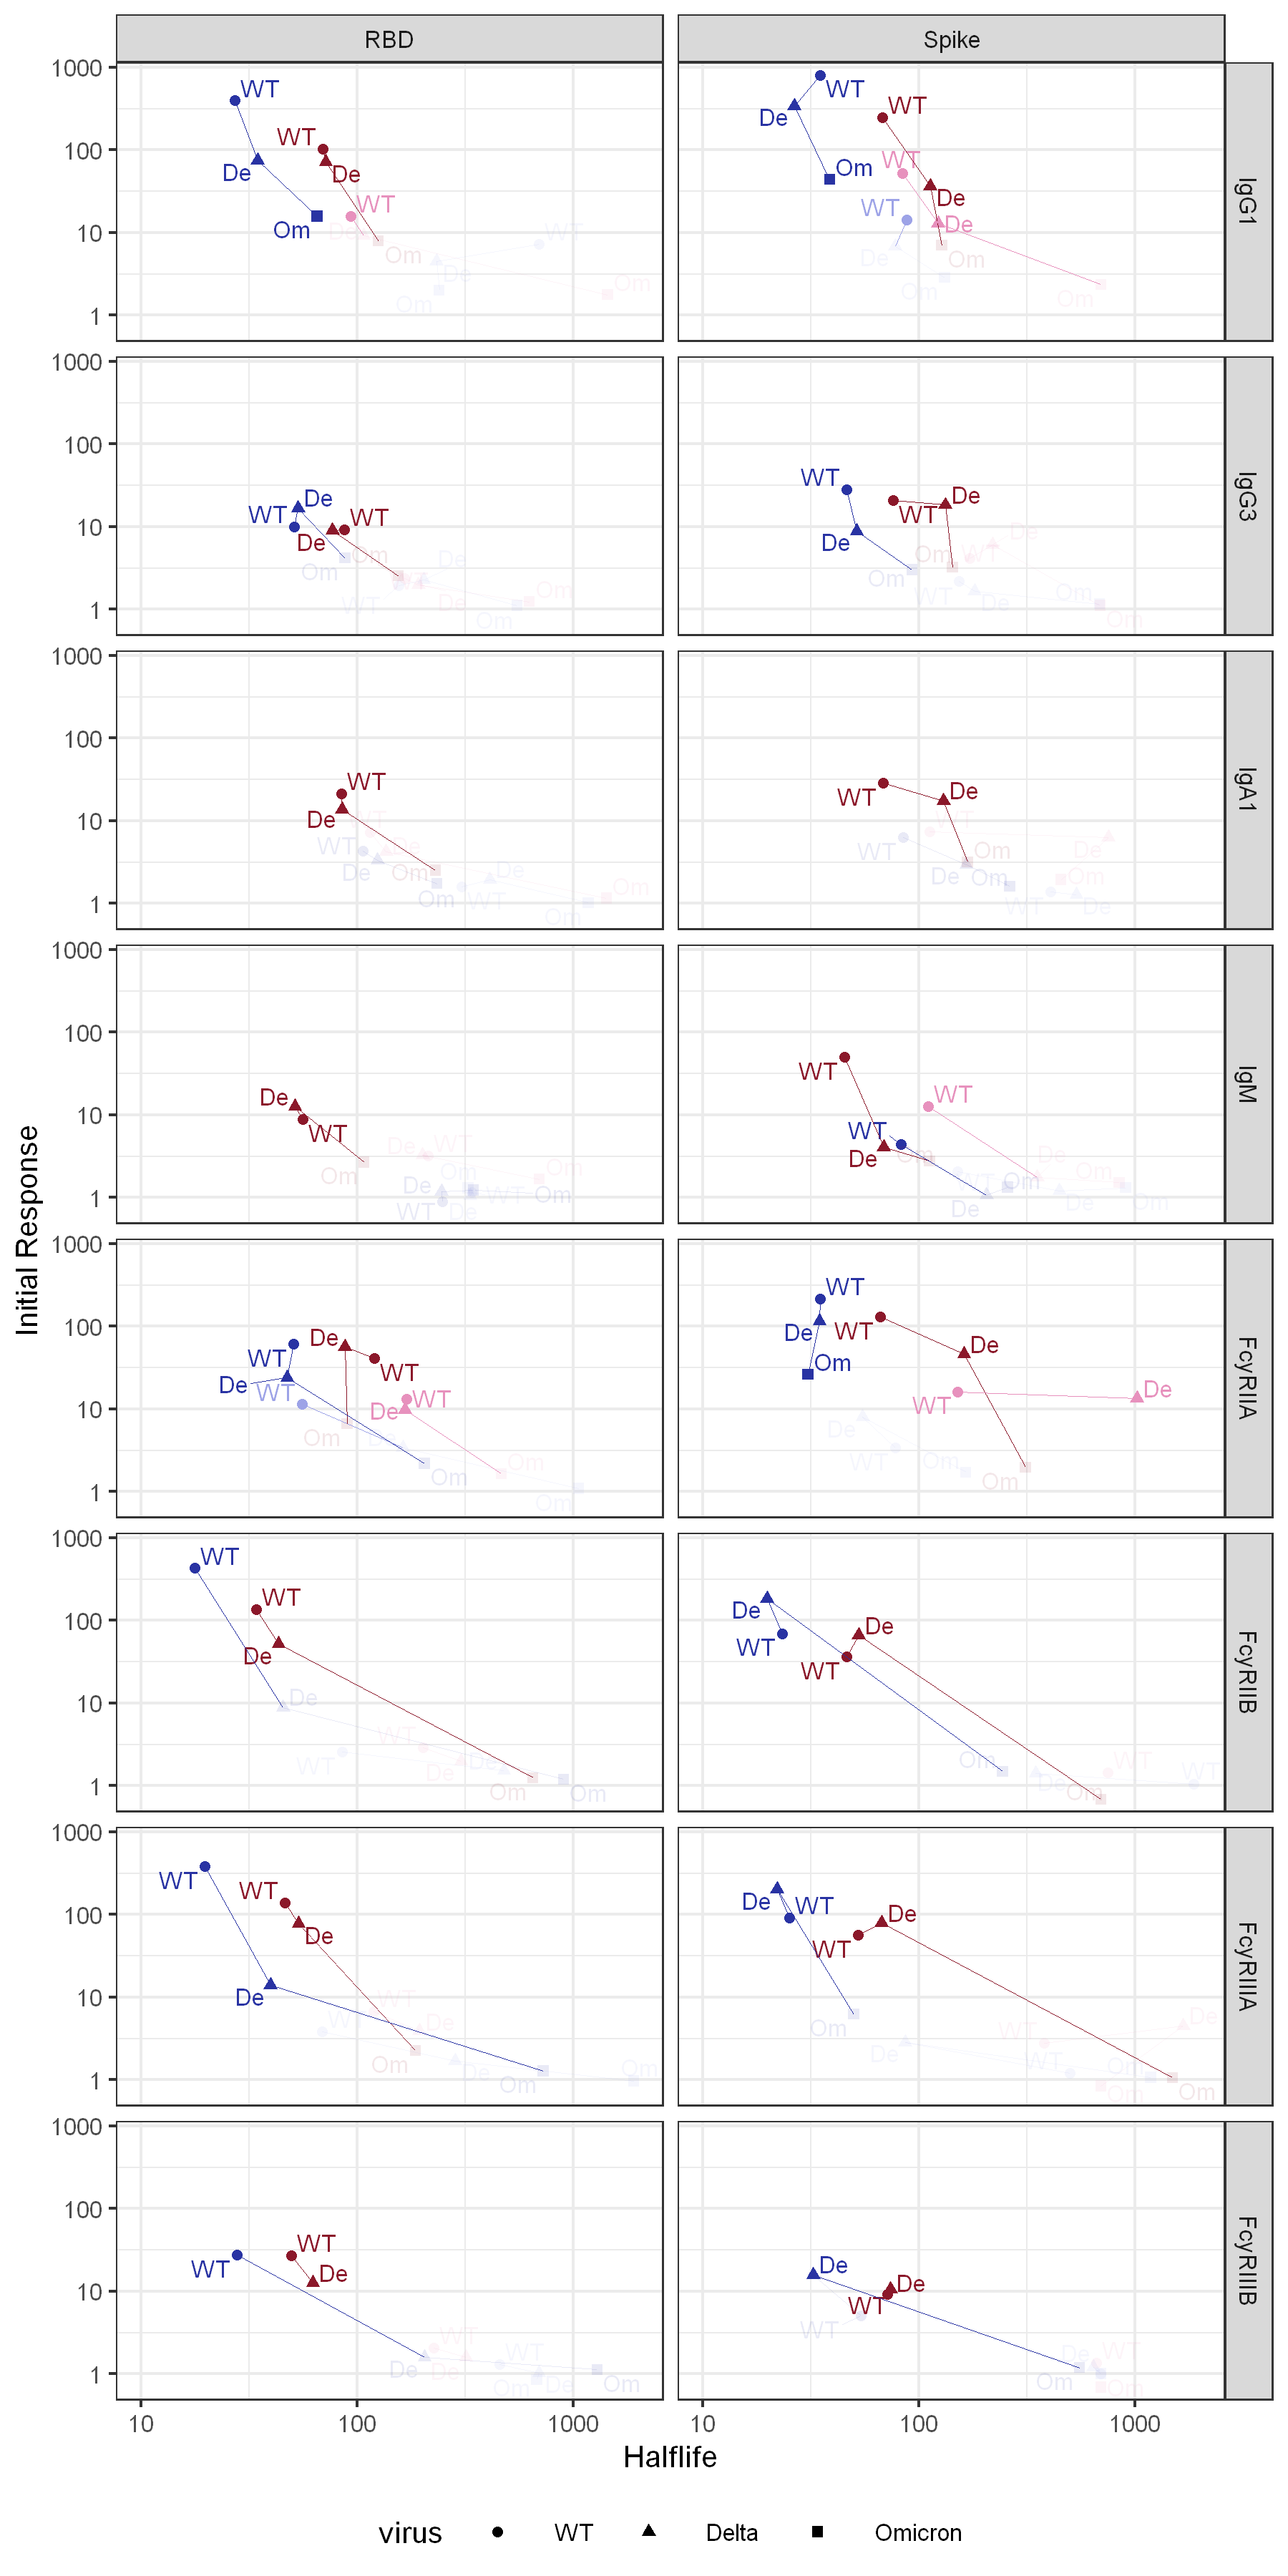

In [32]:
options(repr.plot.width=15,repr.plot.height=30)

fig1b=data_decay_params %>% 
        mutate( affinity = gsub('^R','FcyR',gsub('R2','RII',gsub('R3','RIII',gsub('a$|av$','A',gsub('b$','B',affinity)))))) %>%
        mutate(
            affinity = factor(affinity,levels=c('IgG1','IgG3','IgA1','IgM','FcyRIIA','FcyRIIB','FcyRIIIA','FcyRIIIB')), #,'C1q','ADCD','ADCPBL2','ADCPBL3','ADNP')),
            virus = factor(as.character(virus) , levels=c('WT','Delta','Omicron')) # levels=c('WT' ,'Alpha','Beta','Delta','Gamma','Omicron')) #,'HKU1','OC43'))
        ) %>%
        filter(!is.na(virus) & !is.na(affinity) & antigen%in%c('Spike','RBD')) %>%
        arrange( virus) %>%
        # filter(antigen%in%c('Spike','RBD')) %>% 
        # filter(!affinity%in%c('C1q','ADCD','ADCPBL2','ADCPBL3','ADNP') & !is.na(affinity) &
               # virus%in%c('WT' ,'Alpha','Beta','Delta','Gamma','Omicron')[c(1,4,6)])%>%
        select(I,hl,vaccine,keep_it,naive_50_raw,hl_se,I_se,Q_t_hl,affinity,antigen,virus) %>% unique() %>%
    ggplot(aes(y=exp(I),x=-log(2)/hl,color=vaccine,shape=virus,alpha=keep_it  ))+
            # geom_text(aes(label=paste('Naive\n',signif(naive_50_raw,5))),x=3.5,y=2.5,color='black')+
            # geom_errorbarh(aes(xmin=-log(2)/(hl-qnorm(z)*hl_se),xmax=-log(2)/(hl+qnorm(z)*ifelse(Q_t_hl<0.1,hl_se,0))),size=.75,alpha=.5)+
            # geom_pointrange(aes(ymin=exp(I-qnorm(z)*I_se),ymax=exp(I+qnorm(z)*I_se)),size=.75,alpha=.5)+
            geom_point(size=4)+
            ggrepel::geom_text_repel(aes(label=substr(virus,1,2)),size=7)+
            scale_x_log10(lim=c(10,2000))+
            scale_y_log10()+
            scale_color_manual(values = col)+
            theme_bw(base_size = 25)+
            xlab('Halflife')+ylab('Initial Response')+
            theme(legend.key.width  = unit(2.5,"cm"),legend.position = 'bottom')+
            guides(alpha = 'none',color='none')+
            geom_path(aes(group=vaccine))+
            # ggrepel::geom_text_repel(aes(label=antigen))+
            # ggrepel::geom_text_repel(aes(label=virus))+

            # ggtitle(paste0('Initial Response and Halflife by Innoculation/Infection:\n','antigens~affinities','-specific IgG1 titer Decay over time')) +
            facet_grid(affinity~antigen)
    w=15;h=30
    # if(vir=='WT'){w=20}
        # ggsave(fig1b,filename=paste0('../results/04_decay_param/exponential_full_range.SpikeRBD_Viruscombined.pdf'),width=w,height=h)
fig1b

Warning message:
"Removed 3 rows containing missing values or values outside the scale range (`geom_point()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_path()`)."
Warning message:
"Removed 3 rows containing missing values or values outside the scale range (`geom_text_repel()`)."
Warning message:
"ggrepel: 10 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 8 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 7 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 4 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 2 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


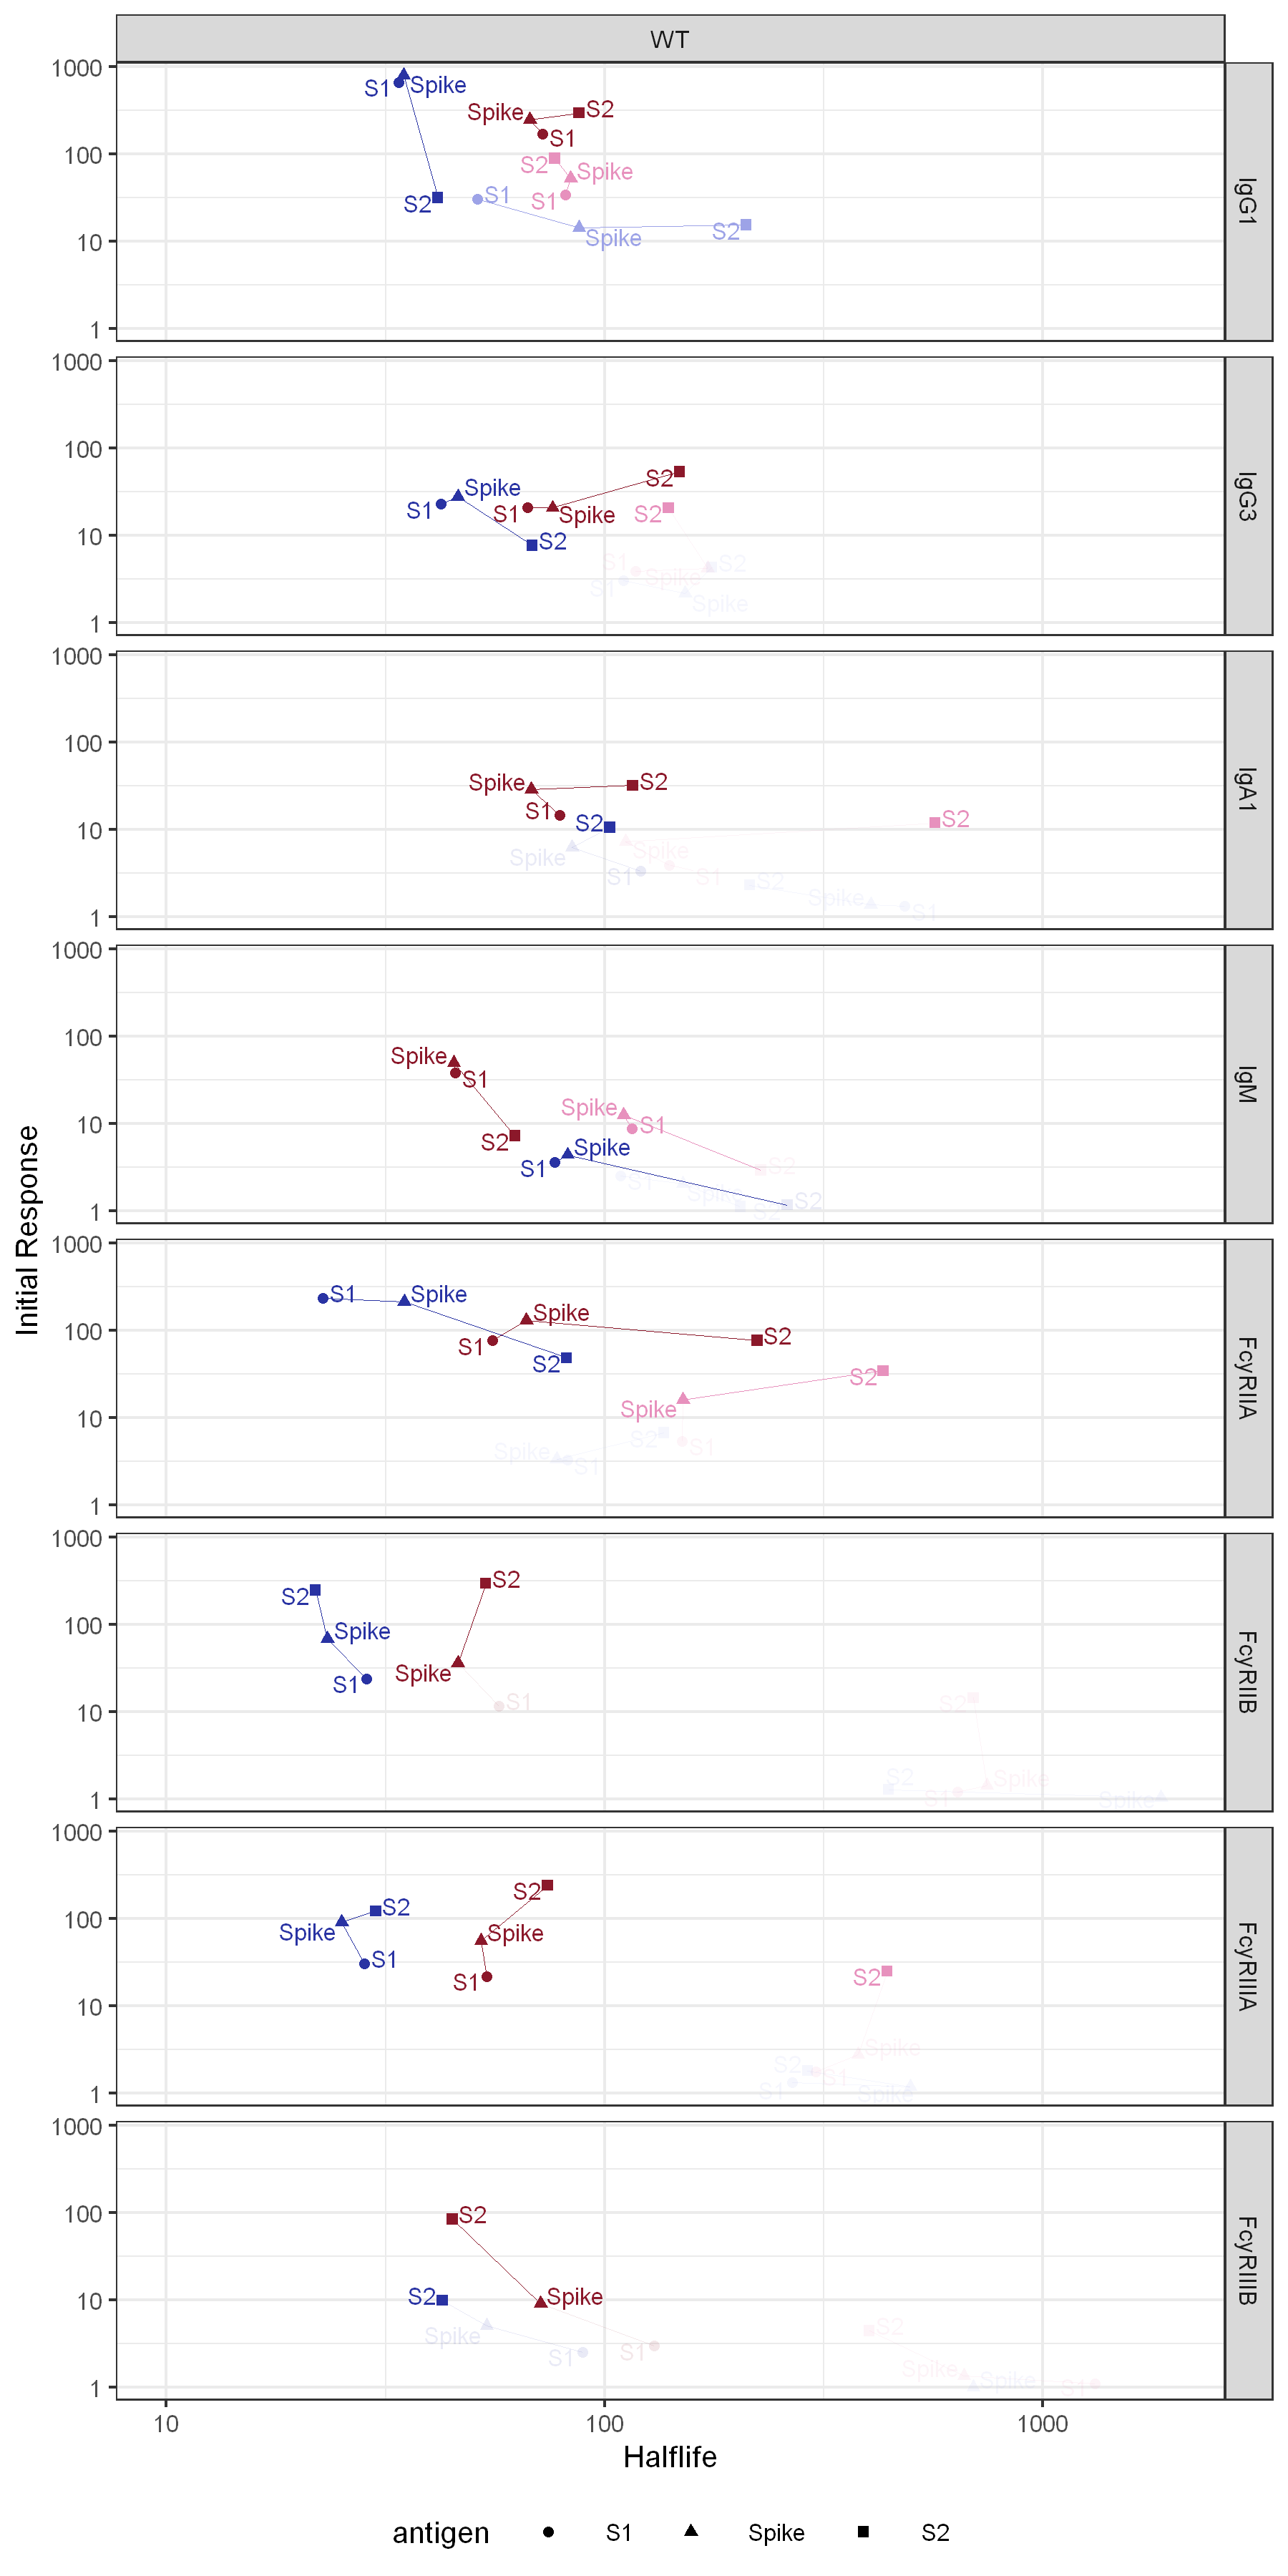

In [33]:
fig1c=data_decay_params %>% 
        mutate( 
            affinity = gsub('^R','FcyR',gsub('R2','RII',gsub('R3','RIII',gsub('a$|av$','A',gsub('b$','B',affinity))))),
        ) %>%
        mutate(
            affinity = factor(affinity,levels=c('IgG1','IgG3','IgA1','IgM','FcyRIIA','FcyRIIB','FcyRIIIA','FcyRIIIB')), #,'C1q','ADCD','ADCPBL2','ADCPBL3','ADNP')),
            antigen = factor(antigen,levels=c('S1','Spike','S2')),
            virus = factor(as.character(virus) , levels=c('WT')) # levels=c('WT' ,'Alpha','Beta','Delta','Gamma','Omicron')) #,'HKU1','OC43'))
        ) %>%
        filter(!is.na(virus) & !is.na(affinity) &  !is.na(antigen)) %>%
        arrange( antigen) %>%

        # filter(virus=='WT' & antigen%in%c('Spike','RBD','S1','S2')) %>%
        # filter(!affinity%in%c('C1q','ADCD','ADCPBL2','ADCPBL3','ADNP') & !is.na(affinity) &
               # !virus%in%c('HKU1','OC43'))%>%
        select(I,hl,vaccine,keep_it,naive_50_raw,hl_se,I_se,Q_t_hl,affinity,antigen,virus) %>% unique() %>%
    ggplot(aes(y=exp(I),x=-log(2)/hl,color=vaccine,shape=antigen,alpha=keep_it  ))+
            # geom_text(aes(label=paste('Naive\n',signif(naive_50_raw,5))),x=3.5,y=2.5,color='black')+
            # geom_errorbarh(aes(xmin=-log(2)/(hl-qnorm(z)*hl_se),xmax=-log(2)/(hl+qnorm(z)*ifelse(Q_t_hl<0.1,hl_se,0))),size=.75,alpha=.5)+
            # geom_pointrange(aes(ymin=exp(I-qnorm(z)*I_se),ymax=exp(I+qnorm(z)*I_se)),size=.75,alpha=.5)+
            geom_point(size=4)+
            scale_x_log10(lim=c(10,2000))+
            scale_y_log10()+
            scale_color_manual(values = col)+
            theme_bw(base_size = 25)+
            xlab('Halflife')+ylab('Initial Response')+
            theme(legend.key.width  = unit(2.5,"cm"),legend.position = 'bottom')+
            guides(alpha = 'none',color='none')+

            geom_path(aes(group=vaccine))+
            ggrepel::geom_text_repel(aes(label=antigen),size=7)+
            # ggrepel::geom_text_repel(aes(label=substr(1,2,virus))+

            # ggtitle(paste0('Initial Response and Halflife by Innoculation/Infection:\n','antigens~affinities','-specific IgG1 titer Decay over time')) +
            facet_grid(affinity~virus)
    w=15;h=30
    # if(vir=='WT'){w=20}
        # ggsave(fig1c,filename=paste0('../results/04_decay_param/exponential_full_range.WT_subunits.pdf'),width=w,height=h)
fig1c



In [34]:
w=25
h=25
options(repr.plot.width=w,repr.plot.height=h)

g=cowplot::plot_grid(fig1,fig1b,fig1c,ncol=3,rel_widths = c(1,.5,.3))
ggsave(g,filename='../results/fig1_2.pdf',width=w,height=h)
# g

Warning message:
"Removed 12 rows containing missing values or values outside the scale range (`geom_point()`)."
Warning message:
"Removed 12 rows containing missing values or values outside the scale range (`geom_text_repel()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_path()`)."
Warning message:
"Removed 3 rows containing missing values or values outside the scale range (`geom_point()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_path()`)."
Warning message:
"Removed 3 rows containing missing values or values outside the scale range (`geom_text_repel()`)."
Warning message:
"ggrepel: 5 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 6 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Wa

## fig 2


 ADCPBL3     ADNP NeutIC50 
     393      385      175 


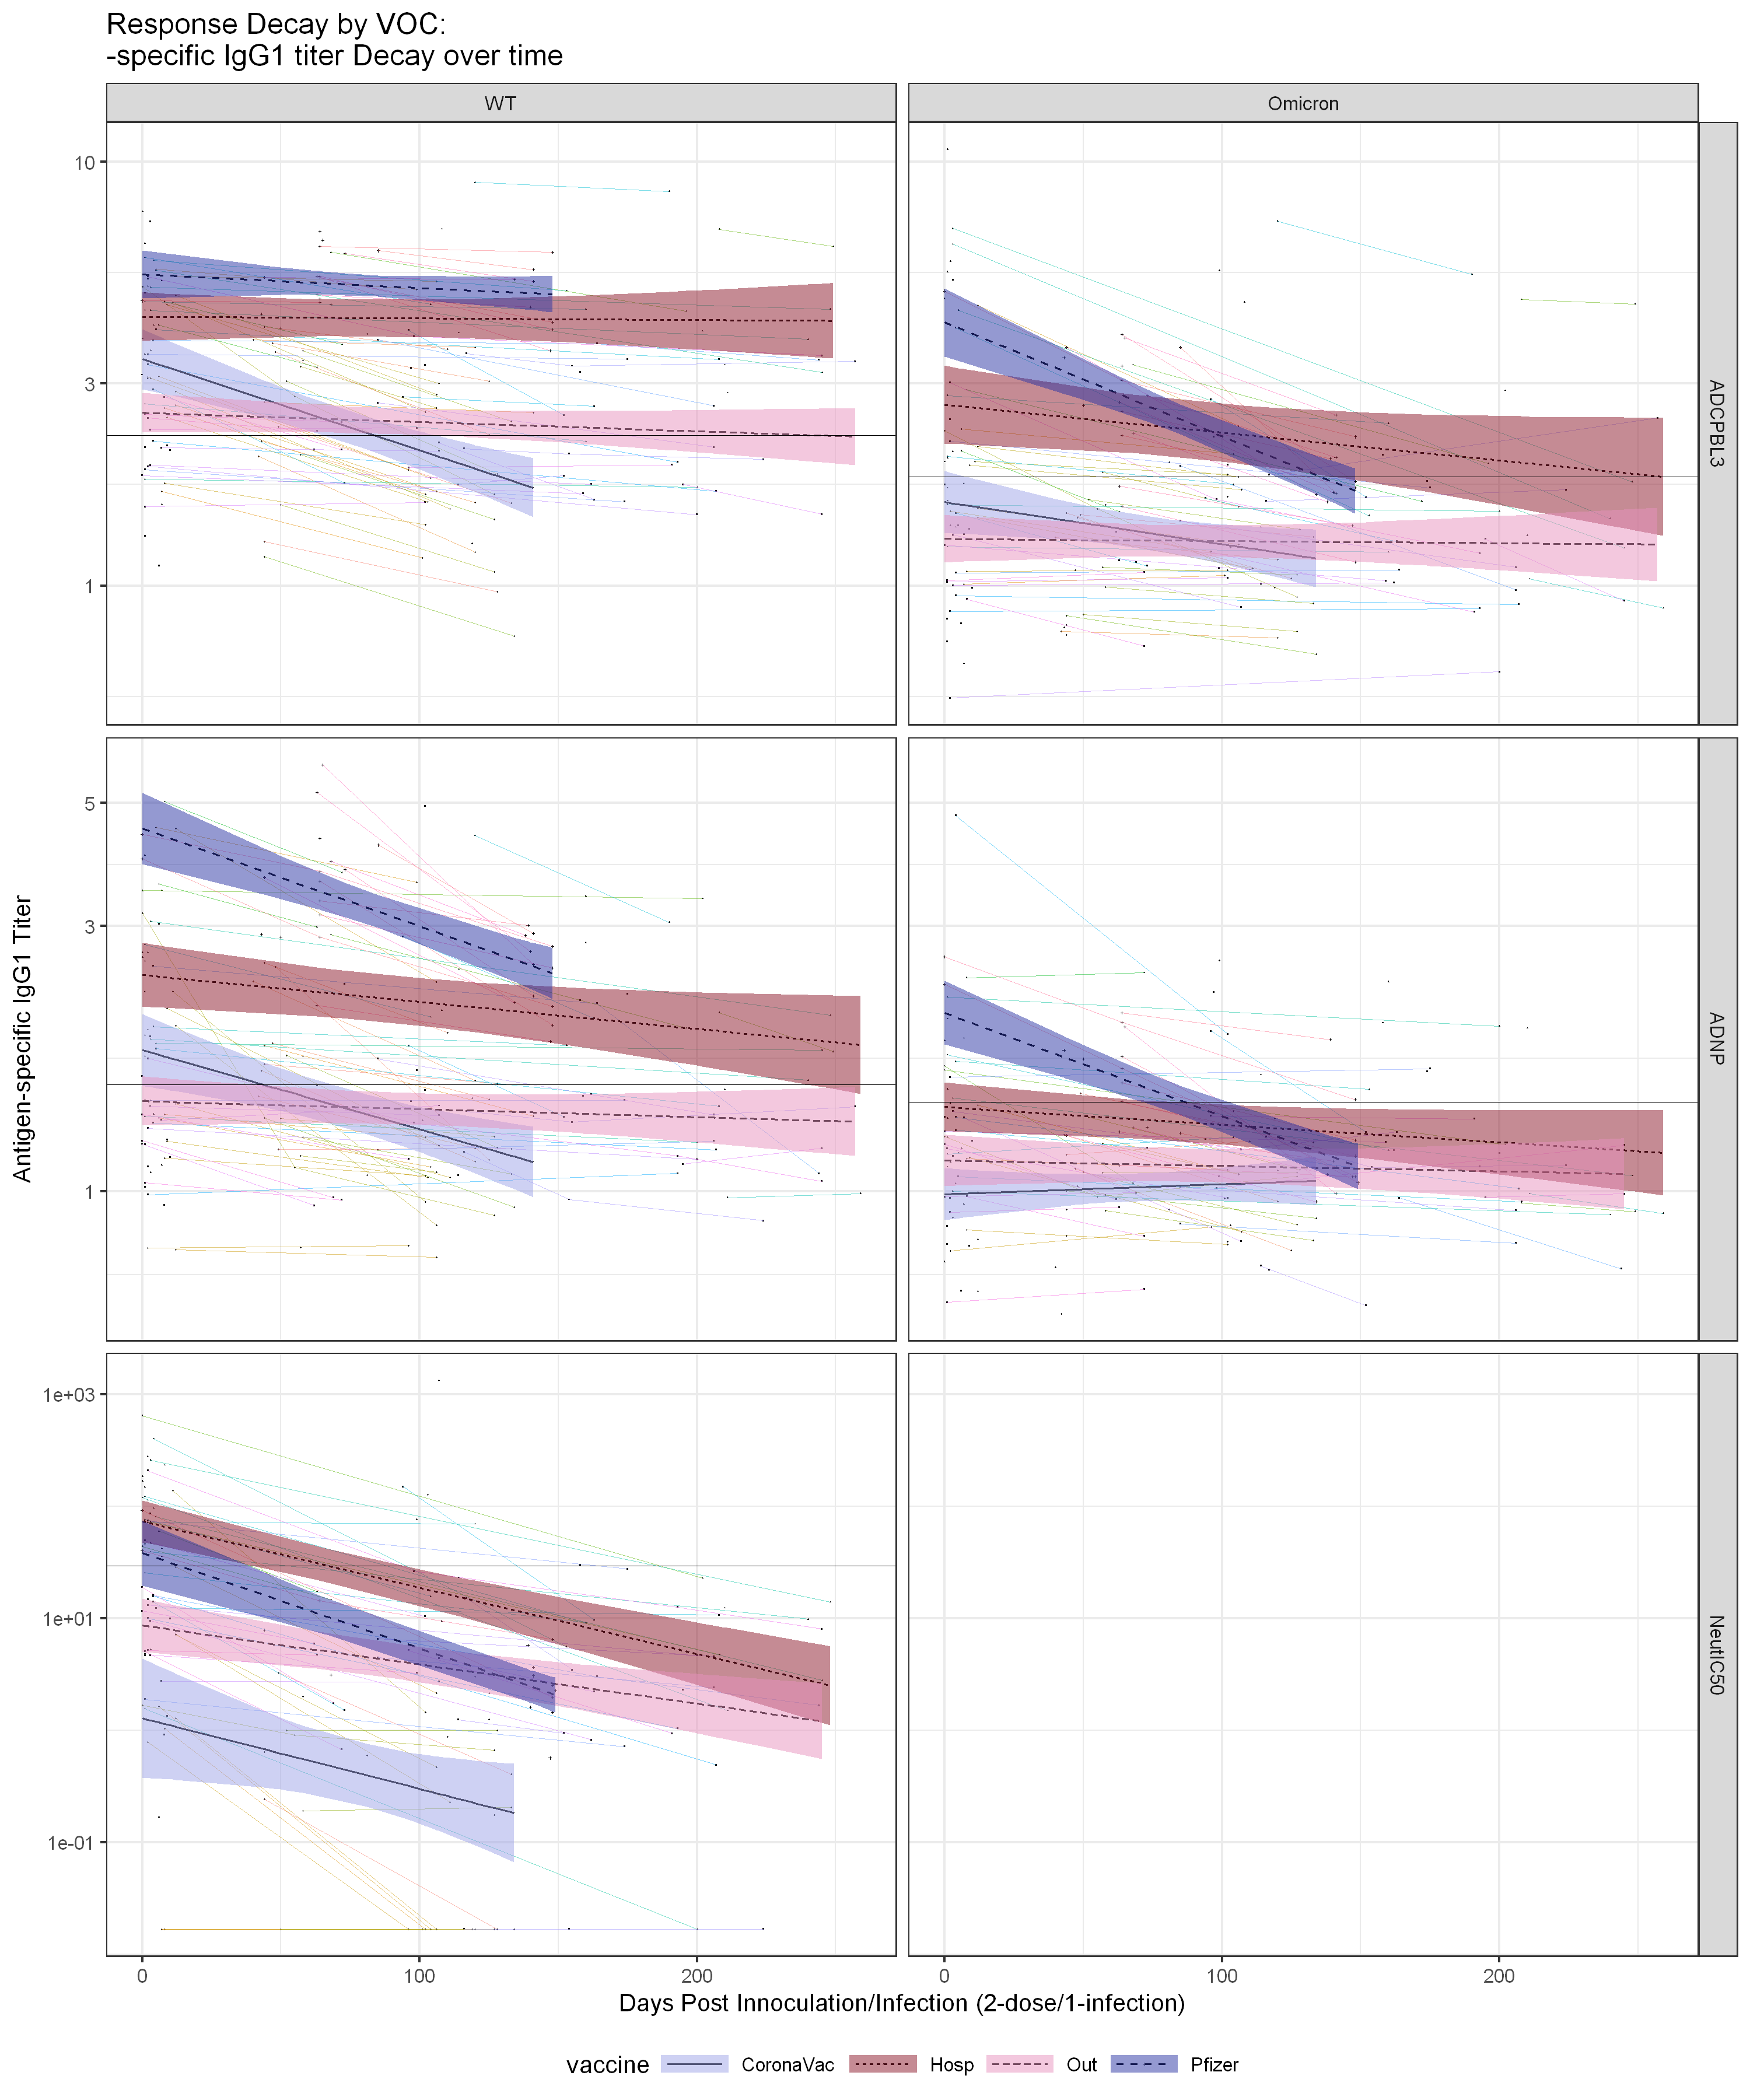

In [35]:
options(repr.plot.width=25,repr.plot.height=30)

options(warn=-1)



out = list()
for(anti in c('Spike')){
    out[[anti]]=list()
    for(aff_i in c('^A|^N')){

        data_i = data_decay %>% filter(antigen==anti & grepl(aff_i,affinity))

        print(table(as.character(data_i$affinity)))
        
        if(nrow(data_i)==0){next}
        
        glin1=ggplot(data_i,aes(x=DPFI,y=value,fill=vaccine,shape=vaccine))+
                geom_point(color='black',size=.5)+
                geom_line(aes(group=strat,color=strat),alpha=.5)+ # patient-specific lines
                theme_bw(base_size = 25)+
                geom_line(aes(y=fit,lty=vaccine),size=1,color='black')+         # trend lines
                geom_ribbon(aes(ymin=fit.lw,ymax=fit.hi,y=fit,fill=vaccine),alpha=.5) +
                theme(legend.key.width  = unit(2.5,"cm"),legend.position = 'bottom')+
                guides(color = 'none')+
                # geom_hline(aes(yintercept=naive_2.5))+
                # geom_hline(aes(yintercept=naive_50))+
                geom_hline(aes(yintercept=naive_97.5))+
                scale_fill_manual(values = col)+
                ylab('Antigen-specific IgG1 Titer')+xlab('Days Post Innoculation/Infection (2-dose/1-infection)')+
                ggtitle(paste0('Response Decay by VOC:\n','-specific IgG1 titer Decay over time'))+
                facet_grid(affinity~virus,scale='free')
#                facet_grid(antigen~affinity,scale='free')

        gexp1 = glin1 + scale_y_log10()
        gexp2 = glin1 + scale_y_log10(lim=c(1,max(data_decay$value,na.rm=T)*.25))

        aff_i = gsub('\\^|\\|','',aff_i)

        # if(vir%in%c('WT')){
        #     hgt=25; wdt=25
        #     if(aff_i=='A'){hgt=10; wdt=10}
        # }else{
            hgt=20; wdt=20
            if(aff_i=='A'){hgt=10;wdt=12}
#        }
        
        out[[anti]][[aff_i]] = gexp1
        
        # print(paste0('../results/04_scatter/exponential_full_range.',anti,'.',aff_i,'.pdf'))
        
        # ggsave(gexp1,filename = paste0('../results/04_scatter/exponential_full_range.',anti,'.',aff_i,'.pdf'),  height=hgt,width=wdt,limitsize=F)
        # ggsave(gexp2,filename = paste0('../results/04_scatter/exponential_wo_top25perc.',anti,'.',aff_i,'.pdf'),height=hgt,width=wdt,limitsize=F)
        # ggsave(glin1,filename = paste0('../results/04_scatter/linear_full_range.',anti,'.',aff_i,'.pdf'),       height=hgt,width=wdt,limitsize=F)

        options(warn=0)
    }
    # stop()

}

fig2ab=out$Spike$AN
fig2ab

Warning message in transformation$transform(x):
"NaNs produced"
Warning message in scale_x_log10():
"log-10 transformation introduced infinite values."
Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_errorbarh()`)."
`geom_line()`: Each group consists of only one observation.
i Do you need to adjust the group aesthetic?


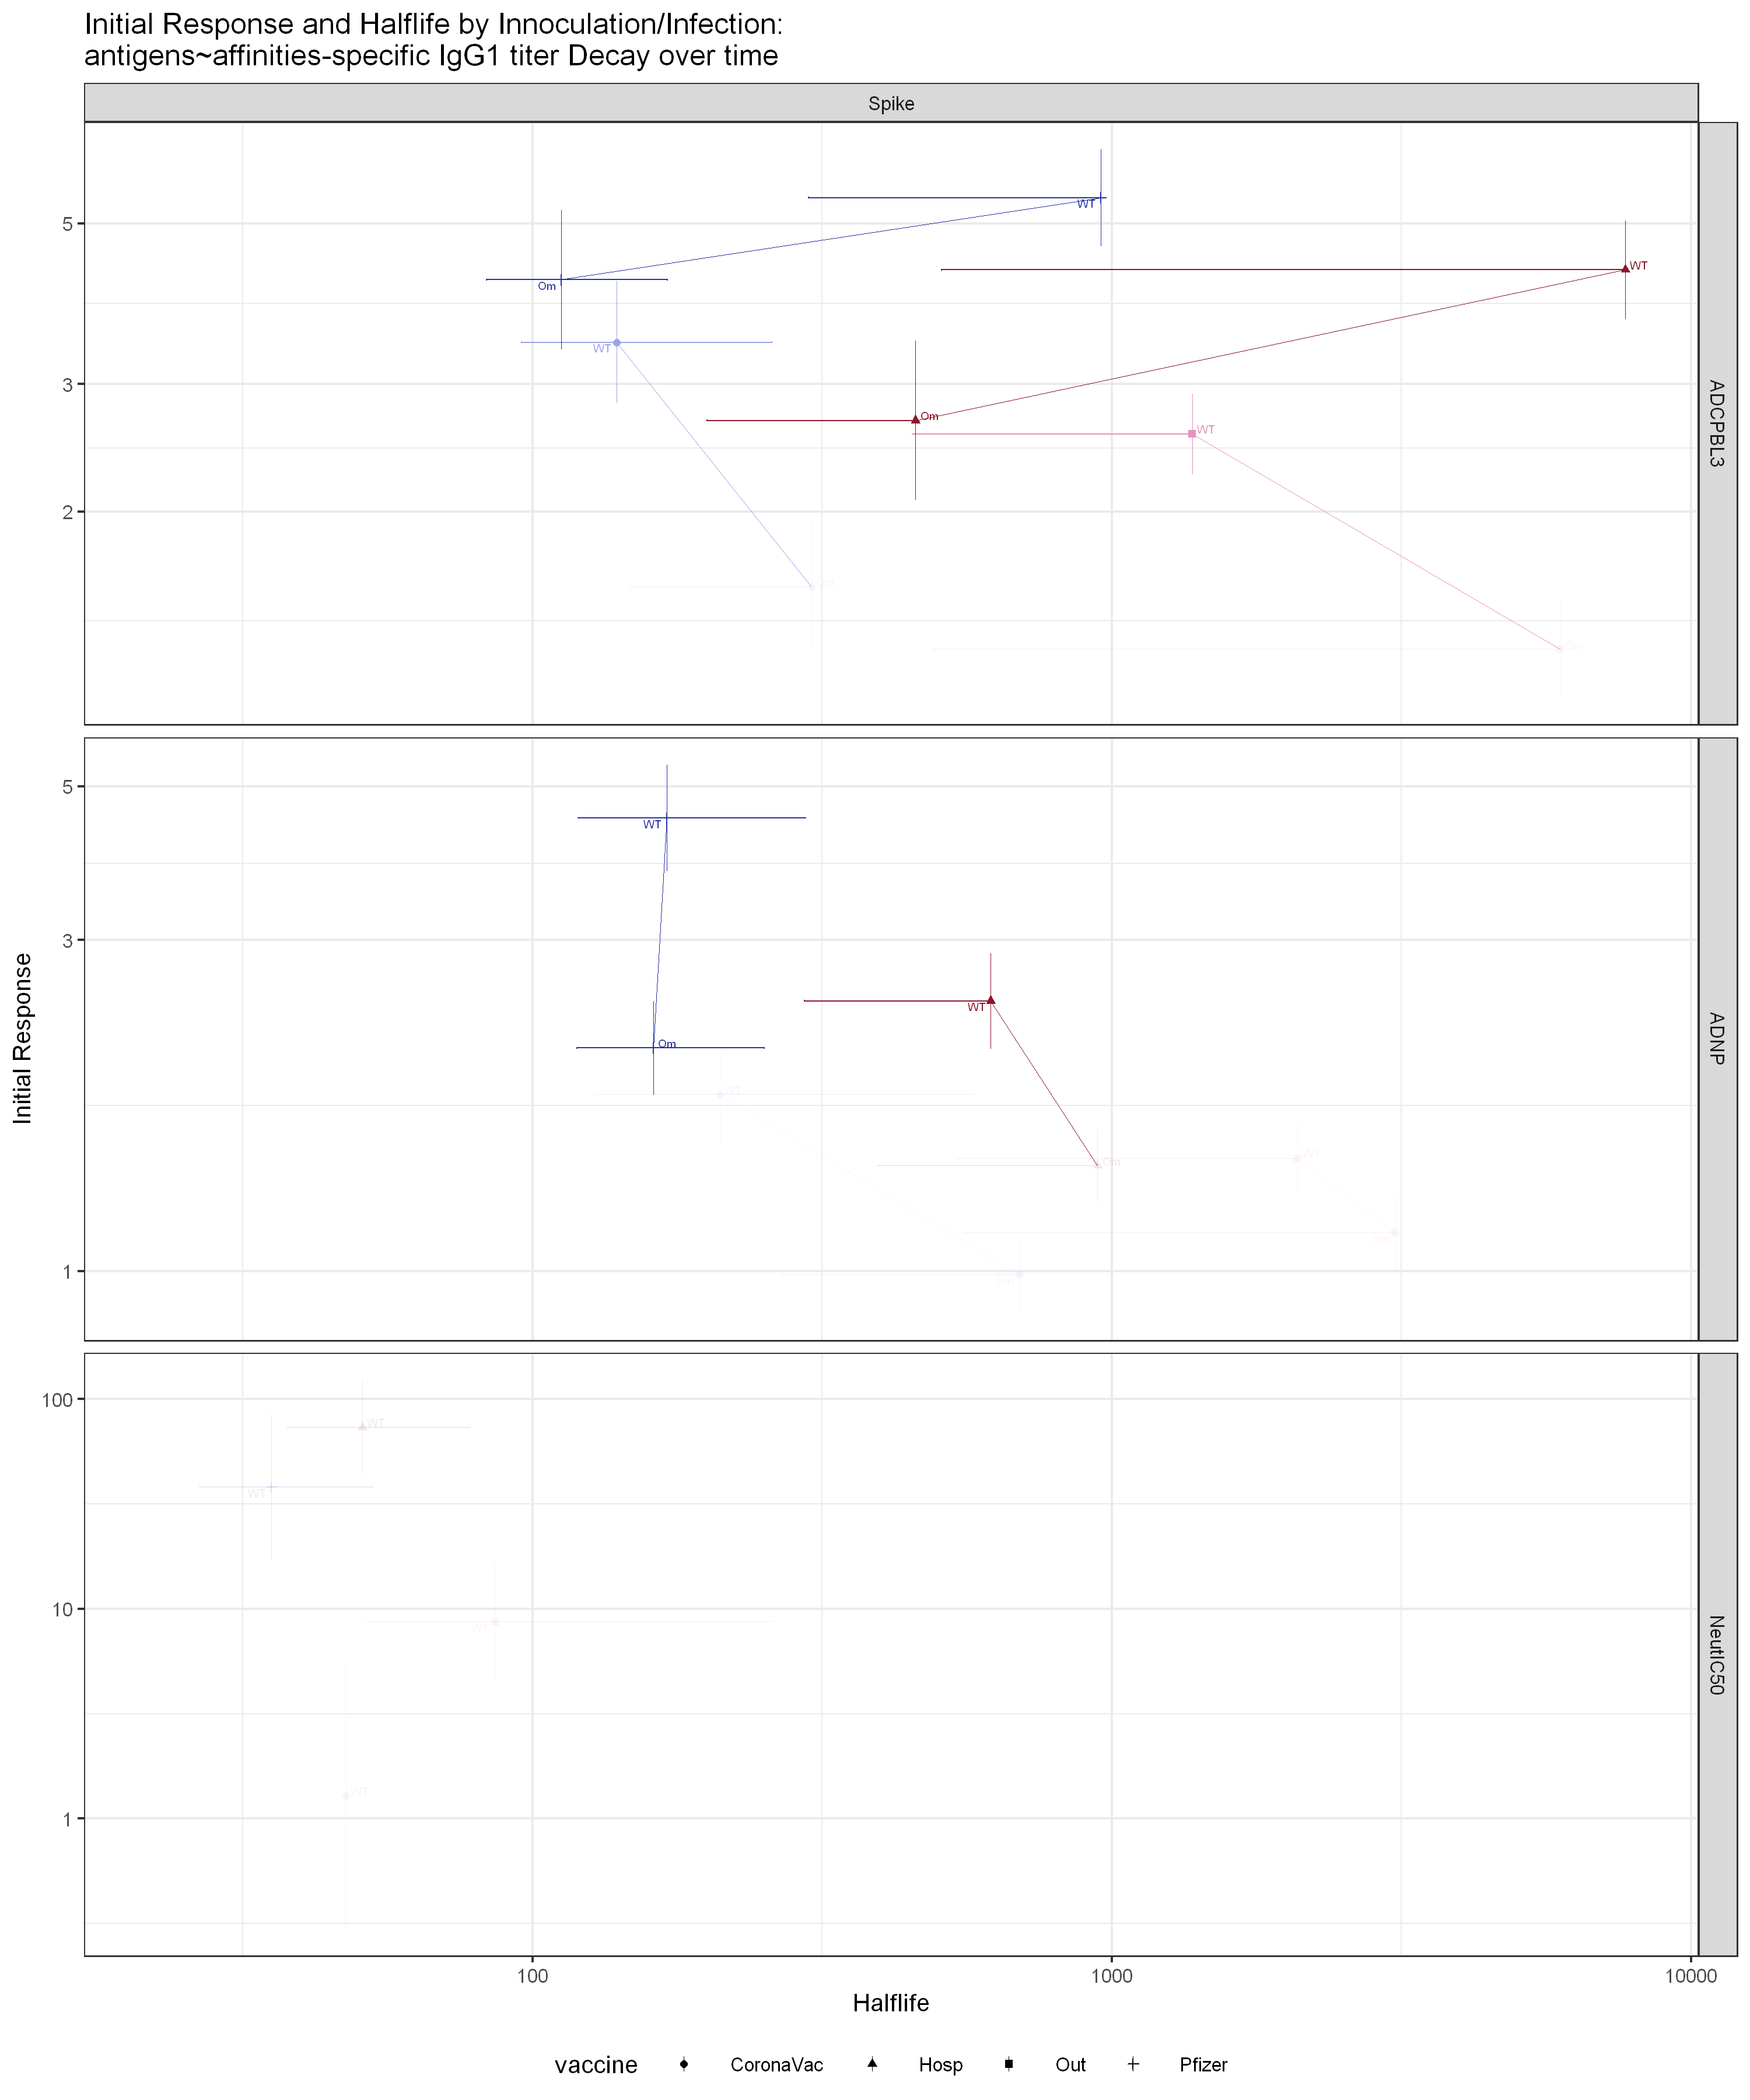

In [36]:
z=.975

a=data_decay_orig
b=a%>%
    select(
        vaccine,variable,antigen,virus,affinity,model_type,
        n,hl,hl_se,hl_t,I,I_se,I_t,Pr_t_I,Pr_t_hl,
        naive_2.5,naive_50,naive_97.5,
                    naive_50_raw,naive_97.5_raw,
        naive_se,DPFI,value,fit,fit.lw,fit.hi  
    ) %>% unique()

c=b %>% select(-fit,-fit.lw,-fit.hi,-DPFI,-value) %>% unique()

c = c %>%
    mutate(
        affinity = factor(affinity,levels=c('IgM','IgG1','IgG2','IgG3','IgG4','IgA1','R2a','R2b','R3av','R3b','C1q','ADCD','ADCPBL2','ADCPBL3','ADNP','NeutIC50')),
        virus = factor(as.character(virus) , levels=c('WT' ,'Alpha','Beta','Delta','Gamma','Omicron','HKU1','OC43'))

    )

data_decay_params_tmp = c %>%
    group_by(affinity) %>%
        mutate( # FDR adjust hl & I significance by affinity and by virus
            Q_t_hl = p.adjust(Pr_t_hl,'fdr'),
            Q_t_I  = p.adjust(Pr_t_I ,'fdr')
        ) %>%
        mutate(
            keep_it = ifelse(
                # Q_t_hl<.1|Q_t_I<.1 & # significant halflife 
                (
                    
                    # (exp(I)> 8 & Q_t_I<.1 & !grepl('^A',affinity)) |
                    # (exp(I)> 3 & Q_t_I<.1 & !grepl('WT',virus)) |
                    # (exp(I)> 2 & Q_t_I<.1 &  (grepl('^A',affinity) ))

                    # (((I)> (naive_50_raw+(naive_se*1.96))/naive_50_raw) ) #&  !grepl('^A',affinity)) |
                    # (((I)> (naive_50_raw+(naive_se*1.96))/naive_50_raw) &  (grepl('^A',affinity) | grepl('^Omicron',virus))
                    
                    (exp(I)> (max(3,((naive_50_raw+(naive_se*1.96))/naive_50_raw))) & !grepl('^A|^N',affinity)) |
                    (exp(I)> (max(2,((naive_50_raw+(naive_se*1.96))/naive_50_raw))) &  (grepl('^A|^N',affinity)   )) # | grepl('^Omicron',virus)))
                ) ,  # initial response FC > 8
                # (exp(I)>8 ) &  # initial response FC > 8
                # exp(I)>((naive_50_raw+(naive_se*3))/naive_50_raw), # initial response FC > x standard dev of naive median
                1,.1)
        ) %>% 
        select(I,hl,vaccine,keep_it,naive_50_raw,hl_se,Q_t_hl,Q_t_I,I_se,antigen,affinity,virus,naive_50_raw,naive_se) %>% unique()

data_decay_params_tmp$hl[data_decay_params_tmp$hl>=0]=-(1e-3) # add pseudocount for non-significant slopes



fig2c=data_decay_params_tmp %>% filter(antigen=='Spike' & grepl('^A|^N',affinity)) %>% 
    select(I,hl,vaccine,keep_it,naive_50_raw,hl_se,I_se,Q_t_hl,affinity,antigen,virus) %>% unique() %>%
    ggplot(aes(y=exp(I),x=-log(2)/hl,color=vaccine,shape=vaccine,alpha=keep_it  ))+
            # geom_text(aes(label=paste('Naive\n',signif(naive_50_raw,5))),x=3.5,y=2.5,color='black')+
            geom_errorbarh(aes(xmin=-log(2)/(hl-qnorm(z)*hl_se),xmax=-log(2)/(hl+qnorm(z)*ifelse(Q_t_hl<0.1,hl_se,0))),size=.75)+
            geom_pointrange(aes(ymin=exp(I-qnorm(z)*I_se),ymax=exp(I+qnorm(z)*I_se)),size=.75)+
            scale_y_log10()+scale_x_log10()+scale_color_manual(values = col)+
            theme_bw(base_size = 25)+xlab('Halflife')+ylab('Initial Response')+
            geom_line(aes(group=vaccine))+facet_grid(affinity~antigen,scale='free')+ #+ggrepel::geom_text_repel(aes(label=substr(virus,1,2))),
            ggrepel::geom_text_repel(aes(label=substr(virus,1,2)),size=4)+
            ggtitle(paste0('Initial Response and Halflife by Innoculation/Infection:\n','antigens~affinities','-specific IgG1 titer Decay over time'))+
            theme(legend.key.width  = unit(2.5,"cm"),legend.position = 'bottom')+
            guides(alpha = 'none',color='none')
            # facet_grid(affinity~virus)
   fig2c    

Warning message in transformation$transform(x):
"NaNs produced"
Warning message in scale_x_log10():
"log-10 transformation introduced infinite values."
Warning message:
"Removed 2 rows containing missing values or values outside the scale range (`geom_errorbarh()`)."


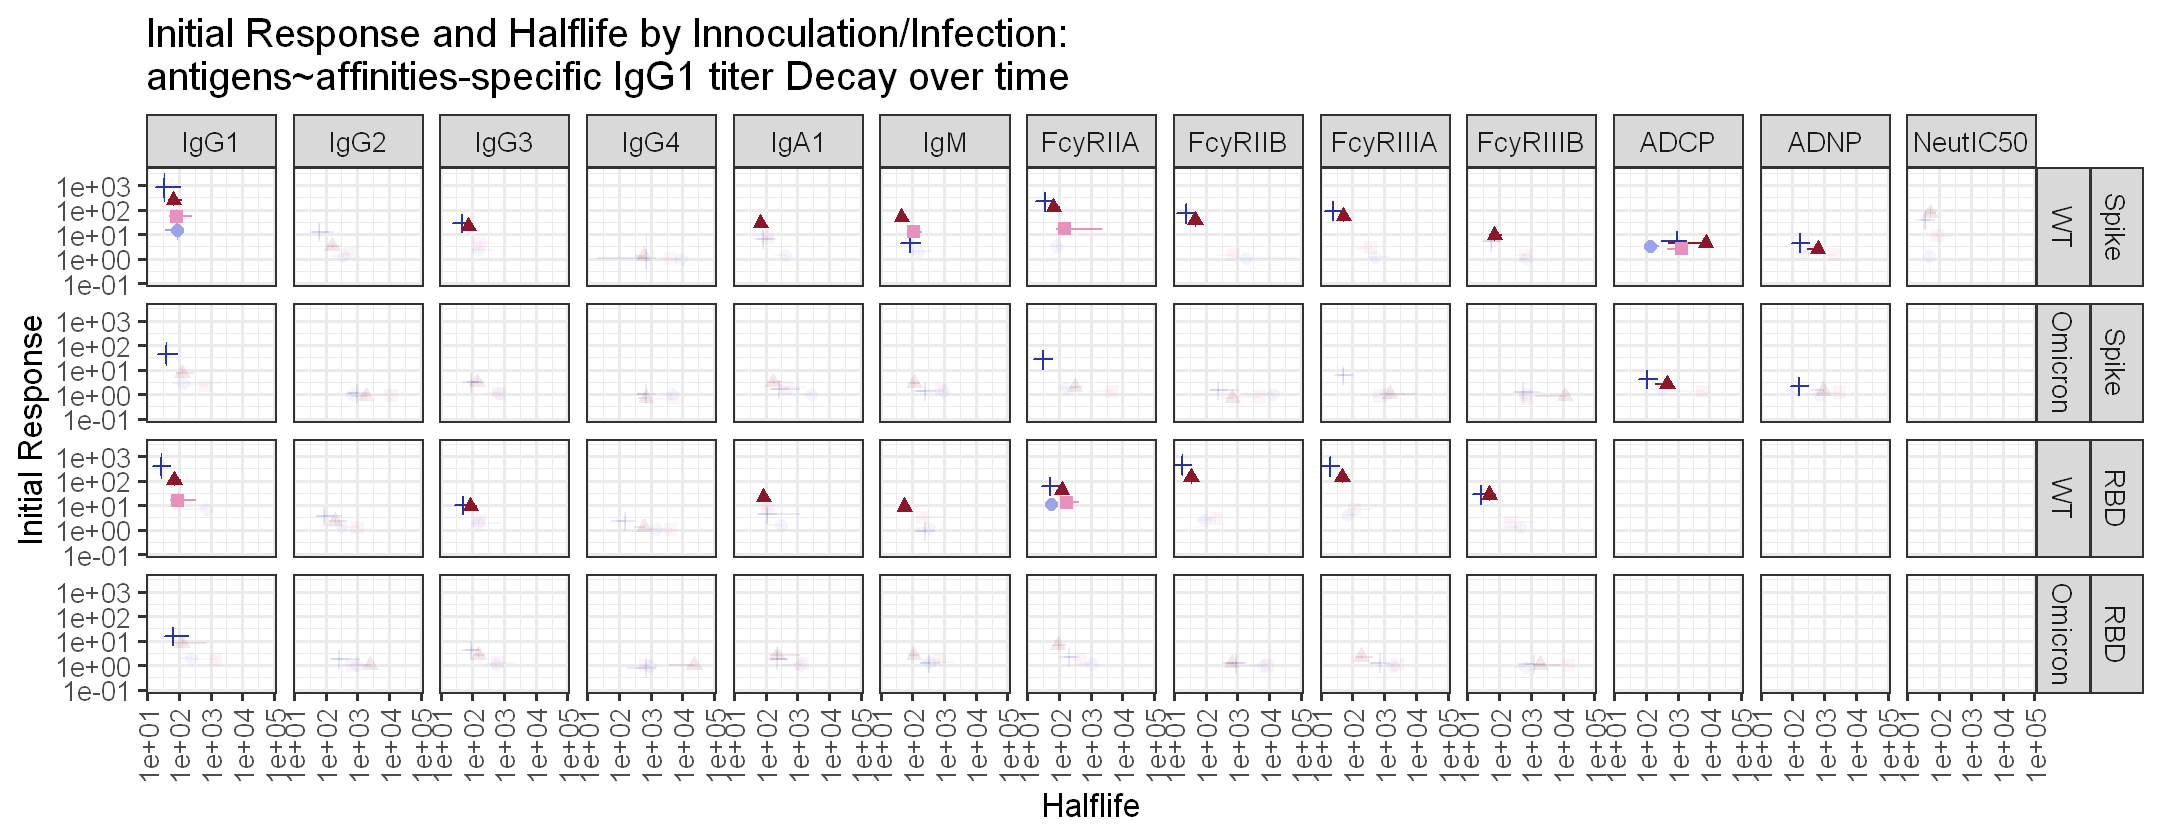

In [37]:
options(repr.plot.width=18,repr.plot.height=7)

# for(vir in c('WT','Omicron')){
g2d=data_decay_params_tmp %>% filter(virus%in%c('WT','Omicron') ) %>% 

        mutate( 
            affinity = gsub('^R','FcyR',gsub('R2','RII',gsub('R3','RIII',gsub('a$|av$','A',gsub('b$','B',gsub('BL3$','',affinity))))))
        ) %>%
        mutate(
            affinity = factor(affinity,levels=c('IgG1','IgG2','IgG3','IgG4','IgA1','IgM','FcyRIIA','FcyRIIB','FcyRIIIA','FcyRIIIB','ADCP','ADNP','NeutIC50')), #,'C1q','ADCD','ADCPBL2','ADCPBL3','ADNP')),
            antigen = factor(antigen,levels=c('Spike','RBD'))
            # virus = factor(as.character(virus) , levels=c('WT')) # levels=c('WT' ,'Alpha','Beta','Delta','Gamma','Omicron')) #,'HKU1','OC43'))
        ) %>%
        filter(!is.na(virus) & !is.na(affinity) &  !is.na(antigen)) %>%

    
    select(I,hl,vaccine,keep_it,naive_50_raw,hl_se,I_se,Q_t_hl,affinity,antigen,virus) %>% unique() %>%
    ggplot(aes(y=exp(I),x=-log(2)/hl,color=vaccine,shape=vaccine,alpha=keep_it  ))+
            # geom_text(aes(label=paste('Naive\n',signif(naive_50_raw,5))),x=3.5,y=2.5,color='black')+
            geom_errorbarh(aes(xmin=-log(2)/(hl-qnorm(z)*hl_se),xmax=-log(2)/(hl+qnorm(z)*ifelse(Q_t_hl<0.1,hl_se,0))),size=.75)+
            geom_pointrange(aes(ymin=exp(I-qnorm(z)*I_se),ymax=exp(I+qnorm(z)*I_se)),size=.75)+
            scale_y_log10()+
            # scale_x_log10(c(10,1e4))+
            scale_x_log10()+
            scale_color_manual(values = col)+
            theme_bw(base_size = 20)+xlab('Halflife')+ylab('Initial Response')+
            theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1),legend.position = 'none')+
            ggtitle(paste0('Initial Response and Halflife by Innoculation/Infection:\n','antigens~affinities','-specific IgG1 titer Decay over time')) +
            facet_grid(antigen+virus~affinity)
    h=7;w=18
    print(g2d)
    # if(vir=='WT'){h=20}
        # ggsave(gi,filename=paste0('../results/04_decay_param/exponential_full_range.',vir,'.spike.rbd.pdf'),width=w,height=h)
# }



Warning message in transformation$transform(x):
"NaNs produced"
Warning message in scale_x_log10():
"log-10 transformation introduced infinite values."
Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_errorbarh()`)."
`geom_line()`: Each group consists of only one observation.
i Do you need to adjust the group aesthetic?
Warning message in transformation$transform(x):
"NaNs produced"
Warning message in scale_x_log10():
"log-10 transformation introduced infinite values."
Warning message:
"Removed 2 rows containing missing values or values outside the scale range (`geom_errorbarh()`)."
Warning message:
"ggrepel: 8 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 8 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


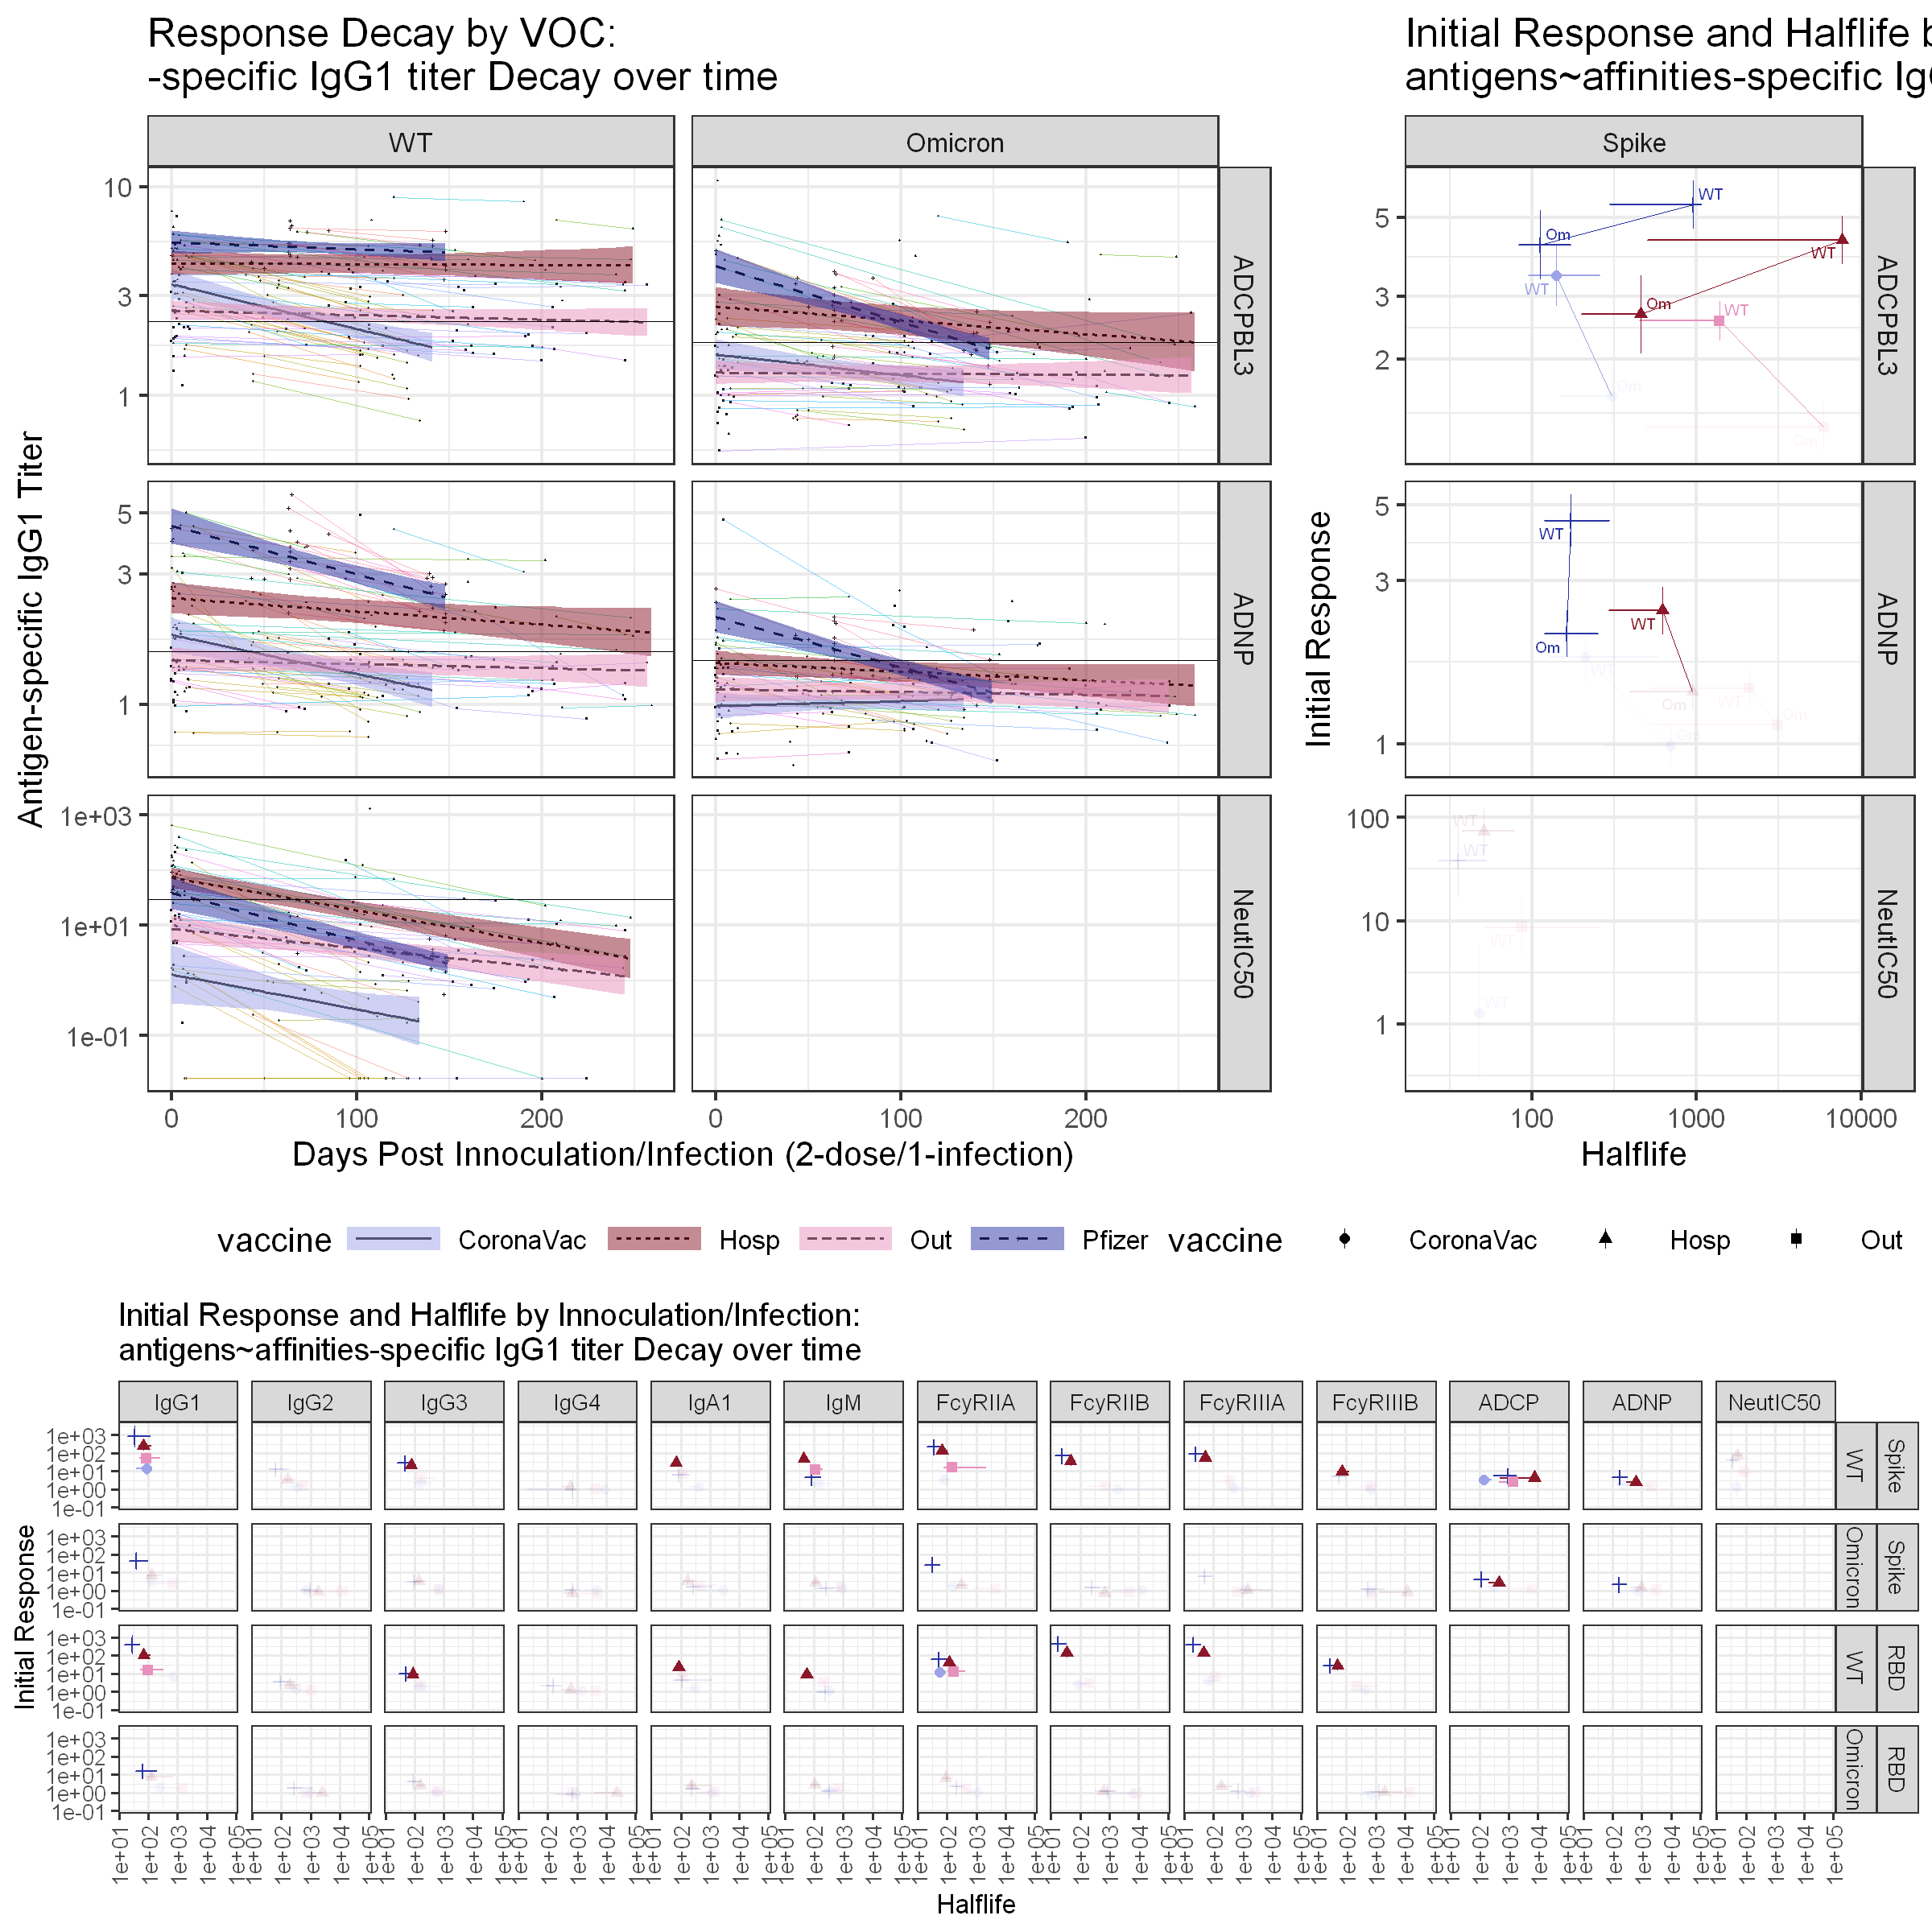

In [38]:
options(repr.plot.width=20,repr.plot.height=20)
# leg1 = ggpubr::get_legend(fig2ab+theme(legend.position = 'left'))
# leg2 = ggpubr::get_legend(fig2c+theme(legend.position='left'))
cowplot::plot_grid(
cowplot::plot_grid(fig2ab,
                   fig2c,
                   ncol=2,rel_widths=c(1,.5)),
    g2d, nrow=2,rel_heights = c(1,.5))

# cowplot::plot_grid(
#     cowplot::plot_grid( fig2ab + theme(legend.position = 'none') ,
#         cowplot::plot_grid( figS_neut + theme(legend.position = 'none') , 
#                            cowplot::plot_grid(leg1,leg2,nrow=2) ,nrow=1,ncol=2,rel_widths = c(.55,.45)) ,
#     ncol=1, nrow=2,rel_heights=c(.7,.3)), fig2c+ theme(legend.position = 'none'),rel_widths=c(.65,.35))


ggsave(filename='../results/fig3.pdf',width=20,height=25)

In [39]:
stop()

ERROR: Error in eval(expr, envir, enclos): 


# trash

# Residual Correlations

In [ ]:
library(tidyr)
head(data_decay)
# apply(
#     combn(unique(data_decay$variable),2),2,function(x){
#         x1=data_decay$residuals[data_decay$variable==x[1]]
#         x2=data_decay$residuals[data_decay$variable==x[2]]
#         data.frame(variable=
# })
# head(reshape2::dcast(.~variable,data=data_decay,fill='residuals'))

sp1=data_decay %>% select(Tube.Label,variable,residuals) %>% spread(variable,residuals) 
head(sp1)


In [ ]:
cor(sp1[,!colnames(sp1)%in%colnames(data_decay)],use = 'complete.obs') %>% 
    reshape2::melt(value.name = 'pearson_correlation') %>% 
    filter(pearson_correlation!=1) %>%
    mutate(
        same_VOC = gsub('\\..*','',Var1)==gsub('\\..*','',Var2),
        same_assay = gsub('.*\\.','',Var1)==gsub('.*\\.','',Var2)
    ) %>% 
        filter(
            same_VOC & !same_assay & 
            grepl('Spike',Var1) & grepl('Spike',Var2) &
            grepl('WT|Omicron',Var1) & grepl('WT|Omicron',Var2) &
            grepl('^I',gsub('.*\\.','',Var1)) & grepl('^R|^A',gsub('.*\\.','',Var2))
        ) %>%
    arrange(-abs(pearson_correlation))

# Figures

In [ ]:
options(repr.plot.width=20,repr.plot.height=15)


data_i = data_decay %>% filter(virus%in%c('WT','Omicron') & grepl('^I',affinity) & antigen%in%c('Spike'))

g1=ggplot(data_i,aes(x=DPFI,y=value,fill=vaccine,shape=vaccine))+
        geom_point(color='black',size=.5)+
        geom_line(aes(group=strat,color=strat),alpha=.5)+ # patient-specific lines
        theme_bw(base_size = 20)+
        geom_line(aes(y=fit,lty=vaccine),size=1,color='black')+         # trend lines
        geom_ribbon(aes(ymin=fit.lw,ymax=fit.hi,y=fit,fill=vaccine),alpha=.5) +
        theme(legend.key.width  = unit(2.5,"cm"),legend.position = 'bottom')+
        guides(color = 'none')+
        geom_hline(aes(yintercept=naive_2.5))+
        geom_hline(aes(yintercept=naive_50))+
        geom_hline(aes(yintercept=naive_97.5))+
        scale_fill_manual(values = col)+
        ylab('Fold change (Sample/Naive MFI')+ggtitle('Spike-specific Immunoglobulin')+
        # xlab('Days Post Innoculation/Infection (2-dose/1-infection)')+
        # ggtitle(paste0('Response Decay by VOC:\n','-specific IgG1 titer Decay over time'))+
        facet_grid(antigen+virus~affinity,scale='free')+ scale_y_log10()


data_i = data_decay %>% filter(virus%in%c('WT','Omicron') & grepl('^R',affinity) & antigen%in%c('Spike'))

g2=ggplot(data_i,aes(x=DPFI,y=value,fill=vaccine,shape=vaccine))+
        geom_point(color='black',size=.5)+
        geom_line(aes(group=strat,color=strat),alpha=.5)+ # patient-specific lines
        theme_bw(base_size = 20)+
        geom_line(aes(y=fit,lty=vaccine),size=1,color='black')+         # trend lines
        geom_ribbon(aes(ymin=fit.lw,ymax=fit.hi,y=fit,fill=vaccine),alpha=.5) +
        theme(legend.key.width  = unit(2.5,"cm"),legend.position = 'bottom')+
        guides(color = 'none')+
        geom_hline(aes(yintercept=naive_2.5))+
        geom_hline(aes(yintercept=naive_50))+
        geom_hline(aes(yintercept=naive_97.5))+
        scale_fill_manual(values = col)+
        ylab('Fold change (Sample/Naive MFI')+ggtitle('FcR-binding')+
        xlab('Days Post Innoculation/Infection (2-dose/1-infection)')+
        # ggtitle(paste0('Response Decay by VOC:\n','-specific IgG1 titer Decay over time'))+
        facet_grid(antigen+virus~affinity,scale='free')+ scale_y_log10()

cowplot::plot_grid(g1,g2,nrow=2)

In [ ]:
options(repr.plot.width=20,repr.plot.height=10)

g1=data_decay_params %>% filter(virus==c('WT') & grepl('^IgG',affinity) & antigen%in%c('Spike','RBD') ) %>%
    ggplot(aes(y=exp(I),x=-log(2)/hl,color=vaccine,shape=vaccine,alpha=keep_it  ))+
            geom_text(aes(label=paste('Naive\n',signif(naive_50_raw,5))),x=3.5,y=2.5,color='black')+
            geom_errorbarh(aes(xmin=-log(2)/(hl-qnorm(z)*hl_se),xmax=-log(2)/(hl+qnorm(z)*ifelse(Q_t_hl<0.1,hl_se,0))),size=.75)+
            geom_pointrange(aes(ymin=exp(I-qnorm(z)*I_se),ymax=exp(I+qnorm(z)*I_se)),size=.75)+
            scale_y_log10()+scale_x_log10()+scale_color_manual(values = col)+
            theme_bw(base_size = 20)+xlab('Halflife')+ylab('Initial Response')+
            ggtitle(paste0('Initial Response and Halflife by Innoculation/Infection:\n','antigens~affinities','-specific IgG1 titer Decay over time')) +
            facet_grid(antigen~affinity)


g2=data_decay_params %>% filter(virus==c('WT') & grepl('^R',affinity) & antigen%in%c('Spike','RBD') ) %>%
    ggplot(aes(y=exp(I),x=-log(2)/hl,color=vaccine,shape=vaccine,alpha=keep_it  ))+
            geom_text(aes(label=paste('Naive\n',signif(naive_50_raw,5))),x=3.5,y=2.5,color='black')+
            geom_errorbarh(aes(xmin=-log(2)/(hl-qnorm(z)*hl_se),xmax=-log(2)/(hl+qnorm(z)*ifelse(Q_t_hl<0.1,hl_se,0))),size=.75)+
            geom_pointrange(aes(ymin=exp(I-qnorm(z)*I_se),ymax=exp(I+qnorm(z)*I_se)),size=.75)+
            scale_y_log10()+scale_x_log10()+scale_color_manual(values = col)+
            theme_bw(base_size = 20)+xlab('Halflife')+ylab('Initial Response')+
            ggtitle(paste0('Initial Response and Halflife by Innoculation/Infection:\n','antigens~affinities','-specific IgG1 titer Decay over time')) +
            facet_grid(antigen~affinity)
g1
g2
options(repr.plot.width=20,repr.plot.height=8)

g3=data_decay_params %>% filter(virus%in%c('WT','Gamma','Omicron')& grepl('^IgG',affinity) & antigen=='Spike'  ) %>%
    ggplot(aes(y=exp(I),x=-log(2)/hl,color=vaccine,shape=virus,alpha=keep_it  ))+
            geom_text(aes(label=paste('Naive\n',signif(naive_50_raw,5))),x=3.5,y=2.5,color='black')+
            geom_errorbarh(aes(xmin=-log(2)/(hl-qnorm(z)*hl_se),xmax=-log(2)/(hl+qnorm(z)*ifelse(Q_t_hl<0.1,hl_se,0))),size=.75)+
            geom_pointrange(aes(ymin=exp(I-qnorm(z)*I_se),ymax=exp(I+qnorm(z)*I_se)),size=.75)+
            scale_y_log10()+scale_x_log10()+scale_color_manual(values = col)+
            theme_bw(base_size = 20)+xlab('Halflife')+ylab('Initial Response')+
            facet_grid(~affinity)+
            geom_line(aes(group=vaccine))+ggrepel::geom_text_repel(aes(label=substr(virus,1,2)))+
            ggtitle(paste0('Initial Response and Halflife by Innoculation/Infection:\n','antigens~affinities','-specific IgG1 titer Decay over time')) 

g4=data_decay_params %>% filter(virus%in%c('WT','Gamma','Omicron')& grepl('^R',affinity) & antigen=='Spike' ) %>%
    ggplot(aes(y=exp(I),x=-log(2)/hl,color=vaccine,shape=virus,alpha=keep_it  ))+
            geom_text(aes(label=paste('Naive\n',signif(naive_50_raw,5))),x=3.5,y=2.5,color='black')+
            geom_errorbarh(aes(xmin=-log(2)/(hl-qnorm(z)*hl_se),xmax=-log(2)/(hl+qnorm(z)*ifelse(Q_t_hl<0.1,hl_se,0))),size=.75)+
            geom_pointrange(aes(ymin=exp(I-qnorm(z)*I_se),ymax=exp(I+qnorm(z)*I_se)),size=.75)+
            scale_y_log10()+scale_x_log10()+scale_color_manual(values = col)+
            theme_bw(base_size = 20)+xlab('Halflife')+ylab('Initial Response')+
            facet_grid(~affinity)+
            geom_line(aes(group=vaccine))+ggrepel::geom_text_repel(aes(label=substr(virus,1,2)))+
            ggtitle(paste0('Initial Response and Halflife by Innoculation/Infection:\n','antigens~affinities','-specific IgG1 titer Decay over time')) 
g3
g4
# cowplot::plot_grid(g1+theme(legend.position="none"),
#                    g2+theme(legend.position="none"),
#                    g3+theme(legend.position="none"),
#                    g4+theme(legend.position="none"),
#                    ncol = 1)
# gridExtra::grid.arrange(grobs=list(g1,g2,g3,g4),nrows=2)
# g1
# g2
# g3
# g4

In [ ]:
options(repr.plot.width=20,repr.plot.height=20)

data_decay_params %>% filter(virus%in%c('WT')& grepl('^R|^I',affinity) & antigen%in%c('Spike','RBD','S1','S2') ) %>%
    ggplot(aes(y=exp(I),x=-log(2)/hl,color=vaccine,shape=virus,alpha=keep_it  ))+
            geom_text(aes(label=paste('Naive\n',signif(naive_50_raw,5))),x=3.5,y=2.5,color='black')+
            geom_errorbarh(aes(xmin=-log(2)/(hl-qnorm(z)*hl_se),xmax=-log(2)/(hl+qnorm(z)*ifelse(Q_t_hl<0.1,hl_se,0))),size=.75)+
            geom_pointrange(aes(ymin=exp(I-qnorm(z)*I_se),ymax=exp(I+qnorm(z)*I_se)),size=.75)+
            scale_y_log10()+scale_x_log10()+scale_color_manual(values = col)+
            theme_bw(base_size = 20)+xlab('Halflife')+ylab('Initial Response')+
            facet_wrap(~affinity)+
            geom_line(aes(group=vaccine))+ggrepel::geom_text_repel(aes(label=substr(antigen,1,2)))+
            ggtitle(paste0('Initial Response and Halflife by Innoculation/Infection:\n','antigens~affinities','-specific IgG1 titer Decay over time')) 

In [ ]:
data_i = data_decay %>% filter(virus%in%c('WT','Omicron') & grepl('^A',affinity) & antigen%in%c('Spike'))

ggplot(data_i,aes(x=DPFI,y=value,fill=vaccine,shape=vaccine))+
        geom_point(color='black',size=.5)+
        geom_line(aes(group=strat,color=strat),alpha=.5)+ # patient-specific lines
        theme_bw(base_size = 20)+
        geom_line(aes(y=fit,lty=vaccine),size=1,color='black')+         # trend lines
        geom_ribbon(aes(ymin=fit.lw,ymax=fit.hi,y=fit,fill=vaccine),alpha=.5) +
        theme(legend.key.width  = unit(2.5,"cm"),legend.position = 'bottom')+
        guides(color = 'none')+
        geom_hline(aes(yintercept=naive_2.5))+
        geom_hline(aes(yintercept=naive_50))+
        geom_hline(aes(yintercept=naive_97.5))+
        scale_fill_manual(values = col)+
        ylab('Antigen-specific IgG1 Titer')+xlab('Days Post Innoculation/Infection (2-dose/1-infection)')+
        ggtitle(paste0('Response Decay by VOC:\n','-specific IgG1 titer Decay over time'))+
        facet_grid(virus~affinity,scale='free')+ scale_y_log10()


data_decay_params %>% filter(virus%in%c('WT','Omicron') & grepl('^A',affinity) & antigen%in%c('Spike')) %>%
    ggplot(aes(y=exp(I),x=-log(2)/hl,color=vaccine,shape=vaccine,alpha=keep_it  ))+
            geom_text(aes(label=paste('Naive\n',signif(naive_50_raw,5))),x=3.5,y=2.5,color='black')+
            geom_errorbarh(aes(xmin=-log(2)/(hl-qnorm(z)*hl_se),xmax=-log(2)/(hl+qnorm(z)*ifelse(Q_t_hl<0.1,hl_se,0))),size=.75)+
            geom_pointrange(aes(ymin=exp(I-qnorm(z)*I_se),ymax=exp(I+qnorm(z)*I_se)),size=.75)+
            scale_y_log10()+scale_x_log10()+scale_color_manual(values = col)+
            theme_bw(base_size = 20)+xlab('Halflife')+ylab('Initial Response')+
            ggtitle(paste0('Initial Response and Halflife by Innoculation/Infection:\n','antigens~affinities','-specific IgG1 titer Decay over time')) +
            facet_grid(virus~affinity)


In [ ]:
options(repr.plot.width=20,repr.plot.height=10)

options(warn=-1)

unique(data_decay[,c('vaccine','virus','affinity','antigen','hl','hl_se','Pr_t_hl','I','I_se','Pr_t_I')]) %>%
    # filter(
    #     # virus %in% c('WT','Gamma','Omicron') & 
    #     antigen%in%c('S1','S2','RBD','Spike')
    # ) %>% 
    mutate(significant=p.adjust(Pr_t_hl,'fdr')<.1) %>%
    ggplot(aes(y=exp(I),x=-log(2)/hl,color=vaccine ))+
        geom_point()+
        # geom_errorbarh(aes(shape=virus,xmin=-log(2)/(hl-qnorm(z)*hl_se),xmax=-log(2)/(hl+qnorm(z)*ifelse(significant,hl_se,0))),alpha=.25,size=.75)+
        # geom_pointrange(aes(shape=virus,ymin=exp(I-qnorm(z)*I_se),ymax=exp(I+qnorm(z)*I_se)),alpha=.25,size=.75)+
        scale_y_log10(lim=c(10,1000))+scale_x_log10()+
        # ggrepel::geom_text_repel(aes(label=substr(virus,1,1)),size=8)+
        # geom_point(size=6)+
        scale_color_manual(values = col)+ #xlim(c(1,500))+ ylim(c(1,1000))+
# stat_smooth(size=2,method='glm')+
# stat_smooth(size=2,method='glm',formula=y~x^2)+
stat_smooth(size=2,method='glm',formula=y~log(x))+
        # geom_path(aes(group=vaccine),color='black',size=1)+
#         facet_wrap(~vaccine,scale='free')+
        theme_bw(base_size = 20)+xlab('Halflife')+ylab('Initial Response')+
        ggtitle(paste0('Initial Response and Halflife by Innoculation/Infection:\n','antigens~affinities','-specific IgG1 titer Decay over time. Initial response 10:1000')) #+
        # facet_grid(antigen~affinity) #,scale='free')

unique(data_decay[,c('vaccine','virus','affinity','antigen','hl','hl_se','Pr_t_hl','I','I_se','Pr_t_I')]) %>%
    # filter(
    #     # virus %in% c('WT','Gamma','Omicron') & 
    #     antigen%in%c('S1','S2','RBD','Spike')
    # ) %>% 
    mutate(significant=p.adjust(Pr_t_hl,'fdr')<.1) %>%
    ggplot(aes(y=exp(I),x=-log(2)/hl,color=vaccine ))+
        geom_point()+
        # geom_errorbarh(aes(shape=virus,xmin=-log(2)/(hl-qnorm(z)*hl_se),xmax=-log(2)/(hl+qnorm(z)*ifelse(significant,hl_se,0))),alpha=.25,size=.75)+
        # geom_pointrange(aes(shape=virus,ymin=exp(I-qnorm(z)*I_se),ymax=exp(I+qnorm(z)*I_se)),alpha=.25,size=.75)+
        scale_y_log10()+scale_x_log10()+
        # ggrepel::geom_text_repel(aes(label=substr(virus,1,1)),size=8)+
        # geom_point(size=6)+
        scale_color_manual(values = col)+ #xlim(c(1,500))+ ylim(c(1,1000))+
# stat_smooth(size=2,method='glm')+
# stat_smooth(size=2,method='glm',formula=y~x^2)+
stat_smooth(size=2,method='glm',formula=y~log(x))+
        # geom_path(aes(group=vaccine),color='black',size=1)+
#         facet_wrap(~vaccine,scale='free')+
        theme_bw(base_size = 20)+xlab('Halflife')+ylab('Initial Response')+
        ggtitle(paste0('Initial Response and Halflife by Innoculation/Infection:\n','antigens~affinities','-specific IgG1 titer Decay over time')) #+
        # facet_grid(antigen~affinity) #,scale='free')

options(warn=0)

In [ ]:
data_decay_small %>% filter(affinity %in% c('ADCD','ADCPBL2','ADCPBL3','ADNP'))

In [ ]:
options(repr.plot.width=30,repr.plot.height=15)

z=.95

data_decay_small = data_decay_small %>%
    mutate(
        affinity = factor(affinity,levels=c('IgM','IgG1','IgG2','IgG3','IgG4','IgA1','R2a','R2b','R3av','R3b','C1q','ADCD','ADCPBL2','ADCPBL3','ADNP')),
        virus = factor(as.character(virus) , levels=c('WT' ,'Alpha','Beta','Delta','Gamma','Omicron'))

    )

data_decay_params = data_decay_small %>%
    group_by(affinity) %>%
        mutate( # FDR adjust hl & I significance by affinity and by virus
            Q_t_hl = p.adjust(Pr_t_hl,'fdr'),
            Q_t_I  = p.adjust(Pr_t_I ,'fdr')
        )

data_decay_params %>%
    filter(
        virus=='WT'
    ) %>%
    mutate(
        signif = ifelse(p.adjust(Pr_t_hl,'fdr')<.1 & # significant halflife 
                        (exp(I)>8 | grepl('^A|^C',affinity)) &  # initial response FC > 8
                        exp(I)>((naive_50_raw+(naive_se*3))/naive_50_raw), # initial response FC > x standard dev of naive median
                        1,.5)
    ) %>%
    ggplot(aes(y=exp(I),x=-log(2)/hl,color=vaccine,shape=vaccine,alpha=signif  ))+
        geom_text(aes(label=paste('Naive\n',naive_50_raw)),x=3.5,y=2.5,color='black')+
        geom_errorbarh(aes(xmin=-log(2)/(hl-qnorm(z)*hl_se),xmax=-log(2)/(hl+qnorm(z)*ifelse(Q_t_hl<0.1,hl_se,0))),size=.75)+
        geom_pointrange(aes(ymin=exp(I-qnorm(z)*I_se),ymax=exp(I+qnorm(z)*I_se)),size=.75)+
        scale_y_log10()+scale_x_log10()+
        # ggrepel::geom_text_repel(aes(label=substr(virus,1,1)),size=8)+
        # geom_point(size=6)+
        scale_color_manual(values = col)+
        # geom_path(aes(group=vaccine),color='black',size=1)+
#         facet_wrap(~vaccine,scale='free')+
# geom_hline(aes(yintercept=naive_50_raw))+
        theme_bw(base_size = 20)+xlab('Halflife')+ylab('Initial Response')+
        ggtitle(paste0('Initial Response and Halflife by Innoculation/Infection:\n','antigens~affinities','-specific IgG1 titer Decay over time')) +
        facet_grid(antigen~affinity)

In [ ]:
options(repr.plot.width=30,repr.plot.height=15)

z=.95

options(warn=-1)

g=unique(data_decay[,c('vaccine','virus','affinity','antigen','hl','hl_se','Pr_t_hl','I','I_se','Pr_t_I','naive_50_raw','naive_97.5','naive_se')]) %>%
    # filter(virus %in% c('WT','Gamma','Omicron') & !antigen%in%c('RBD','Spike')) %>% 
    filter(virus =='WT') %>% 
    mutate(
        significant_hl=p.adjust(Pr_t_hl,'fdr')<.1,
        significant_I=p.adjust(Pr_t_I,'fdr')<.1,
        affinity = factor(affinity,levels=c('IgM','IgG1','IgG2','IgG3','IgG4','IgA1','R2a','R2b','R3av','R3b','C1q'))
    ) %>%
    mutate(
        signif = ifelse(p.adjust(Pr_t_hl,'fdr')<.1 & # significant halflife 
                        exp(I)>8 &  # initial response FC > 8
                        exp(I)>((naive_50_raw+(naive_se*3))/naive_50_raw), # initial response FC > x standard dev of naive median
                        1,.5)
        ) %%>
    ggplot(aes(y=exp(I),x=-log(2)/hl,color=vaccine,shape=vaccine,alpha=signif  ))+
        geom_text(aes(label=paste('Naive\n',naive_50_raw)),x=3.5,y=2.5,color='black')+
        geom_errorbarh(aes(xmin=-log(2)/(hl-qnorm(z)*hl_se),xmax=-log(2)/(hl+qnorm(z)*ifelse(significant_hl,hl_se,0))),size=.75)+
        geom_pointrange(aes(ymin=exp(I-qnorm(z)*I_se),ymax=exp(I+qnorm(z)*I_se)),size=.75)+
        scale_y_log10()+scale_x_log10()+
        # ggrepel::geom_text_repel(aes(label=substr(virus,1,1)),size=8)+
        # geom_point(size=6)+
        scale_color_manual(values = col)+
        # geom_path(aes(group=vaccine),color='black',size=1)+
#         facet_wrap(~vaccine,scale='free')+
# geom_hline(aes(yintercept=naive_50_raw))+
        theme_bw(base_size = 20)+xlab('Halflife')+ylab('Initial Response')+
        ggtitle(paste0('Initial Response and Halflife by Innoculation/Infection:\n','antigens~affinities','-specific IgG1 titer Decay over time')) 

g1=g+facet_grid(antigen~affinity) #,scale='free')
g1
ggsave(g1,filename = '../results//04-R-dose_decay_summary/decay_parameters.wt.2.pdf',height=15,width=30)
g2=g+facet_grid(affinity~antigen) #,scale='free')
ggsave(g2,filename = '../results//04-R-dose_decay_summary/decay_parameters.wt.flip.2.pdf',height=30,width=15)

options(warn=0)

In [ ]:
options(repr.plot.width=30,repr.plot.height=15)

z=.95

options(warn=-1)

g=unique(data_decay[,c('vaccine','virus','affinity','antigen','hl','hl_se','Pr_t_hl','I','I_se','Pr_t_I','naive_50_raw','naive_97.5','naive_se')]) %>%
    # filter(virus %in% c('WT','Gamma','Omicron') & !antigen%in%c('RBD','Spike')) %>% 
    filter(virus =='WT') %>% 
    mutate(
        significant_hl=p.adjust(Pr_t_hl,'fdr')<.1,
        significant_I=p.adjust(Pr_t_I,'fdr')<.1,
        affinity = factor(affinity,levels=c('IgM','IgG1','IgG2','IgG3','IgG4','IgA1','R2a','R2b','R3av','R3b','C1q'))
    ) %>%
    ggplot(aes(y=exp(I),x=-log(2)/hl,color=vaccine,shape=vaccine,alpha=ifelse(significant_hl&exp(I)>8&exp(I)>((naive_50_raw+(naive_se*5))/naive_50_raw),1,.5)  ))+
        geom_text(aes(label=paste('Naive\n',naive_50_raw)),x=3.5,y=2.5,color='black')+
        geom_errorbarh(aes(xmin=-log(2)/(hl-qnorm(z)*hl_se),xmax=-log(2)/(hl+qnorm(z)*ifelse(significant_hl,hl_se,0))),size=.75)+
        geom_pointrange(aes(ymin=exp(I-qnorm(z)*I_se),ymax=exp(I+qnorm(z)*I_se)),size=.75)+
        scale_y_log10()+scale_x_log10()+
        # ggrepel::geom_text_repel(aes(label=substr(virus,1,1)),size=8)+
        # geom_point(size=6)+
        scale_color_manual(values = col)+
        # geom_path(aes(group=vaccine),color='black',size=1)+
#         facet_wrap(~vaccine,scale='free')+
# geom_hline(aes(yintercept=naive_50_raw))+
        theme_bw(base_size = 20)+xlab('Halflife')+ylab('Initial Response')+
        ggtitle(paste0('Initial Response and Halflife by Innoculation/Infection:\n','antigens~affinities','-specific IgG1 titer Decay over time')) 

g1=g+facet_grid(antigen~affinity) #,scale='free')
g1
ggsave(g1,filename = '../results//04-R-dose_decay_summary/decay_parameters.wt.2.pdf',height=15,width=30)
g2=g+facet_grid(affinity~antigen) #,scale='free')
ggsave(g2,filename = '../results//04-R-dose_decay_summary/decay_parameters.wt.flip.2.pdf',height=30,width=15)

options(warn=0)

In [ ]:
options(repr.plot.width=30,repr.plot.height=15)

z=.95

options(warn=-1)

g=unique(data_decay[,c('vaccine','virus','affinity','antigen','hl','hl_se','Pr_t_hl','I','I_se','Pr_t_I','naive_50_raw','naive_97.5','naive_se')]) %>%
    # filter(virus %in% c('WT','Gamma','Omicron') & !antigen%in%c('RBD','Spike')) %>% 
    filter(virus =='WT') %>% 
    mutate(
        significant_hl=p.adjust(Pr_t_hl,'fdr')<.1,
        significant_I=p.adjust(Pr_t_I,'fdr')<.1,
        affinity = factor(affinity,levels=c('IgM','IgG1','IgG2','IgG3','IgG4','IgA1','R2a','R2b','R3av','R3b','C1q'))
    ) %>%
    ggplot(aes(y=exp(I),x=-log(2)/hl,color=vaccine,shape=vaccine,alpha=ifelse(significant_hl&exp(I)>8&exp(I)>((naive_50_raw+(naive_se*5))/naive_50_raw),1,.5)  ))+
        geom_text(aes(label=paste('Naive\n',naive_50_raw)),x=3.5,y=2.5,color='black')+
        geom_errorbarh(aes(xmin=-log(2)/(hl-qnorm(z)*hl_se),xmax=-log(2)/(hl+qnorm(z)*ifelse(significant_hl,hl_se,0))),size=.75)+
        geom_pointrange(aes(ymin=exp(I-qnorm(z)*I_se),ymax=exp(I+qnorm(z)*I_se)),size=.75)+
        scale_y_log10()+scale_x_log10()+
        # ggrepel::geom_text_repel(aes(label=substr(virus,1,1)),size=8)+
        # geom_point(size=6)+
        scale_color_manual(values = col)+
        # geom_path(aes(group=vaccine),color='black',size=1)+
#         facet_wrap(~vaccine,scale='free')+
# geom_hline(aes(yintercept=naive_50_raw))+
        theme_bw(base_size = 20)+xlab('Halflife')+ylab('Initial Response')+
        ggtitle(paste0('Initial Response and Halflife by Innoculation/Infection:\n','antigens~affinities','-specific IgG1 titer Decay over time')) 

g1=g+facet_grid(antigen~affinity) #,scale='free')
g1
ggsave(g1,filename = '../results//04-R-dose_decay_summary/decay_parameters.wt.pdf',height=15,width=30)
g2=g+facet_grid(affinity~antigen) #,scale='free')
ggsave(g2,filename = '../results//04-R-dose_decay_summary/decay_parameters.wt.flip.pdf',height=30,width=15)

options(warn=0)

In [ ]:
options(repr.plot.width=25,repr.plot.height=12)

z=.95

options(warn=-1)



g=unique(data_decay[,c('vaccine','virus','affinity','antigen','hl','hl_se','Pr_t_hl','I','I_se','Pr_t_I','naive_50_raw','naive_97.5','naive_se')]) %>%
    # filter(virus %in% c('WT','Gamma','Omicron') & !antigen%in%c('RBD','Spike')) %>% 
    filter(virus =='WT') %>% 
    filter(grepl('^R',affinity)) %>%
    mutate(
        significant_hl=p.adjust(Pr_t_hl,'fdr')<.1,
        significant_I=p.adjust(Pr_t_I,'fdr')<.1,
        affinity = factor(affinity,levels=c('IgM','IgG1','IgG2','IgG3','IgG4','IgA1','R2a','R2b','R3av','R3b','C1q'))
    ) %>%
    ggplot(aes(y=exp(I),x=-log(2)/hl,color=vaccine,shape=vaccine,alpha=ifelse(significant_hl&exp(I)>8&exp(I)>((naive_50_raw+(naive_se*5))/naive_50_raw),1,.5)  ))+
        geom_text(aes(label=paste('Naive\n',naive_50_raw)),x=3.5,y=2.5,color='black')+
        geom_errorbarh(aes(xmin=-log(2)/(hl-qnorm(z)*hl_se),xmax=-log(2)/(hl+qnorm(z)*ifelse(significant_hl,hl_se,0))),size=.75)+
        geom_pointrange(aes(ymin=exp(I-qnorm(z)*I_se),ymax=exp(I+qnorm(z)*I_se)),size=.75)+
        scale_y_log10()+scale_x_log10()+
        # ggrepel::geom_text_repel(aes(label=substr(virus,1,1)),size=8)+
        # geom_point(size=6)+
        scale_color_manual(values = col)+
        # geom_path(aes(group=vaccine),color='black',size=1)+
#         facet_wrap(~vaccine,scale='free')+
# geom_hline(aes(yintercept=naive_50_raw))+
        theme_bw(base_size = 20)+xlab('Halflife')+ylab('Initial Response')+
        ggtitle(paste0('Initial Response and Halflife by Innoculation/Infection:\n','antigens~affinities','-specific IgG1 titer Decay over time')) 


g1=g+facet_grid(antigen~affinity) #,scale='free')
g1
# ggsave(g1,filename = '../results//04-R-dose_decay_summary/decay_parameters.wt.pdf',height=15,width=30)
# g2=g+facet_grid(affinity~antigen) #,scale='free')
# ggsave(g2,filename = '../results//04-R-dose_decay_summary/decay_parameters.wt.flip.pdf',height=30,width=15)

options(warn=0)

In [ ]:

options(warn=-1)

options(repr.plot.width=25,repr.plot.height=15)

unique(data_decay[,c('vaccine','virus','affinity','antigen','hl','hl_se','Pr_t_hl','I','I_se','Pr_t_I','naive_50_raw')]) %>%
    filter(virus %in% c('WT','Gamma','Omicron') & antigen%in%c('RBD','Spike')) %>% 
    group_by(affinity,antigen,virus) %>% summarise(naive_50_raw=unique(naive_50_raw)) %>% reshape2::dcast(antigen+virus~affinity)

g=unique(data_decay[,c('vaccine','virus','affinity','antigen','hl','hl_se','Pr_t_hl','I','I_se','Pr_t_I','naive_50_raw','naive_97.5','naive_se')]) %>%
    filter(virus %in% c('WT','Gamma','Omicron') & antigen%in%c('Spike')) %>% 
    mutate(
        significant_hl=p.adjust(Pr_t_hl,'fdr')<.1,
        vi_lab = factor(substr(virus,1,1),levels=c('W','G','O'))
          ) %>% arrange(vi_lab) %>%
    ggplot(aes(y=exp(I),x=-log(2)/hl,color=vaccine,shape=virus,ifelse(significant_hl&exp(I)>8&exp(I)>((naive_50_raw+(naive_se*5))/naive_50_raw),1,.5) ))+
# geom_text(aes(label=paste('Naive\n',naive_50_raw)),x=3.5,y=2.5)+
        geom_errorbarh(aes(xmin=-log(2)/(hl-qnorm(z)*hl_se),xmax=-log(2)/(hl+qnorm(z)*ifelse(significant_hl,hl_se,0))),size=.75)+
        geom_pointrange(aes(ymin=exp(I-qnorm(z)*I_se),ymax=exp(I+qnorm(z)*I_se)),size=.75)+
        scale_y_log10()+scale_x_log10()+
        ggrepel::geom_text_repel(aes(label=vi_lab),size=5)+
        # geom_point(size=6)+
        scale_color_manual(values = col)+
        geom_path(aes(group=vaccine),size=1)+
# geom_hline(aes(yintercept=naive_50_raw))+
#         facet_wrap(~vaccine,scale='free')+
        theme_bw(base_size = 20)+xlab('Halflife')+ylab('Initial Response')+
        ggtitle(paste0('Initial Response and Halflife by Innoculation/Infection:\n','antigens~affinities','-specific IgG1 titer Decay over time')) +
        facet_wrap(~affinity) #,scale='free')
g
ggsave(filename = '../results//04-R-dose_decay_summary/decay_parameters.sel.pdf',height=8,width=30)
options(warn=0)



In [ ]:
options(repr.plot.width=15,repr.plot.height=8)


x_tmp = crossing %>% filter(I>0)
x_tmp$I.1 = ifelse(x_tmp$I.1<0 | x_tmp$I.1>2e3,NA,x_tmp$I.1)
x_tmp$I.2 = ifelse(x_tmp$I.2<(-1e4) | x_tmp$I.2>2e3,NA,x_tmp$I.2)

          
x_tmp%>%filter(virus %in% c('WT','Gamma','Omicron') & antigen%in%c('Spike') & ref=='naive' & (affinity%in%c('IgG1','IgG3','IgA1','IgM')|grepl('^R',affinity))) %>% 
               mutate(affinity = factor(affinity,levels=c('IgM','IgG1','IgG2','IgG3','IgG4','IgA1','R2a','R2b','R3av','R3b','C1q'))) %>%
    ggplot(aes(x=virus,color=vaccine,y=I))+ # ifelse(significant_hl&exp(I)>8&exp(I)>((naive_50_raw+(naive_se*5))/naive_50_raw),1,.5) 
        geom_pointrange(aes(ymin=I.1,ymax=I.2),position = position_dodge(width=.5),size=.75)+
        theme_bw(base_size=20)+scale_color_manual(values = col)+#scale_y_log10()+# scale_y_log10(breaks=c(1,2,5,10,20,50,100,200,500,1000,2000,5000))+
        geom_hline(yintercept = max(data_decay$DPFI),lty=2)+facet_wrap(~affinity,nrow=2)+ylab('Days to Naive-Equivalent Response')
ggsave(filename = '../results//04-R-dose_decay_summary/decay_parameters.estimated_crossing.spike_rbd.naive.pdf',height=8,width=30)


x_tmp%>%filter(virus %in% c('WT','Gamma','Omicron') & antigen%in%c('Spike') & ref=='Pfizer' & (affinity%in%c('IgG1','IgG3','IgA1','IgM')|grepl('^R',affinity))) %>% 
               mutate(affinity = factor(affinity,levels=c('IgM','IgG1','IgG2','IgG3','IgG4','IgA1','R2a','R2b','R3av','R3b','C1q'))) %>% #filter(affinity=='R2b')
    ggplot(aes(x=virus,color=vaccine,y=I))+
        geom_pointrange(aes(ymin=I.1,ymax=I.2),position = position_dodge(width=.5),size=.75)+
        theme_bw(base_size=20)+scale_color_manual(values = col)+#scale_y_log10()+# scale_y_log10(breaks=c(1,2,5,10,20,50,100,200,500,1000,2000,5000))+
        geom_hline(yintercept = max(data_decay$DPFI),lty=2)+facet_wrap(~affinity,nrow=2)+ylab('Days to Pfizer-Equivalent Response')
ggsave(filename = '../results//04-R-dose_decay_summary/decay_parameters.estimated_crossing.spike_rbd.pfizer.pdf',height=8,width=30)

# x_tmp%>%filter(virus %in% c('WT','Gamma','Omicron') & !antigen%in%c('RBD','Spike') & ref=='naive' ) %>% 
#     ggplot(aes(x=vaccine,color=vaccine,y=I))+
#         geom_pointrange(aes(ymin=I.1,ymax=I.2),size=.5)+
#         theme_bw(base_size=20)+scale_color_manual(values = col)+scale_y_log10()+# scale_y_log10(breaks=c(1,2,5,10,20,50,100,200,500,1000,2000,5000))+
#         geom_hline(yintercept = max(data_decay$DPFI),lty=2)+facet_grid(antigen+ref~affinity,scale='free')+ylab('Days to Naive-Equivalent Response')
# ggsave(filename = '../results//04-R-dose_decay_summary/decay_parameters.estimated_crossing.not_spike_rbd.naive.pdf',height=10,width=30)

# x_tmp%>%filter(virus %in% c('WT','Gamma','Omicron') & !antigen%in%c('RBD','Spike') & ref=='Pfizer' ) %>% 
#     ggplot(aes(x=vaccine,color=vaccine,y=I))+
#         geom_pointrange(aes(ymin=I.1,ymax=I.2),size=.5)+
#         theme_bw(base_size=20)+scale_color_manual(values = col)+scale_y_log10()+# scale_y_log10(breaks=c(1,2,5,10,20,50,100,200,500,1000,2000,5000))+
#         geom_hline(yintercept = max(data_decay$DPFI),lty=2)+facet_grid(antigen+ref~affinity,scale='free')+ylab('Days to Pfizer-Equivalent Response')
# ggsave(filename = '../results//04-R-dose_decay_summary/decay_parameters.estimated_crossing.not_spike_rbd.pfizer.pdf',height=10,width=30)

# ggsave(filename = '../results//04-R-dose_decay_summary/decay_parameters.estimated_crossing.pdf',height=9,width=5.5)


In [ ]:
options(repr.plot.width=20,repr.plot.height=6)

unique(data_decay[,c('vaccine','virus','hl','hl_se','Pr_t_hl','I','I_se','Pr_t_I')]) %>%
    mutate(significant=p.adjust(Pr_t_hl,'fdr')<.1) %>%
    ggplot(aes(x=exp(I),y=-log(2)/hl,color=vaccine ))+
        geom_pointrange(aes(ymin=-log(2)/(hl-qnorm(z)*hl_se),ymax=-log(2)/(hl+qnorm(z)*ifelse(significant,hl_se,0))),size=.5)+
        geom_errorbarh(aes(xmin=exp(I-qnorm(z)*I_se),xmax=exp(I+qnorm(z)*I_se)),size=.5)+
        scale_y_log10()+scale_x_log10()+
        facet_wrap(~virus,nrow=1)+
        scale_color_manual(values = col)+
        theme_classic(base_size = 15)+ylab('Halflife')+xlab('Initial Response')+
        theme(legend.position = 'none')+
# stat_smooth()+
        labs(shape='FDR(Wald)<0.1')+coord_flip()#+
#         ggtitle(paste0('Initial Response and Halflife by VOC:\n',antigen_i,'-specific IgG1 titer Decay over time'))

# ggsave(filename = '../results//04-R-dose_decay_summary/decay_parameters.1col.pdf',height=15,width=3)

In [ ]:
head(data_decay)

In [ ]:
options(repr.plot.width=18,repr.plot.height=12)


glin1=data_decay %>% #filter(value>500) %>%
    filter(antigen=='Spike' & (grepl('^I',affinity)) & virus%in%c('WT','Gamma','Omicron')) %>% 
               mutate(affinity = factor(affinity,levels=c('IgM','IgG1','IgG2','IgG3','IgG4','IgA1','R2a','R2b','R3av','R3b','C1q'))) %>%
    ggplot(aes(x=DPFI,y=value,fill=vaccine,shape=vaccine))+
        geom_point(color='black',size=.5)+
#         geom_text(aes(color=vaccine,label=paste('ICC',signif(ICC,3),',',
#                                   'Halflife',signif(hl,3))),x=200,y=c(1,2,3,4))+
        geom_line(aes(group=strat,color=strat),alpha=.5)+ # patient-specific lines
        theme_bw(base_size = 25)+
        geom_line(aes(y=fit,lty=vaccine),size=1,color='black')+         # trend lines
        geom_ribbon(aes(ymin=fit.lw,ymax=fit.hi,y=fit,fill=vaccine),alpha=.5) +
        theme(legend.key.width  = unit(2.5,"cm"),legend.position = 'bottom')+
        guides(color = 'none')+
        geom_hline(aes(yintercept=1),size=2,color='darkgrey')+
        # geom_hline(aes(yintercept=(naive_50_raw+3*naive_se)/naive_50_raw),color='black',size=1)+
        geom_hline(aes(yintercept=(naive_50_raw+5*naive_se)/naive_50_raw),color='black',size=1)+
        # geom_hline(aes(yintercept=naive_50_raw+10*naive_se))+
        # geom_hline(aes(yintercept=naive_97.5))+
        scale_fill_manual(values = col)+
        scale_y_log10()+
        ylab('Antigen-specific IgG1 Titer')+xlab('Days Post Innoculation/Infection (2-dose/1-infection)')+
        ggtitle(paste0('Response Decay by VOC:\n','-specific IgG1 titer Decay over time'))+
        facet_grid(virus~affinity,scale='free')
glin1
ggsave(glin1,filename = '../results/04-R-dose_decay_summary/linear_full_range.spike.Ig.pdf',height=hgt,width=wdt,limitsize=F)


glin1=data_decay %>% #filter(value>500) %>%
    filter(antigen=='Spike' & (grepl('^R',affinity)) & virus%in%c('WT','Gamma','Omicron')) %>% 
               mutate(affinity = factor(affinity,levels=c('IgM','IgG1','IgG2','IgG3','IgG4','IgA1','R2a','R2b','R3av','R3b','C1q'))) %>%
    ggplot(aes(x=DPFI,y=value,fill=vaccine,shape=vaccine))+
        geom_point(color='black',size=.5)+
#         geom_text(aes(color=vaccine,label=paste('ICC',signif(ICC,3),',',
#                                   'Halflife',signif(hl,3))),x=200,y=c(1,2,3,4))+
        geom_line(aes(group=strat,color=strat),alpha=.5)+ # patient-specific lines
        theme_bw(base_size = 25)+
        geom_line(aes(y=fit,lty=vaccine),size=1,color='black')+         # trend lines
        geom_ribbon(aes(ymin=fit.lw,ymax=fit.hi,y=fit,fill=vaccine),alpha=.5) +
        theme(legend.key.width  = unit(2.5,"cm"),legend.position = 'bottom')+
        guides(color = 'none')+
        geom_hline(aes(yintercept=1),size=2,color='darkgrey')+
        # geom_hline(aes(yintercept=(naive_50_raw+3*naive_se)/naive_50_raw),color='black',size=1)+
        geom_hline(aes(yintercept=(naive_50_raw+5*naive_se)/naive_50_raw),color='black',size=1)+
        # geom_hline(aes(yintercept=naive_50_raw+10*naive_se))+
        # geom_hline(aes(yintercept=naive_97.5))+
        scale_fill_manual(values = col)+
        scale_y_log10()+
        ylab('Antigen-specific IgG1 Titer')+xlab('Days Post Innoculation/Infection (2-dose/1-infection)')+
        ggtitle(paste0('Response Decay by VOC:\n','-specific IgG1 titer Decay over time'))+
        facet_grid(virus~affinity,scale='free')
glin1
ggsave(glin1,filename = '../results/04-R-dose_decay_summary/linear_full_range.spike.R.pdf',height=hgt,width=wdt,limitsize=F)


In [ ]:
glin1=data_decay %>% #filter(value>500) %>%
    filter(antigen%in%c('RBD') & (grepl('^I|^R',affinity)) & virus%in%c('WT','Gamma','Omicron')) %>% 
               mutate(affinity = factor(affinity,levels=c('IgM','IgG1','IgG2','IgG3','IgG4','IgA1','R2a','R2b','R3av','R3b','C1q'))) %>%
    ggplot(aes(x=DPFI,y=value,fill=vaccine,shape=vaccine))+
        geom_point(color='black',size=.5)+
#         geom_text(aes(color=vaccine,label=paste('ICC',signif(ICC,3),',',
#                                   'Halflife',signif(hl,3))),x=200,y=c(1,2,3,4))+
        geom_line(aes(group=strat,color=strat),alpha=.5)+ # patient-specific lines
        theme_bw(base_size = 25)+
        geom_line(aes(y=fit,lty=vaccine),size=1,color='black')+         # trend lines
        geom_ribbon(aes(ymin=fit.lw,ymax=fit.hi,y=fit,fill=vaccine),alpha=.5) +
        theme(legend.key.width  = unit(2.5,"cm"),legend.position = 'bottom')+
        guides(color = 'none')+
        geom_hline(aes(yintercept=1),size=2,color='darkgrey')+
        # geom_hline(aes(yintercept=(naive_50_raw+3*naive_se)/naive_50_raw),color='black',size=1)+
        geom_hline(aes(yintercept=(naive_50_raw+5*naive_se)/naive_50_raw),color='black',size=1)+
        # geom_hline(aes(yintercept=naive_50_raw+10*naive_se))+
        # geom_hline(aes(yintercept=naive_97.5))+
        scale_fill_manual(values = col)+
        scale_y_log10()+
        ylab('Antigen-specific IgG1 Titer')+xlab('Days Post Innoculation/Infection (2-dose/1-infection)')+
        ggtitle(paste0('Response Decay by VOC:\n','-specific IgG1 titer Decay over time'))+
        facet_grid(virus~affinity,scale='free')
glin1

In [ ]:
glin1=data_decay %>% #filter(value>500) %>%
    filter(antigen%in%c('S1','S2','NTD') & (grepl('^I|^R',affinity)) & virus%in%c('WT','Gamma','Omicron')) %>% 
               mutate(affinity = factor(affinity,levels=c('IgM','IgG1','IgG2','IgG3','IgG4','IgA1','R2a','R2b','R3av','R3b','C1q'))) %>%
    ggplot(aes(x=DPFI,y=value,fill=vaccine,shape=vaccine))+
        geom_point(color='black',size=.5)+
#         geom_text(aes(color=vaccine,label=paste('ICC',signif(ICC,3),',',
#                                   'Halflife',signif(hl,3))),x=200,y=c(1,2,3,4))+
        geom_line(aes(group=strat,color=strat),alpha=.5)+ # patient-specific lines
        theme_bw(base_size = 25)+
        geom_line(aes(y=fit,lty=vaccine),size=1,color='black')+         # trend lines
        geom_ribbon(aes(ymin=fit.lw,ymax=fit.hi,y=fit,fill=vaccine),alpha=.5) +
        theme(legend.key.width  = unit(2.5,"cm"),legend.position = 'bottom')+
        guides(color = 'none')+
        geom_hline(aes(yintercept=1),size=2,color='darkgrey')+
        # geom_hline(aes(yintercept=(naive_50_raw+3*naive_se)/naive_50_raw),color='black',size=1)+
        geom_hline(aes(yintercept=(naive_50_raw+5*naive_se)/naive_50_raw),color='black',size=1)+
        # geom_hline(aes(yintercept=naive_50_raw+10*naive_se))+
        # geom_hline(aes(yintercept=naive_97.5))+
        scale_fill_manual(values = col)+
        scale_y_log10()+
        ylab('Antigen-specific IgG1 Titer')+xlab('Days Post Innoculation/Infection (2-dose/1-infection)')+
        ggtitle(paste0('Response Decay by VOC:\n','-specific IgG1 titer Decay over time'))+
        facet_grid(antigen~affinity,scale='free')
glin1



In [ ]:
sort(strsplit('G2S2	Man-3	G1S1	G1S1F	G2S1	G2S1F-G0	G0	G0B	G0F	G1-1	G1-2	G1- G0FB	G1B-1	G1B-2	G1F	G1F- G1FB	G2	G2B	G2F','\t')[[1]])